# Cleaning the data

In [51]:
import pandas as pd

# Try root directory
df = pd.read_csv('/Access_to_Care_Dataset.csv')
df.head()

# Basic info
#print("="*50)
#print("DATASET OVERVIEW")
#print("="*50)
#print(f"Rows: {df.shape[0]:,}")
#print(f"Columns: {df.shape[1]}")

#print("\n--- Column Names ---")
#print(df.columns.tolist())

#print("\n--- Data Types ---")
#print(df.dtypes)

#print("\n--- Missing Values ---")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_pct})
#print(missing_df[missing_df['Missing'] > 0].sort_values('Percent', ascending=False))

# See all columns
pd.set_option('display.max_columns', None)
df.head(3)

import numpy as np

def clean_health_data(df):
    """
    Clean the Access to Care dataset
    """
    df = df.copy()

    # ============================
    # 1. STANDARDIZE COLUMN NAMES
    # ============================
    df.columns = df.columns.str.strip().str.upper()
    #print("✓ Column names standardized")

    # ============================
    # 2. CLEAN TEXT COLUMNS
    # ============================
    text_columns = ['TOPIC', 'SUBTOPIC', 'TAXONOMY', 'CLASSIFICATION',
                    'GROUP', 'SUBGROUP', 'NESTING_LABEL', 'ESTIMATE_TYPE',
                    'TIME_PERIOD', 'FLAG']

    for col in text_columns:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()
            # Replace various null representations with actual NaN
            df[col] = df[col].replace(['nan', 'NaN', 'None', '', 'N/A', 'NA', 'null'], np.nan)
    #print("✓ Text columns cleaned")

    # ============================
    # 3. CONVERT NUMERIC COLUMNS
    # ============================
    numeric_columns = ['ESTIMATE', 'ESTIMATE_LCI', 'ESTIMATE_UCI',
                       'TAXONOMY_ID', 'CLASSIFICATION_ID', 'GROUP_ID',
                       'GROUP_ORDER', 'SUBGROUP_ID', 'SUBGROUP_ORDER',
                       'NESTING_LABEL_ID', 'ESTIMATE_TYPE_ID']

    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # STANDARD_ERROR is listed as Text but should be numeric
    if 'STANDARD_ERROR' in df.columns:
        df['STANDARD_ERROR'] = pd.to_numeric(df['STANDARD_ERROR'], errors='coerce')
    #print("✓ Numeric columns converted")

    # ============================
    # 4. EXTRACT YEAR FROM TIME_PERIOD
    # ============================
    if 'TIME_PERIOD' in df.columns:
        df['YEAR'] = df['TIME_PERIOD'].str.extract(r'(\d{4})').astype(float)
    #print("✓ Year extracted from TIME_PERIOD")

    # ============================
    # 5. CREATE FLAG INDICATOR
    # ============================
    if 'FLAG' in df.columns:
        df['IS_FLAGGED'] = df['FLAG'].notna()
    #print("✓ Flag indicator created")

    # ============================
    # 6. CALCULATE CONFIDENCE INTERVAL WIDTH
    # ============================
    if 'ESTIMATE_UCI' in df.columns and 'ESTIMATE_LCI' in df.columns:
        df['CI_WIDTH'] = df['ESTIMATE_UCI'] - df['ESTIMATE_LCI']
    #print("✓ Confidence interval width calculated")

    # ============================
    # 7. REMOVE ROWS WITH NO ESTIMATE
    # ============================
    rows_before = len(df)
    df = df.dropna(subset=['ESTIMATE'])
    rows_after = len(df)
    #print(f"✓ Removed {rows_before - rows_after} rows with missing ESTIMATE")

    return df

# Apply cleaning
df_clean = clean_health_data(df)
#print("\n" + "="*50)
#print("CLEANING COMPLETE!")
#print(f"Final dataset: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")

# Validation report
print("="*50)
print("CLEANED DATA SUMMARY")
print("="*50)

print(f"\n📊 Shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")

print(f"\n📅 Years covered: {sorted(df_clean['YEAR'].dropna().unique().astype(int))}")

print(f"\n🏥 Topics ({df_clean['TOPIC'].nunique()}):")
print(df_clean['TOPIC'].value_counts().head(10))

print(f"\n👥 Groups ({df_clean['GROUP'].nunique()}):")
print(df_clean['GROUP'].value_counts())

print(f"\n📈 Estimate Statistics:")
print(df_clean['ESTIMATE'].describe())

print(f"\n⚠️ Flagged records: {df_clean['IS_FLAGGED'].sum():,} ({df_clean['IS_FLAGGED'].mean()*100:.1f}%)")

# View cleaned data
df_clean.head(10)

CLEANED DATA SUMMARY

📊 Shape: 23,839 rows × 28 columns

📅 Years covered: [np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]

🏥 Topics (54):
TOPIC
Urgent care center or retail health clinic visit among adults:    538
Doctor visit among adults                                         464
Prescription medication use among adults                          464
Functioning difficulties status (composite) among adults          463
Wellness visit                                                    463
Has a usual place of care among adults                            463
Ever received a pneumococcal vaccination                          462
Obesity in adults, self-reported                                  462
Hypertension diagnosis, self-reported                             462
Receipt of influenza vaccination among adults                     462
Name: count, dtype: int64

👥 Groups (21):
GROUP
Race and Hispanic origin                            1908
Em

,TOPIC,SUBTOPIC,SUBTOPIC_ID,TAXONOMY,TAXONOMY_ID,CLASSIFICATION,CLASSIFICATION_ID,GROUP,GROUP_ID,GROUP_ORDER,SUBGROUP,SUBGROUP_ID,SUBGROUP_ORDER,NESTING_LABEL,NESTING_LABEL_ID,ESTIMATE_TYPE,ESTIMATE_TYPE_ID,TIME_PERIOD,TIME_PERIOD_ID,ESTIMATE,STANDARD_ERROR,ESTIMATE_LCI,ESTIMATE_UCI,FLAG,FOOTNOTE_ID_LIST,YEAR,IS_FLAGGED,CI_WIDTH
0,Angina/angina pectoris,NaN,NaN,Cardiovascular diseases,60,Total,0,Total,1,1,18 years and older,1,1,NaN,NaN,"Percent of population, crude",1,2019,NaN,1.7,NaN,1.5,1.9,NaN,"NT_NHISA00,NT_NHISA999,FN_NHISA18,SC_NHISA00",2019.0,False,0.4
1,Angina/angina pectoris,NaN,NaN,Cardiovascular diseases,60,Total,0,Total,1,1,18 years and older,1,1,NaN,NaN,"Percent of population, crude",1,2020,NaN,1.5,NaN,1.3,1.6,NaN,"NT_NHISA00,NT_NHISA999,FN_NHISA18,SC_NHISA00",2020.0,False,0.3
2,Angina/angina pectoris,NaN,NaN,Cardiovascular diseases,60,Total,0,Total,1,1,18 years and older,1,1,NaN,NaN,"Percent of population, crude",1,2021,NaN,1.5,NaN,1.4,1.7,NaN,"NT_NHISA00,NT_NHISA999,FN_NHISA18,SC_NHISA00",2021.0,False,0.3
3,Angina/angina pectoris,NaN,NaN,Cardiovascular diseases,60,Total,0,Total,1,1,18 years and older,1,1,NaN,NaN,"Percent of population, crude",1,2022,NaN,1.6,NaN,1.5,1.8,NaN,"NT_NHISA00,NT_NHISA999,FN_NHISA18,SC_NHISA00",2022.0,False,0.3
4,Angina/angina pectoris,NaN,NaN,Cardiovascular diseases,60,Total,0,Total,1,1,18 years and older,1,1,NaN,NaN,"Percent of population, crude",1,2023,NaN,1.6,NaN,1.4,1.8,NaN,"NT_NHISA00,NT_NHISA999,FN_NHISA18,SC_NHISA00",2023.0,False,0.4
5,Angina/angina pectoris,NaN,NaN,Cardiovascular diseases,60,Total,0,Total,1,1,18 years and older,1,1,NaN,NaN,"Percent of population, crude",1,2024,NaN,1.6,NaN,1.4,1.8,NaN,"NT_NHISA00,NT_NHISA999,FN_NHISA18,SC_NHISA00",2024.0,False,0.4
6,Angina/angina pectoris,NaN,NaN,Cardiovascular diseases,60,Demographic Characteristic,1,Age groups with 65 years and older,2,2,18-34 years,2,2,NaN,NaN,"Percent of population, crude",1,2019,NaN,0.2,NaN,0.1,0.4,NaN,"NT_NHISA00,NT_NHISA999,FN_NHISA18,SC_NHISA00",2019.0,False,0.3
7,Angina/angina pectoris,NaN,NaN,Cardiovascular diseases,60,Demographic Characteristic,1,Age groups with 65 years and older,2,2,18-34 years,2,2,NaN,NaN,"Percent of population, crude",1,2020,NaN,0.3,NaN,0.1,0.6,NaN,"NT_NHISA00,NT_NHISA999,FN_NHISA18,SC_NHISA00",2020.0,False,0.5
8,Angina/angina pectoris,NaN,NaN,Cardiovascular diseases,60,Demographic Characteristic,1,Age groups with 65 years and older,2,2,18-34 years,2,2,NaN,NaN,"Percent of population, crude",1,2021,NaN,0.4,NaN,0.2,0.6,NaN,"NT_NHISA00,NT_NHISA999,FN_NHISA18,SC_NHISA00",2021.0,False,0.4
9,Angina/angina pectoris,NaN,NaN,Cardiovascular diseases,60,Demographic Characteristic,1,Age groups with 65 years and older,2,2,18-34 years,2,2,NaN,NaN,"Percent of population, crude",1,2022,NaN,0.2,NaN,0.1,0.4,NaN,"NT_NHISA00,NT_NHISA999,FN_NHISA18,SC_NHISA00",2022.0,False,0.3


In [52]:
# Save to CSV file
df_clean.to_csv('Access_to_Care_CLEANED.csv', index=False)
print("✓ File saved!")

# Download to your computer
from google.colab import files
#files.download('Access_to_Care_CLEANED.csv')

# Check for cleaned data indicators
print("✓ Using CLEANED data" if 'YEAR' in df_clean.columns and 'CI_WIDTH' in df_clean.columns else "✗ Using ORIGINAL data")
print(f"Columns: {df_clean.shape[1]}")
print(f"Has YEAR column: {'YEAR' in df_clean.columns}")
print(f"Has CI_WIDTH column: {'CI_WIDTH' in df_clean.columns}")
print(f"Has IS_FLAGGED column: {'IS_FLAGGED' in df_clean.columns}")

✓ File saved!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Using CLEANED data
Columns: 28
Has YEAR column: True
Has CI_WIDTH column: True
Has IS_FLAGGED column: True


In [53]:
# ============================================
# SETUP: Load Cleaned Access to Care Dataset
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

# Load cleaned data (try these paths in order)
try:
    df_clean = pd.read_csv('Access_to_Care_CLEANED.csv')
except:
    try:
        df_clean = pd.read_csv('/content/Access_to_Care_CLEANED.csv')
    except:
        df_clean = pd.read_csv('/Access_to_Care_CLEANED.csv')

# Confirm loaded correctly
print("✓ DATA LOADED SUCCESSFULLY!")
print(f"  Rows: {df_clean.shape[0]:,}")
print(f"  Columns: {df_clean.shape[1]}")
print(f"  Years: {sorted(df_clean['YEAR'].dropna().unique().astype(int))}")

✓ DATA LOADED SUCCESSFULLY!
  Rows: 23,839
  Columns: 28
  Years: [np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]


# Data Overview


In [54]:
print("="*60)
print("DATA STRUCTURE OVERVIEW")
print("="*60)

print(f"\n📋 TAXONOMY (Health Categories): {df_clean['TAXONOMY'].nunique()}")
print(df_clean['TAXONOMY'].value_counts())

print(f"\n📋 TOPICS: {df_clean['TOPIC'].nunique()} unique topics")
print(df_clean['TOPIC'].value_counts().head(15))

print(f"\n👥 GROUPS (Demographic Categories): {df_clean['GROUP'].nunique()}")
print(df_clean['GROUP'].value_counts())

print(f"\n👤 SUBGROUPS: {df_clean['SUBGROUP'].nunique()} unique subgroups")
print(df_clean['SUBGROUP'].value_counts().head(20))


DATA STRUCTURE OVERVIEW

📋 TAXONOMY (Health Categories): 19
TAXONOMY
Functioning and disability               3648
Health insurance                         2435
Mental wellness                          2281
Healthcare access and quality            2270
Cardiovascular diseases                  2265
Cancer                                   2246
Healthcare system use                    2158
Vaccines and vaccination                  924
Substance use and abuse                   909
Asthma                                    900
Prescription drugs and medicines          464
Overweight and obesity                    462
Arthritis                                 459
Health status                             458
Chronic obstructive pulmonary disease     452
Diabetes                                  452
Workplace attendance and absenteeism      442
Oral health                               308
Pain                                      306
Name: count, dtype: int64

📋 TOPICS: 54 unique topics
TOP

In [55]:
print("="*60)
print("FINDING ACCESS TO CARE RELATED TOPICS")
print("="*60)

# Keywords related to care access issues
keywords = ['delay', 'unmet', 'access', 'afford', 'barrier', 'cost', 'unable', 'forgone', 'uninsured']

# Find matching topics
access_topics = df_clean[
    df_clean['TOPIC'].str.lower().str.contains('|'.join(keywords), na=False)
]['TOPIC'].unique()

print(f"\n🔍 Found {len(access_topics)} access-related topics:\n")
for topic in access_topics:
    count = len(df_clean[df_clean['TOPIC'] == topic])
    print(f"  • {topic} ({count:,} records)")

# Create filtered dataset for access-related analysis
df_access = df_clean[
    df_clean['TOPIC'].str.lower().str.contains('|'.join(keywords), na=False)
].copy()

print(f"\n✓ Created df_access with {len(df_access):,} rows for analysis")

FINDING ACCESS TO CARE RELATED TOPICS

🔍 Found 6 access-related topics:

  • Delayed getting medical care due to cost among adults (454 records)
  • Did not get needed medical care due to cost (453 records)
  • Did not get needed mental health care due to cost (449 records)
  • Uninsured at time of interview among adults (409 records)
  • Uninsured for at least part of the past year among adults (413 records)
  • Uninsured for more than one year among adults (398 records)

✓ Created df_access with 2,576 rows for analysis


## Q1: SUBGROUPS WITH HIGHEST RATES OF CARE ISSUES

In [56]:
print("="*60)
print("Q1: SUBGROUPS WITH HIGHEST RATES OF CARE ISSUES")
print("="*60)

# Get average estimate by subgroup (excluding "Total")
subgroup_rates = df_access[
    ~df_access['SUBGROUP'].str.contains('Total|overall', case=False, na=False)
].groupby('SUBGROUP')['ESTIMATE'].agg(['mean', 'median', 'count']).round(2)

subgroup_rates = subgroup_rates[subgroup_rates['count'] >= 10]
subgroup_rates = subgroup_rates.sort_values('mean', ascending=False)

print("\n🔴 TOP 15 SUBGROUPS - HIGHEST RATES:\n")
print(subgroup_rates.head(15))

print("\n" + "-"*40)
print("\n🟢 TOP 10 SUBGROUPS - LOWEST RATES:\n")
print(subgroup_rates.tail(10))

Q1: SUBGROUPS WITH HIGHEST RATES OF CARE ISSUES

🔴 TOP 15 SUBGROUPS - HIGHEST RATES:

                                                 mean  median  count
SUBGROUP                                                            
Uninsured                                       51.56   30.20     39
No high school diploma or GED                   20.39   18.90     36
All races, Hispanic, Mexican                    19.32   17.35     36
American Indian and Alaska Native only          18.69   13.85     28
All races, Hispanic                             17.84   16.00     36
Bisexual                                        17.38   17.95     36
Black and White                                 17.37   16.10     20
<100% FPL                                       17.01   15.50     36
100% to <200% FPL                               16.49   14.55     36
Native Hawaiian or Other Pacific Islander only  15.82   14.80     13
Living with a partner                           15.69   13.35     36
American Indian a

/tmp/ipython-input-1728680259.py:18: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1728680259.py:18: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


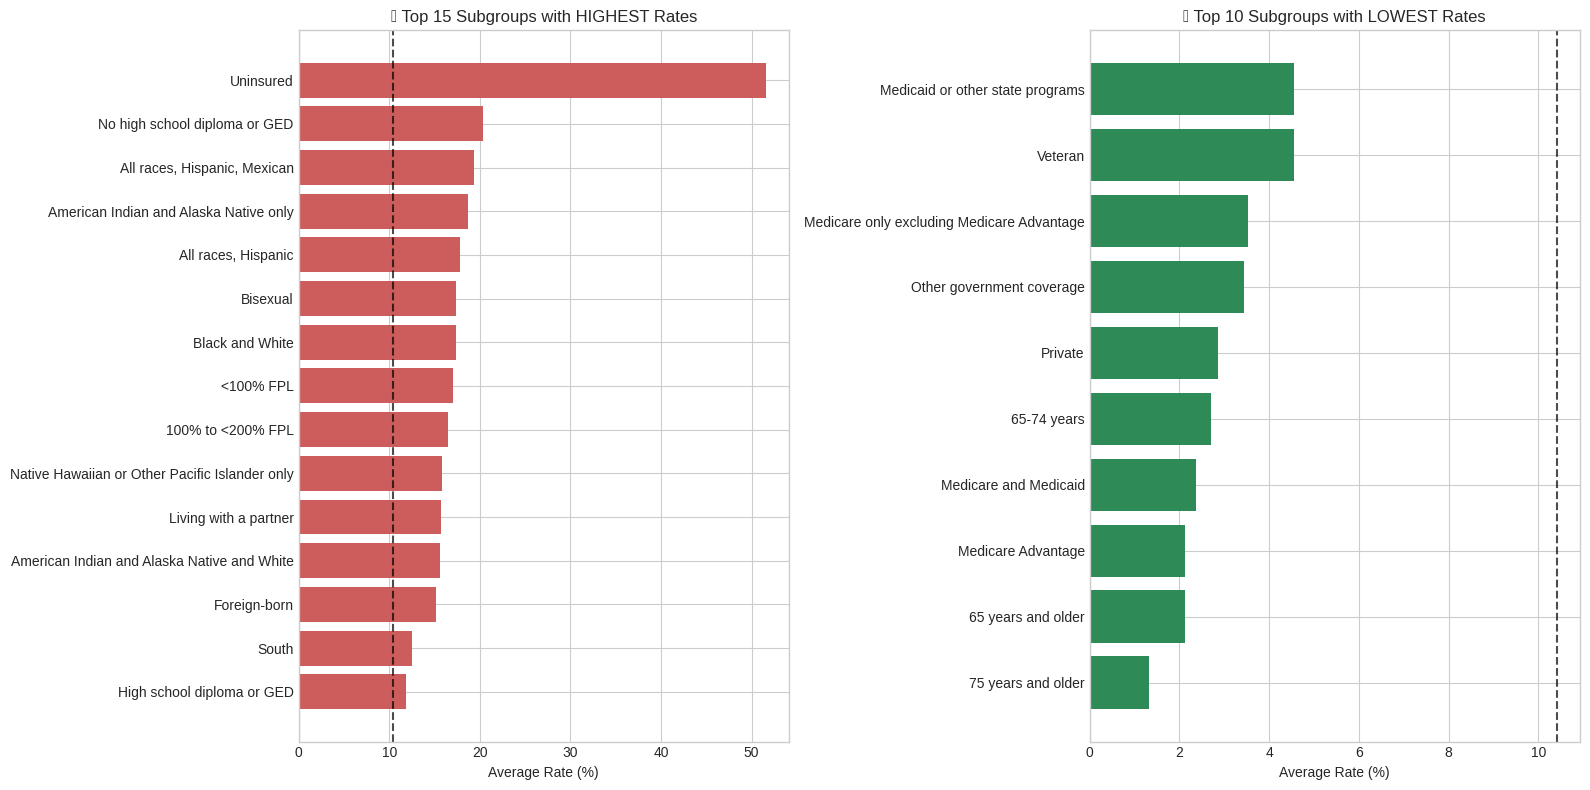

--- Dashed line = Overall mean: 10.4% ---


In [57]:
# Visualization of top/bottom subgroups
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top 15 highest rates
top_15 = subgroup_rates.head(15)['mean'].sort_values(ascending=True)
axes[0].barh(top_15.index, top_15.values, color='indianred')
axes[0].set_xlabel('Average Rate (%)')
axes[0].set_title('🔴 Top 15 Subgroups with HIGHEST Rates')
axes[0].axvline(x=df_access['ESTIMATE'].mean(), color='black', linestyle='--', alpha=0.7)

# Top 10 lowest rates
bottom_10 = subgroup_rates.tail(10)['mean'].sort_values(ascending=True)
axes[1].barh(bottom_10.index, bottom_10.values, color='seagreen')
axes[1].set_xlabel('Average Rate (%)')
axes[1].set_title('🟢 Top 10 Subgroups with LOWEST Rates')
axes[1].axvline(x=df_access['ESTIMATE'].mean(), color='black', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"--- Dashed line = Overall mean: {df_access['ESTIMATE'].mean():.1f}% ---")

## Q2: BARRIERS BY DEMOGRAPHIC CATEGORIES

Q2: BARRIERS BY DEMOGRAPHIC CATEGORIES

📊 Average Rates by Demographic Category:

                                                   mean  median    std  count
GROUP                                                                        
Health insurance coverage: Younger than 65 years  16.96    6.30  29.03    144
Poverty level                                     13.45   11.35   8.31    108
Race                                              12.05   10.30   7.99    198
Sexual orientation                                11.85   10.05   6.23    108
Nativity                                          11.66    8.35   7.85     72
Education                                         11.60    8.25   9.33    144
Race and Hispanic origin                          11.50    8.30   8.68    216
Marital status                                    10.83    9.65   5.83    180
Disability status                                 10.19    9.40   4.03     72
Employment status                                  9.90    8

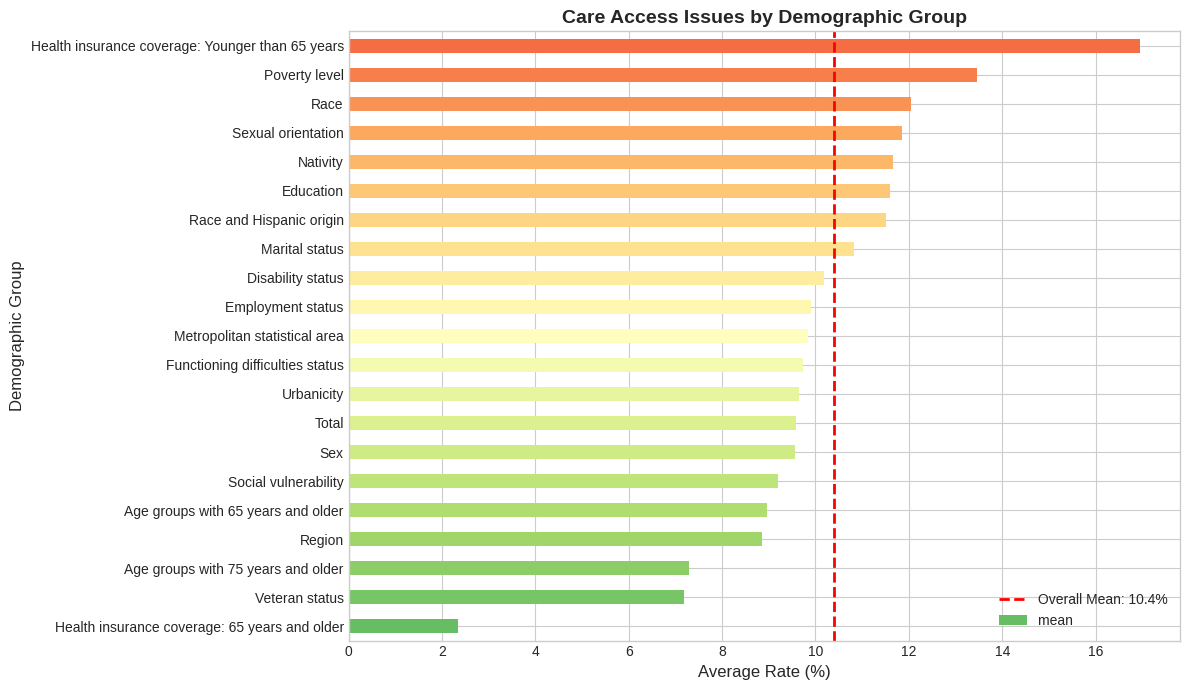

In [58]:
print("="*60)
print("Q2: BARRIERS BY DEMOGRAPHIC CATEGORIES")
print("="*60)

# Analyze by GROUP
group_analysis = df_access.groupby('GROUP')['ESTIMATE'].agg(
    ['mean', 'median', 'std', 'count']
).round(2).sort_values('mean', ascending=False)

print("\n📊 Average Rates by Demographic Category:\n")
print(group_analysis)

# Visualization by demographic group
fig, ax = plt.subplots(figsize=(12, 7))

colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(group_analysis)))
group_analysis['mean'].sort_values(ascending=True).plot(
    kind='barh', ax=ax, color=colors
)

ax.set_xlabel('Average Rate (%)', fontsize=12)
ax.set_ylabel('Demographic Group', fontsize=12)
ax.set_title('Care Access Issues by Demographic Group', fontsize=14, fontweight='bold')
ax.axvline(x=df_access['ESTIMATE'].mean(), color='red', linestyle='--',
           linewidth=2, label=f'Overall Mean: {df_access["ESTIMATE"].mean():.1f}%')
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

## Q3: TRENDS OVER TIME (2019-2024)

Q3: TRENDS OVER TIME (2019-2024)

📈 Overall Average Rate by Year:

YEAR
2019.0    10.75
2020.0     9.90
2021.0     9.27
2022.0     9.28
2023.0     8.70
2024.0     9.58
Name: ESTIMATE, dtype: float64

📊 Year-over-Year Change:

YEAR
2019.0     NaN
2020.0   -0.85
2021.0   -0.63
2022.0    0.01
2023.0   -0.58
2024.0    0.88
Name: ESTIMATE, dtype: float64


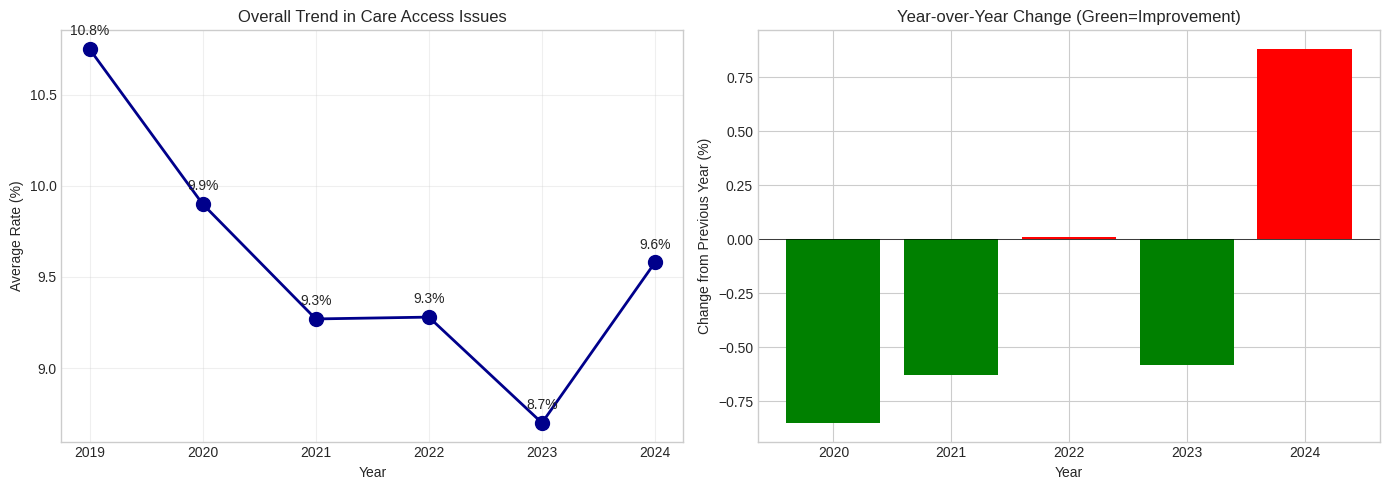

In [59]:
#question3

print("="*60)
print("Q3: TRENDS OVER TIME (2019-2024)")
print("="*60)

# Overall trend (Total population only)
df_trends = df_access[df_access['CLASSIFICATION'] == 'Total']
yearly_trend = df_trends.groupby('YEAR')['ESTIMATE'].mean().round(2)

print("\n📈 Overall Average Rate by Year:\n")
print(yearly_trend)

# Calculate year-over-year change
yoy_change = yearly_trend.diff().round(2)
print("\n📊 Year-over-Year Change:\n")
print(yoy_change)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Line chart
axes[0].plot(yearly_trend.index, yearly_trend.values, marker='o',
             linewidth=2, markersize=10, color='darkblue')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Rate (%)')
axes[0].set_title('Overall Trend in Care Access Issues')
axes[0].grid(True, alpha=0.3)

# Add value labels
for x, y in zip(yearly_trend.index, yearly_trend.values):
    axes[0].annotate(f'{y:.1f}%', (x, y), textcoords="offset points",
                     xytext=(0,10), ha='center', fontsize=10)

# Bar chart for year-over-year change
colors = ['green' if x < 0 else 'red' for x in yoy_change.dropna().values]
axes[1].bar(yoy_change.dropna().index, yoy_change.dropna().values, color=colors)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Change from Previous Year (%)')
axes[1].set_title('Year-over-Year Change (Green=Improvement)')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

## Q4: PATTERNS BY HEALTH CONDITION/TAXONOMY

Q4: PATTERNS BY HEALTH CONDITION/TAXONOMY

🏥 Average Rates by Health Category:

                                        mean  median    std  count
TAXONOMY                                                          
Prescription drugs and medicines       68.69   67.80  11.58    464
Oral health                            61.51   63.40   7.62    308
Healthcare system use                  55.80   72.70  29.72   2158
Vaccines and vaccination               37.89   38.35  16.60    924
Overweight and obesity                 33.53   33.40   5.44    462
Arthritis                              24.21   21.80  12.28    459
Pain                                   24.17   22.85   8.68    306
Healthcare access and quality          23.63    7.70  32.83   2270
Health insurance                       23.03   14.70  22.58   2435
Functioning and disability             19.41   16.00  15.82   3648
Health status                          17.71   15.30   8.57    458
Workplace attendance and absenteeism   14.65   13

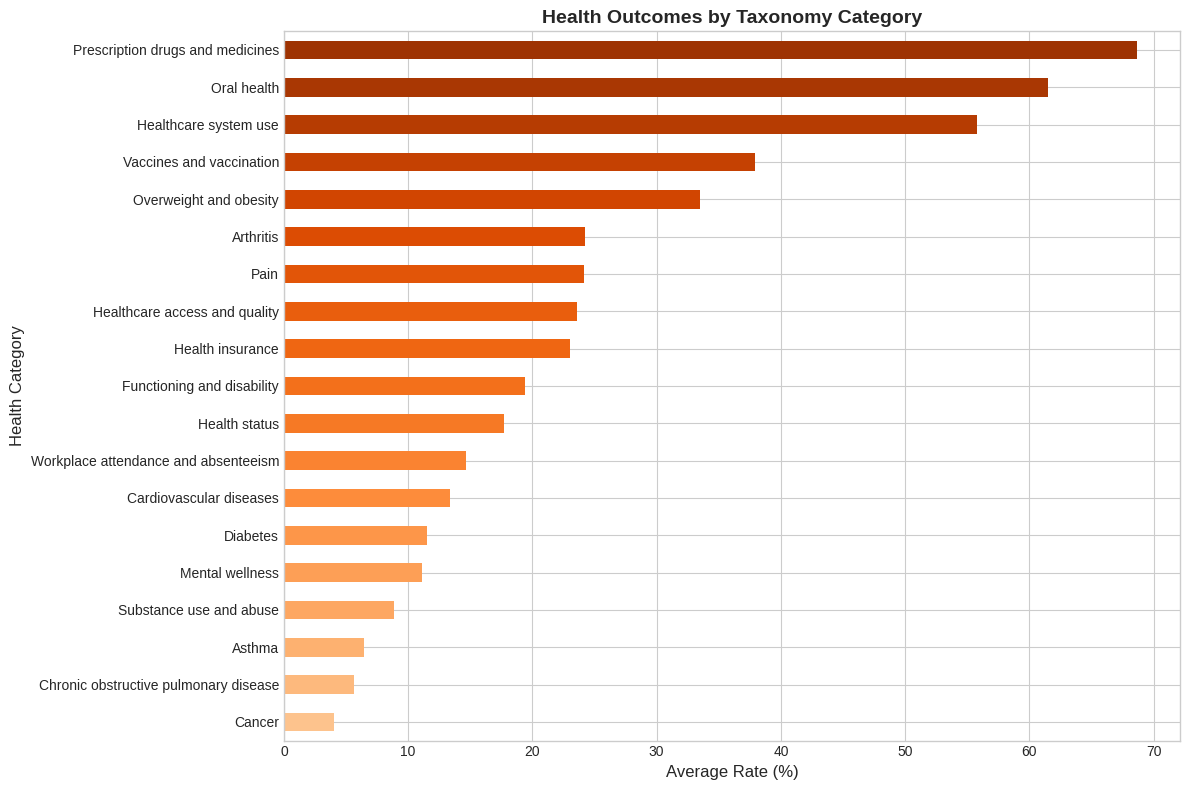

In [60]:
print("="*60)
print("Q4: PATTERNS BY HEALTH CONDITION/TAXONOMY")
print("="*60)

# Analyze by TAXONOMY
taxonomy_analysis = df_clean.groupby('TAXONOMY')['ESTIMATE'].agg(
    ['mean', 'median', 'std', 'count']
).round(2).sort_values('mean', ascending=False)

print("\n🏥 Average Rates by Health Category:\n")
print(taxonomy_analysis)

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.cm.Oranges(np.linspace(0.3, 0.9, len(taxonomy_analysis)))
taxonomy_analysis['mean'].sort_values(ascending=True).plot(
    kind='barh', ax=ax, color=colors
)

ax.set_xlabel('Average Rate (%)', fontsize=12)
ax.set_ylabel('Health Category', fontsize=12)
ax.set_title('Health Outcomes by Taxonomy Category', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Q5: VISUALIZING POPULATIONS AT RISK

Q5: VISUALIZING POPULATIONS AT RISK


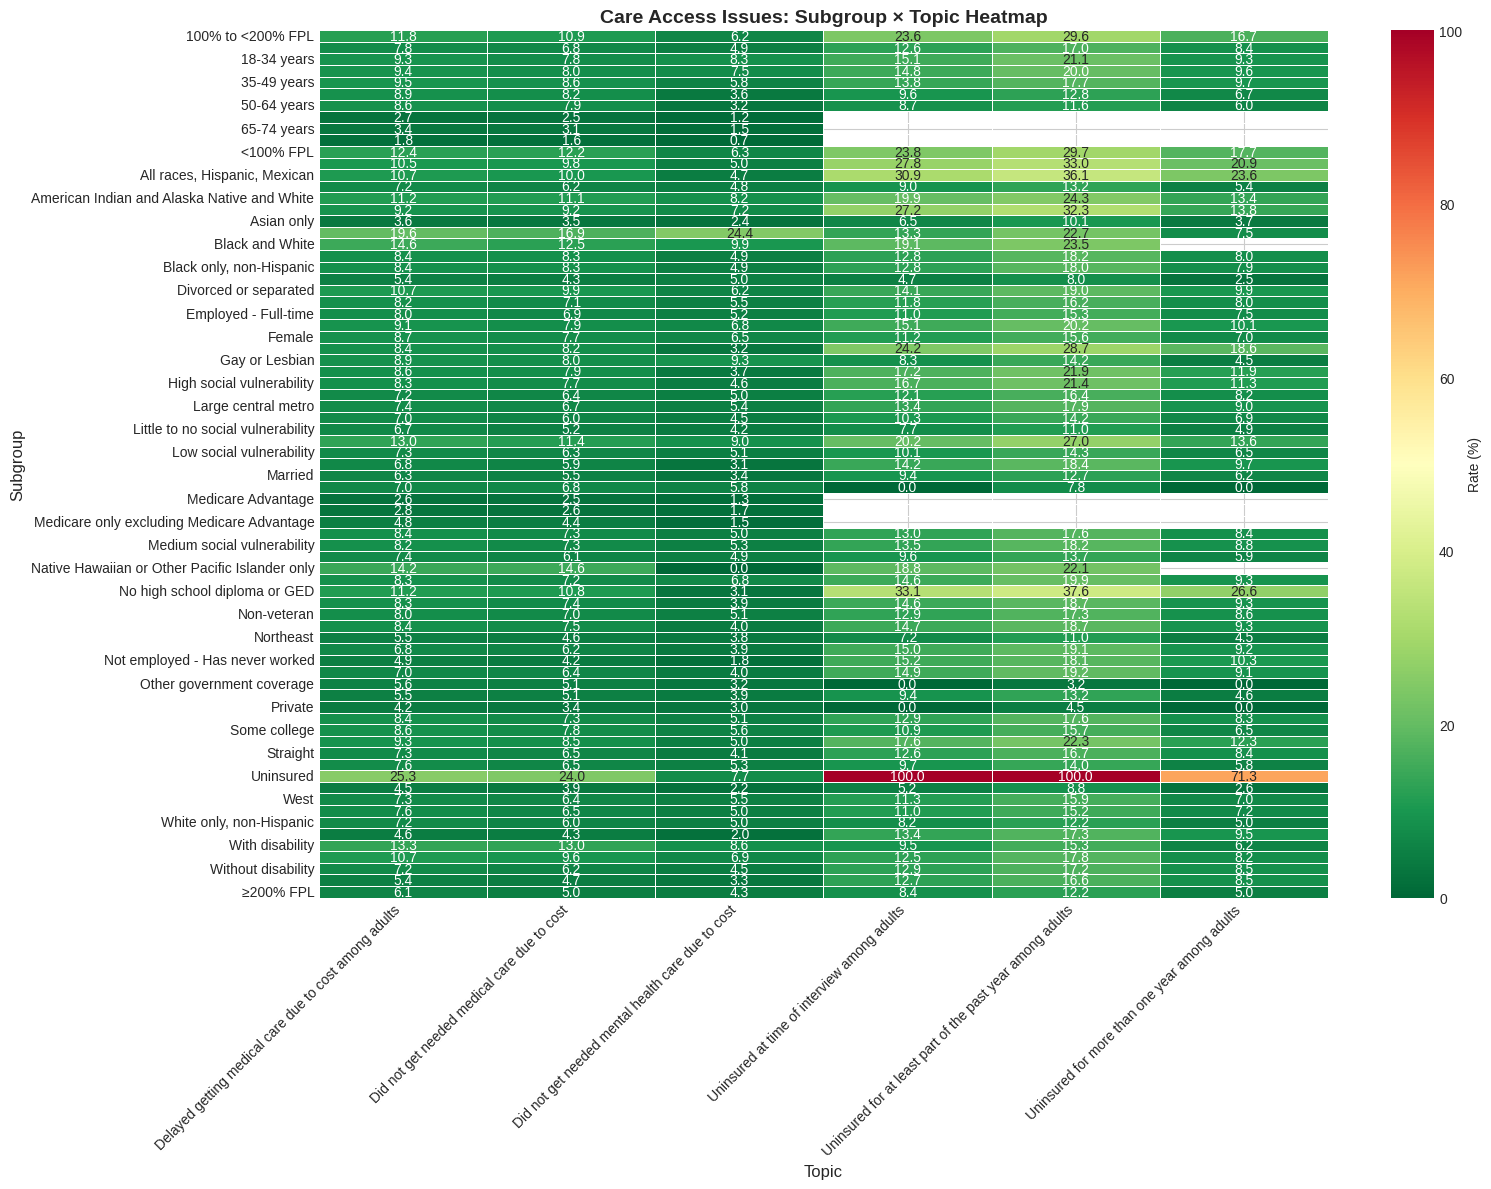

In [61]:
#advanced visualisation Heat MAP
print("="*60)
print("Q5: VISUALIZING POPULATIONS AT RISK")
print("="*60)

# Create pivot table for heatmap
pivot_data = df_access.pivot_table(
    values='ESTIMATE',
    index='SUBGROUP',
    columns='TOPIC',
    aggfunc='mean'
)

# Filter to most common subgroups (at least 5 topics)
pivot_filtered = pivot_data.dropna(thresh=3)

# Create heatmap
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(pivot_filtered,
            cmap='RdYlGn_r',
            annot=True,
            fmt='.1f',
            linewidths=0.5,
            cbar_kws={'label': 'Rate (%)'},
            ax=ax)
ax.set_title('Care Access Issues: Subgroup × Topic Heatmap', fontsize=14, fontweight='bold')
ax.set_xlabel('Topic', fontsize=12)
ax.set_ylabel('Subgroup', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Q6: INVISIBLE BARRIERS ANALYSIS

Q6: INVISIBLE BARRIERS ANALYSIS

📚 EDUCATION EFFECT (Controlling for similar factors):

SUBGROUP
No high school diploma or GED    20.39
High school diploma or GED       11.85
Some college                      9.17
College degree or higher          4.98
Name: ESTIMATE, dtype: float64

🗺️ REGIONAL DISPARITIES:

SUBGROUP
South        12.50
West          8.90
Midwest       7.91
Northeast     6.09
Name: ESTIMATE, dtype: float64

🏙️ URBANICITY EFFECT:

SUBGROUP
Nonmetropolitan           10.43
Large central metro        9.98
Medium and small metro     9.97
Large fringe metro         8.16
Name: ESTIMATE, dtype: float64


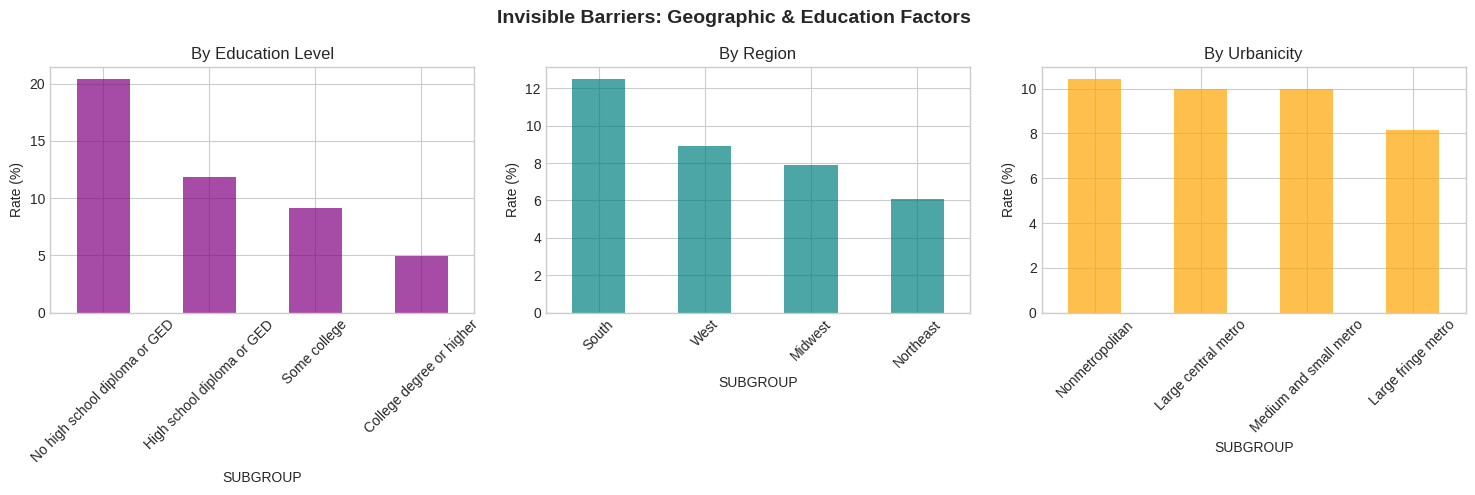

In [64]:
#invisble barrier
print("="*60)
print("Q6: INVISIBLE BARRIERS ANALYSIS")
print("="*60)

# Compare groups that "should" have similar access but don't

# 1. Education effect within same income level
print("\n📚 EDUCATION EFFECT (Controlling for similar factors):\n")
education_rates = df_access[df_access['GROUP'] == 'Education'].groupby('SUBGROUP')['ESTIMATE'].mean().sort_values(ascending=False)
print(education_rates.round(2))

# 2. Regional disparities
print("\n🗺️ REGIONAL DISPARITIES:\n")
region_rates = df_access[df_access['GROUP'] == 'Region'].groupby('SUBGROUP')['ESTIMATE'].mean().sort_values(ascending=False)
print(region_rates.round(2))

# 3. Urban vs Rural
print("\n🏙️ URBANICITY EFFECT:\n")
urban_rates = df_access[df_access['GROUP'] == 'Urbanicity'].groupby('SUBGROUP')['ESTIMATE'].mean().sort_values(ascending=False)
print(urban_rates.round(2))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

education_rates.plot(kind='bar', ax=axes[0], color='purple', alpha=0.7)
axes[0].set_title('By Education Level')
axes[0].set_ylabel('Rate (%)')
axes[0].tick_params(axis='x', rotation=45)

region_rates.plot(kind='bar', ax=axes[1], color='teal', alpha=0.7)
axes[1].set_title('By Region')
axes[1].set_ylabel('Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

urban_rates.plot(kind='bar', ax=axes[2], color='orange', alpha=0.7)
axes[2].set_title('By Urbanicity')
axes[2].set_ylabel('Rate (%)')
axes[2].tick_params(axis='x', rotation=45)

plt.suptitle('Invisible Barriers: Geographic & Education Factors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# TRENDS FOR MOST VULNERABLE SUBGROUPS

TRENDS FOR MOST VULNERABLE SUBGROUPS

📈 Yearly Rates for Vulnerable Subgroups:

SUBGROUP  <100% FPL  American Indian and Alaska Native only  Bisexual  \
YEAR                                                                    
2019.0        19.48                                   19.76     19.27   
2020.0        18.23                                   18.12     18.65   
2021.0        17.25                                   17.18     18.33   
2022.0        16.23                                   22.20     14.22   
2023.0        15.02                                   18.50     14.80   
2024.0        15.87                                   17.90     19.03   

SUBGROUP  No high school diploma or GED  Uninsured  
YEAR                                                
2019.0                            22.17      56.97  
2020.0                            19.68      46.83  
2021.0                            21.42      46.67  
2022.0                            20.32      55.07  
2023.0           

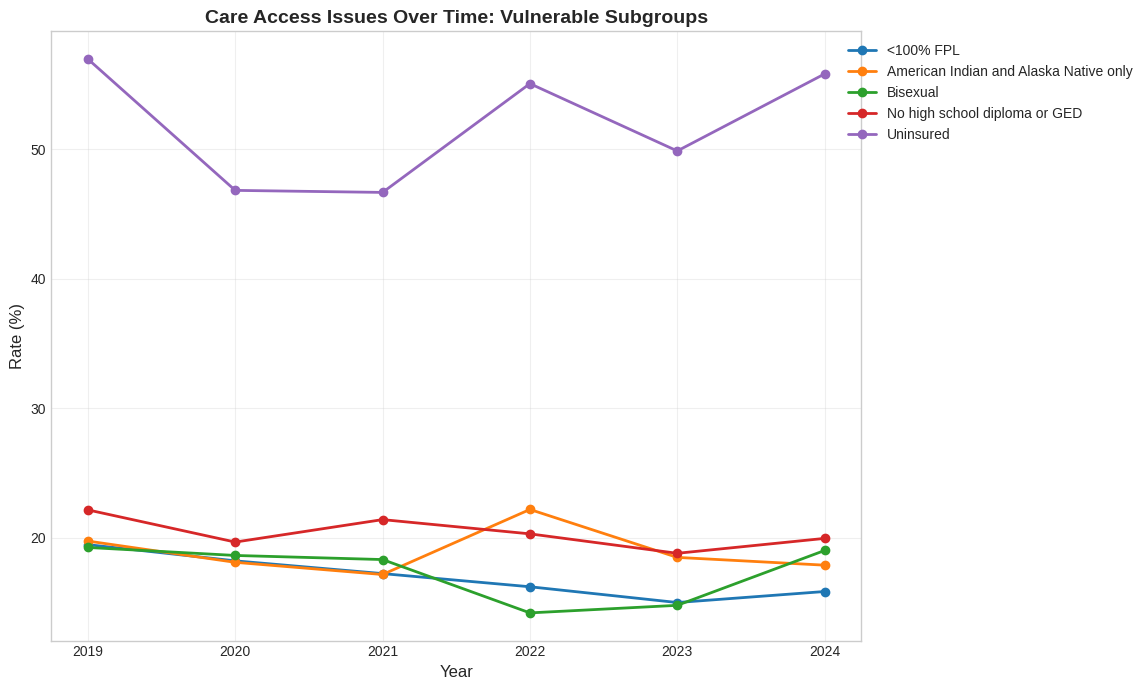

In [62]:
#Trends by Vulnerable Subgroups
print("="*60)
print("TRENDS FOR MOST VULNERABLE SUBGROUPS")
print("="*60)

# Select high-risk subgroups to track
vulnerable_subgroups = ['Uninsured', '<100% FPL', 'No high school diploma or GED',
                        'American Indian and Alaska Native only', 'Bisexual']

# Filter data
df_vulnerable = df_access[df_access['SUBGROUP'].isin(vulnerable_subgroups)]

# Calculate yearly trends by subgroup
vulnerable_trends = df_vulnerable.groupby(['YEAR', 'SUBGROUP'])['ESTIMATE'].mean().unstack()

print("\n📈 Yearly Rates for Vulnerable Subgroups:\n")
print(vulnerable_trends.round(2))

# Visualization
fig, ax = plt.subplots(figsize=(12, 7))
for col in vulnerable_trends.columns:
    ax.plot(vulnerable_trends.index, vulnerable_trends[col], marker='o', linewidth=2, label=col)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Rate (%)', fontsize=12)
ax.set_title('Care Access Issues Over Time: Vulnerable Subgroups', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

INSURANCE GAP ANALYSIS

💊 Care Access Issues by Insurance Status:

                                   mean  median
SUBGROUP                                       
Uninsured                         51.56   30.20
Medicaid or other state programs   4.56    5.95
Other government coverage          3.45    2.30
Private                            2.86    2.10
Medicare Advantage                 2.13    2.15

🚨 INSURANCE GAP: 48.3 percentage points
   Uninsured: 51.6%
   Avg Insured: 3.2%


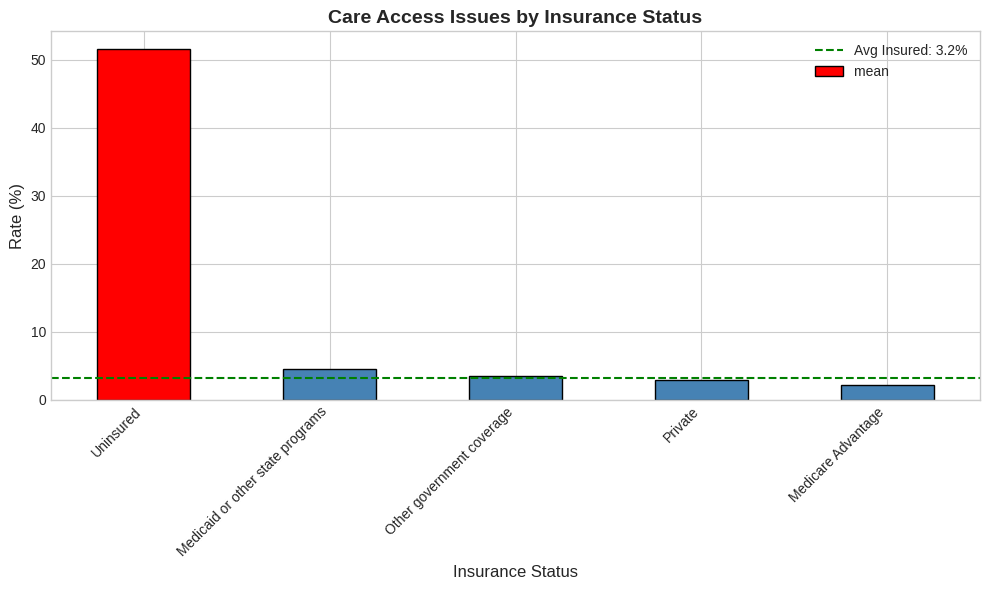

In [63]:
#insuranceeffect
print("="*60)
print("INSURANCE GAP ANALYSIS")
print("="*60)

# Compare insured vs uninsured
insurance_subgroups = ['Uninsured', 'Private', 'Medicaid or other state programs',
                       'Medicare Advantage', 'Other government coverage']

df_insurance = df_access[df_access['SUBGROUP'].isin(insurance_subgroups)]

insurance_comparison = df_insurance.groupby('SUBGROUP')['ESTIMATE'].agg(['mean', 'median']).round(2)
insurance_comparison = insurance_comparison.sort_values('mean', ascending=False)

print("\n💊 Care Access Issues by Insurance Status:\n")
print(insurance_comparison)

# Calculate the gap
uninsured_rate = insurance_comparison.loc['Uninsured', 'mean']
avg_insured_rate = insurance_comparison.drop('Uninsured')['mean'].mean()
gap = uninsured_rate - avg_insured_rate

print(f"\n🚨 INSURANCE GAP: {gap:.1f} percentage points")
print(f"   Uninsured: {uninsured_rate:.1f}%")
print(f"   Avg Insured: {avg_insured_rate:.1f}%")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red' if x == 'Uninsured' else 'steelblue' for x in insurance_comparison.index]
insurance_comparison['mean'].plot(kind='bar', ax=ax, color=colors, edgecolor='black')
ax.set_ylabel('Rate (%)', fontsize=12)
ax.set_xlabel('Insurance Status', fontsize=12)
ax.set_title('Care Access Issues by Insurance Status', fontsize=14, fontweight='bold')
ax.axhline(y=avg_insured_rate, color='green', linestyle='--', label=f'Avg Insured: {avg_insured_rate:.1f}%')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# RISK ANALYSIS: HIGHEST RISK COMBINATIONS

RISK ANALYSIS: HIGHEST RISK COMBINATIONS

🚨 TOP 20 HIGHEST RISK COMBINATIONS:

                                                                                                Avg_Rate  \
TOPIC                                              SUBGROUP                                                
Uninsured for at least part of the past year am... Uninsured                                      100.00   
Uninsured at time of interview among adults        Uninsured                                      100.00   
Uninsured for more than one year among adults      Uninsured                                       71.32   
Uninsured for at least part of the past year am... No high school diploma or GED                   37.65   
                                                   All races, Hispanic, Mexican                    36.12   
Uninsured at time of interview among adults        No high school diploma or GED                   33.07   
Uninsured for at least part of the past year am... All ra

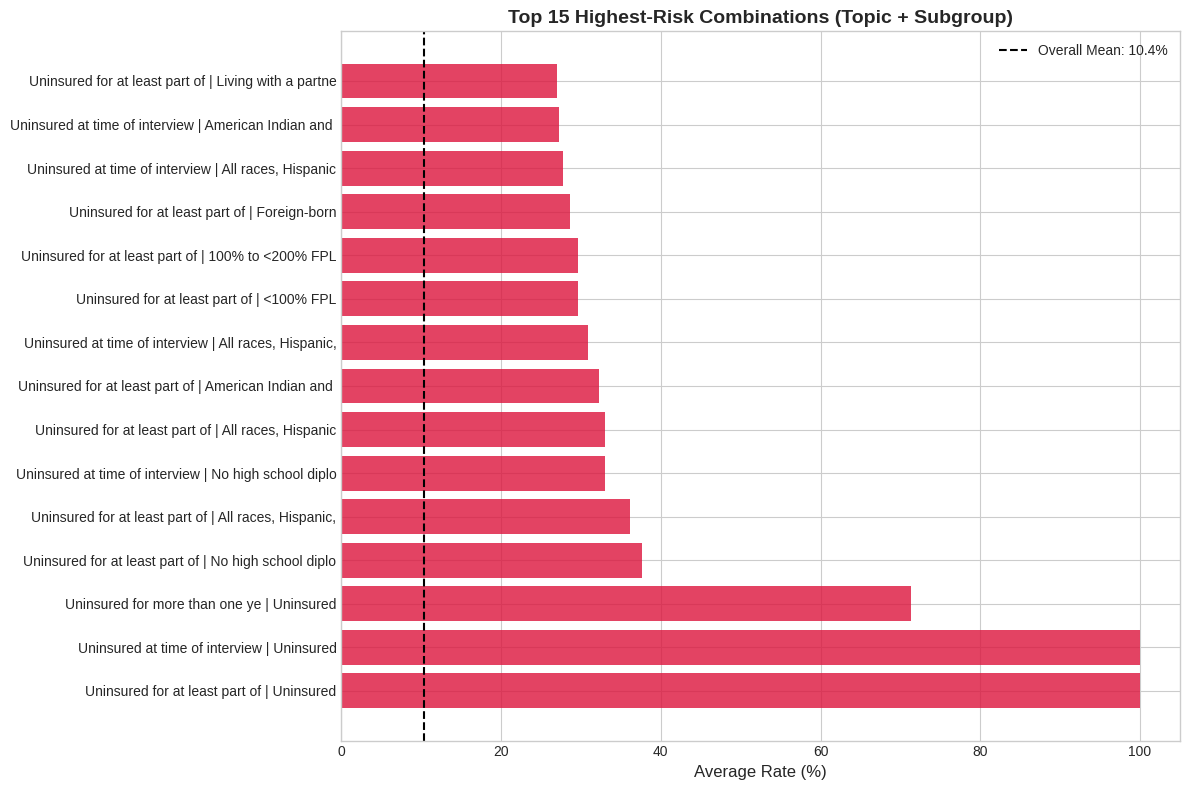

In [65]:
#riskscore

print("="*60)
print("RISK ANALYSIS: HIGHEST RISK COMBINATIONS")
print("="*60)

# Find topic + subgroup combinations with highest rates
risk_combinations = df_access.groupby(['TOPIC', 'SUBGROUP']).agg({
    'ESTIMATE': ['mean', 'count'],
    'CI_WIDTH': 'mean'
}).round(2)

risk_combinations.columns = ['Avg_Rate', 'Count', 'CI_Width']
risk_combinations = risk_combinations[risk_combinations['Count'] >= 3]
risk_combinations = risk_combinations.sort_values('Avg_Rate', ascending=False)

print("\n🚨 TOP 20 HIGHEST RISK COMBINATIONS:\n")
print(risk_combinations.head(20))

# Visualize top 15 combinations
top_15_risk = risk_combinations.head(15).reset_index()
top_15_risk['Combination'] = top_15_risk['TOPIC'].str[:30] + ' | ' + top_15_risk['SUBGROUP'].str[:20]

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(top_15_risk['Combination'], top_15_risk['Avg_Rate'], color='crimson', alpha=0.8)
ax.set_xlabel('Average Rate (%)', fontsize=12)
ax.set_title('Top 15 Highest-Risk Combinations (Topic + Subgroup)', fontsize=14, fontweight='bold')
ax.axvline(x=df_access['ESTIMATE'].mean(), color='black', linestyle='--',
           label=f'Overall Mean: {df_access["ESTIMATE"].mean():.1f}%')
ax.legend()
plt.tight_layout()
plt.show()

📊 EXECUTIVE SUMMARY DASHBOARD


/tmp/ipython-input-593444503.py:43: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-593444503.py:43: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-593444503.py:43: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-593444503.py:43: UserWarning: Glyph 128138 (\N{PILL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/

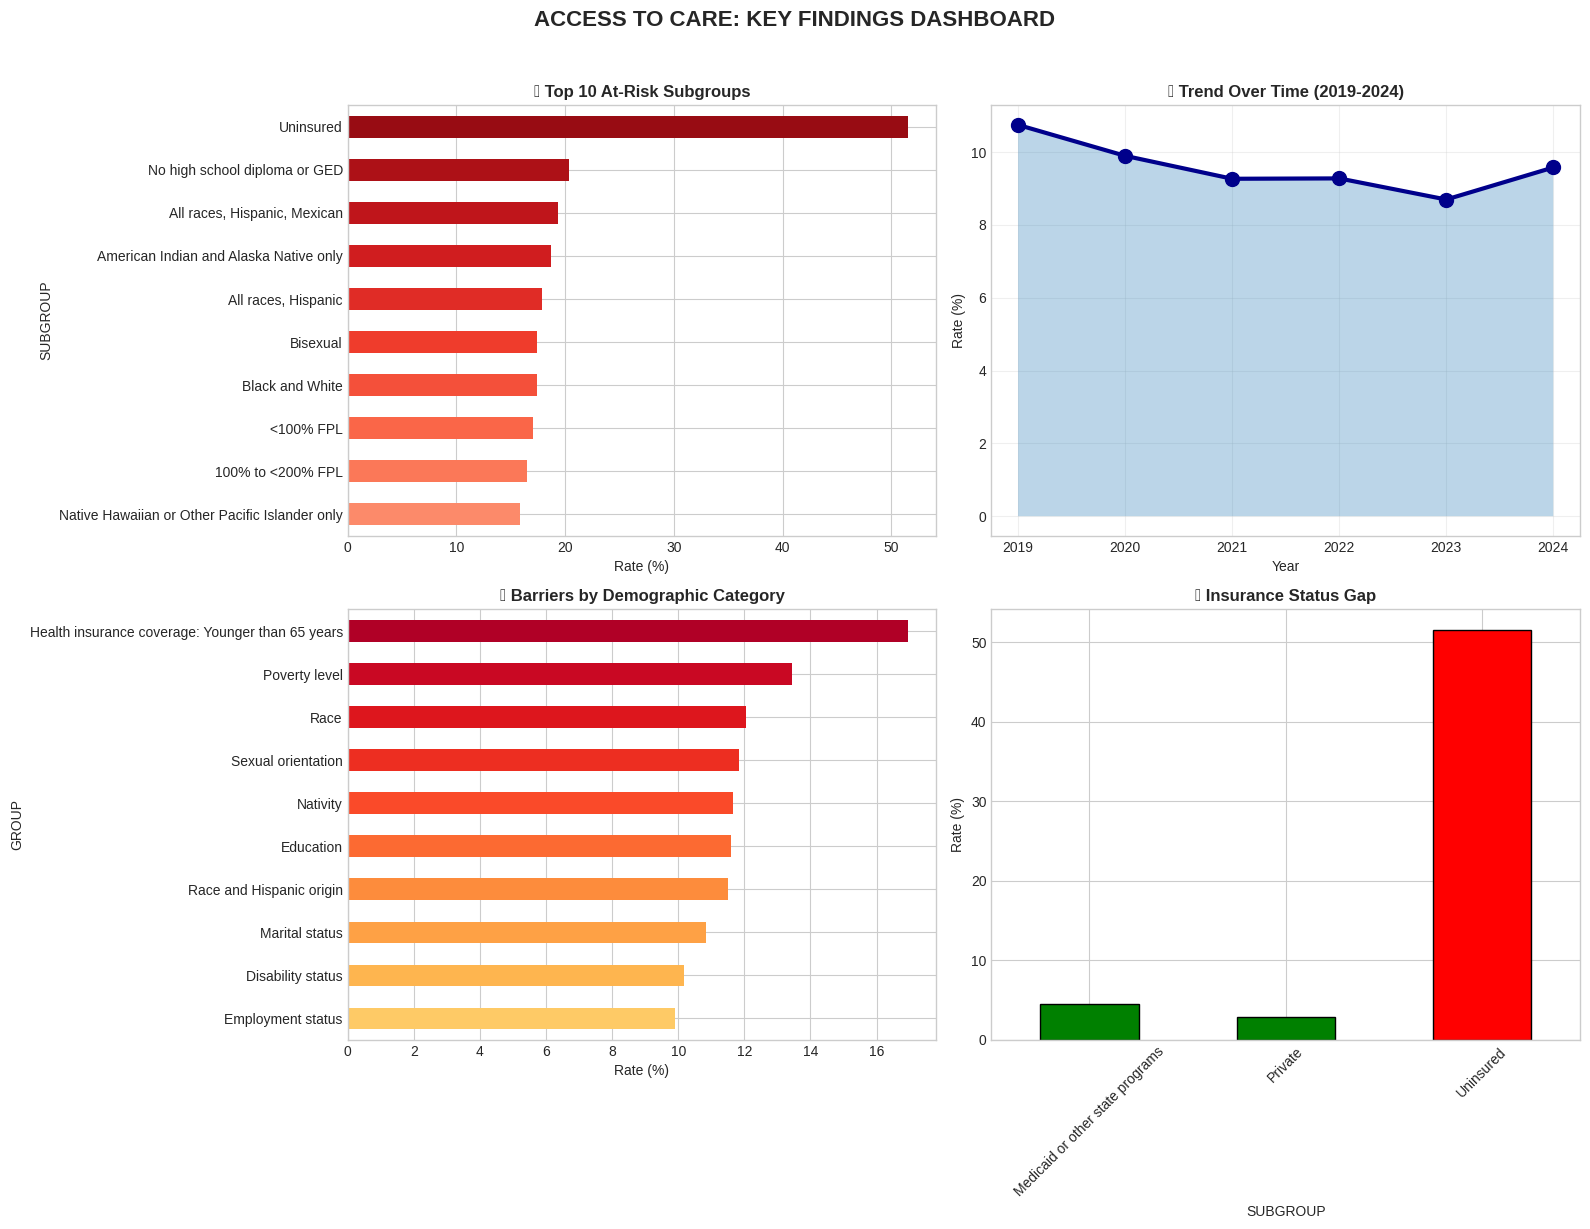


📋 KEY STATISTICS
• Total records analyzed: 2,576
• Overall average rate: 10.4%
• Highest risk group: Uninsured at 51.6%
• Lowest risk group: 75 years and older at 1.3%
• Trend: Improving overall
• 2024 vs 2023: ⚠️ Increased


In [66]:
print("="*60)
print("📊 EXECUTIVE SUMMARY DASHBOARD")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top risk subgroups
ax1 = axes[0, 0]
top_10 = subgroup_rates.head(10)['mean']
colors1 = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_10)))
top_10.sort_values().plot(kind='barh', ax=ax1, color=colors1)
ax1.set_title('🔴 Top 10 At-Risk Subgroups', fontweight='bold')
ax1.set_xlabel('Rate (%)')

# 2. Time trend
ax2 = axes[0, 1]
yearly_trend.plot(kind='line', marker='o', ax=ax2, linewidth=3, markersize=10, color='darkblue')
ax2.fill_between(yearly_trend.index, yearly_trend.values, alpha=0.3)
ax2.set_title('📈 Trend Over Time (2019-2024)', fontweight='bold')
ax2.set_ylabel('Rate (%)')
ax2.set_xlabel('Year')
ax2.grid(True, alpha=0.3)

# 3. By demographic group
ax3 = axes[1, 0]
top_groups = group_analysis.head(10)['mean']
colors3 = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(top_groups)))
top_groups.sort_values().plot(kind='barh', ax=ax3, color=colors3)
ax3.set_title('👥 Barriers by Demographic Category', fontweight='bold')
ax3.set_xlabel('Rate (%)')

# 4. Insurance gap
ax4 = axes[1, 1]
insurance_data = df_access[df_access['SUBGROUP'].isin(['Uninsured', 'Private', 'Medicaid or other state programs'])]
insurance_avg = insurance_data.groupby('SUBGROUP')['ESTIMATE'].mean()
colors4 = ['red' if x == 'Uninsured' else 'green' for x in insurance_avg.index]
insurance_avg.plot(kind='bar', ax=ax4, color=colors4, edgecolor='black')
ax4.set_title('💊 Insurance Status Gap', fontweight='bold')
ax4.set_ylabel('Rate (%)')
ax4.tick_params(axis='x', rotation=45)

plt.suptitle('ACCESS TO CARE: KEY FINDINGS DASHBOARD', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print key statistics
print("\n" + "="*60)
print("📋 KEY STATISTICS")
print("="*60)
print(f"• Total records analyzed: {len(df_access):,}")
print(f"• Overall average rate: {df_access['ESTIMATE'].mean():.1f}%")
print(f"• Highest risk group: Uninsured at {subgroup_rates.loc['Uninsured', 'mean']:.1f}%")
print(f"• Lowest risk group: {subgroup_rates.index[-1]} at {subgroup_rates.iloc[-1]['mean']:.1f}%")
print(f"• Trend: {'Improving' if yearly_trend.iloc[-1] < yearly_trend.iloc[0] else 'Worsening'} overall")
print(f"• 2024 vs 2023: {'⚠️ Increased' if yearly_trend.iloc[-1] > yearly_trend.iloc[-2] else '✅ Decreased'}")

# Deep Dive: Insured vs Uninsured Analysis

INSURANCE DATA STRUCTURE EXPLORATION

📋 Insurance-Related Topics:

  • Private health insurance coverage at time of interview among adults (411 records)
  • Public health insurance coverage at time of interview among adults (412 records)
  • Uninsured at time of interview among adults (409 records)
  • Uninsured for at least part of the past year among adults (413 records)
  • Uninsured for more than one year among adults (398 records)

📋 Insurance-Related Subgroups (7):

  • Private (600 records)
  • Medicare and Medicaid (276 records)
  • Medicare Advantage (282 records)
  • Medicare only excluding Medicare Advantage (282 records)
  • Other government coverage (596 records)
  • Medicaid or other state programs (318 records)
  • Uninsured (355 records)
INSURED vs UNINSURED: OVERALL COMPARISON

📊 Overall Comparison:

                   Mean  Median  Std Dev  Min    Max  Count
INSURANCE_STATUS                                           
Insured            3.28     2.4     2.80  0.0   10.

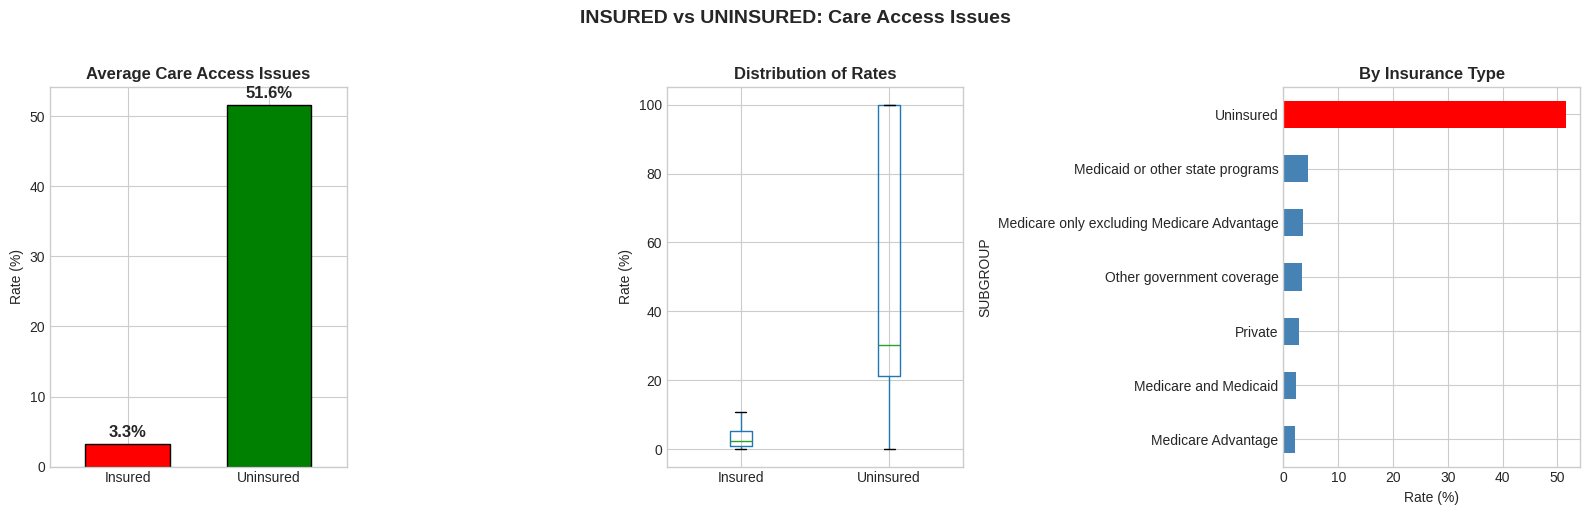

In [67]:
#Deep Dive: Insured vs Uninsured Analysi

print("="*60)
print("INSURANCE DATA STRUCTURE EXPLORATION")
print("="*60)

# Find all insurance-related topics
insurance_topics = df_clean[df_clean['TOPIC'].str.lower().str.contains('uninsured|insurance', na=False)]['TOPIC'].unique()

print("\n📋 Insurance-Related Topics:\n")
for topic in insurance_topics:
    count = len(df_clean[df_clean['TOPIC'] == topic])
    print(f"  • {topic} ({count:,} records)")

# Find insurance-related subgroups
insurance_subgroups = df_clean[df_clean['SUBGROUP'].str.lower().str.contains('insured|insurance|medicare|medicaid|private|government', na=False)]['SUBGROUP'].unique()

print(f"\n📋 Insurance-Related Subgroups ({len(insurance_subgroups)}):\n")
for subgroup in insurance_subgroups:
    count = len(df_clean[df_clean['SUBGROUP'] == subgroup])
    print(f"  • {subgroup} ({count:,} records)")

print("="*60)
print("INSURED vs UNINSURED: OVERALL COMPARISON")
print("="*60)

# Filter for access-related topics with insurance subgroups
insurance_categories = ['Uninsured', 'Private', 'Medicaid or other state programs',
                        'Medicare Advantage', 'Medicare only excluding Medicare Advantage',
                        'Medicare and Medicaid', 'Other government coverage']

df_insurance_compare = df_access[df_access['SUBGROUP'].isin(insurance_categories)].copy()

# Create insurance status category
df_insurance_compare['INSURANCE_STATUS'] = df_insurance_compare['SUBGROUP'].apply(
    lambda x: 'Uninsured' if x == 'Uninsured' else 'Insured'
)

# Compare overall rates
insurance_comparison = df_insurance_compare.groupby('INSURANCE_STATUS').agg({
    'ESTIMATE': ['mean', 'median', 'std', 'min', 'max', 'count']
}).round(2)

insurance_comparison.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Count']
print("\n📊 Overall Comparison:\n")
print(insurance_comparison)

# Calculate gap
uninsured_mean = insurance_comparison.loc['Uninsured', 'Mean']
insured_mean = insurance_comparison.loc['Insured', 'Mean']
gap = uninsured_mean - insured_mean
gap_ratio = uninsured_mean / insured_mean

print(f"\n🚨 KEY FINDING:")
print(f"   • Uninsured Rate: {uninsured_mean:.1f}%")
print(f"   • Insured Rate: {insured_mean:.1f}%")
print(f"   • Gap: {gap:.1f} percentage points")
print(f"   • Uninsured are {gap_ratio:.1f}x more likely to face care access issues")

# Visualization
print("="*60)
print("INSURED vs UNINSURED: OVERALL VISUALIZATION")
print("="*60)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Bar comparison
ax1 = axes[0]
colors = ['red', 'green']
insurance_comparison['Mean'].plot(kind='bar', ax=ax1, color=colors, edgecolor='black', width=0.6)
ax1.set_title('Average Care Access Issues', fontweight='bold', fontsize=12)
ax1.set_ylabel('Rate (%)')
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=0)

# Add value labels
for i, v in enumerate(insurance_comparison['Mean']):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=12)

# 2. Box plot by insurance type
ax2 = axes[1]
df_insurance_compare.boxplot(column='ESTIMATE', by='INSURANCE_STATUS', ax=ax2)
ax2.set_title('Distribution of Rates', fontweight='bold', fontsize=12)
ax2.set_ylabel('Rate (%)')
ax2.set_xlabel('')
plt.suptitle('')  # Remove automatic title

# 3. By specific insurance type
ax3 = axes[2]
detailed_rates = df_access[df_access['SUBGROUP'].isin(insurance_categories)].groupby('SUBGROUP')['ESTIMATE'].mean().sort_values(ascending=True)
colors3 = ['red' if 'Uninsured' in x else 'steelblue' for x in detailed_rates.index]
detailed_rates.plot(kind='barh', ax=ax3, color=colors3)
ax3.set_title('By Insurance Type', fontweight='bold', fontsize=12)
ax3.set_xlabel('Rate (%)')

plt.suptitle('INSURED vs UNINSURED: Care Access Issues', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

WHO ARE THE UNINSURED? DEMOGRAPHIC BREAKDOWN

📊 Analyzing 1,220 records on uninsured status
   Topics: 3
   Years: [np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]

UNINSURED RATES BY DEMOGRAPHIC CATEGORY

👥 RACE AND HISPANIC ORIGIN:
SUBGROUP
All races, Hispanic, Mexican    30.21
All races, Hispanic             27.23
Black only, non-Hispanic        12.86
All races, non-Hispanic          9.19
Other races, non-Hispanic        9.08
White only, non-Hispanic         8.44

👥 AGE GROUPS WITH 65 YEARS AND OLDER:
SUBGROUP
18-34 years    15.15
35-49 years    13.73
50-64 years     8.75

👥 SEX:
SUBGROUP
Male      14.13
Female    11.28

👥 EDUCATION:
SUBGROUP
No high school diploma or GED    32.43
High school diploma or GED       16.99
Some college                     11.01
College degree or higher          5.07

👥 POVERTY LEVEL:
SUBGROUP
<100% FPL            23.72
100% to <200% FPL    23.32
≥200% FPL             8.53

👥 EMPLOYMENT STATUS:
SUBGROUP
Emp

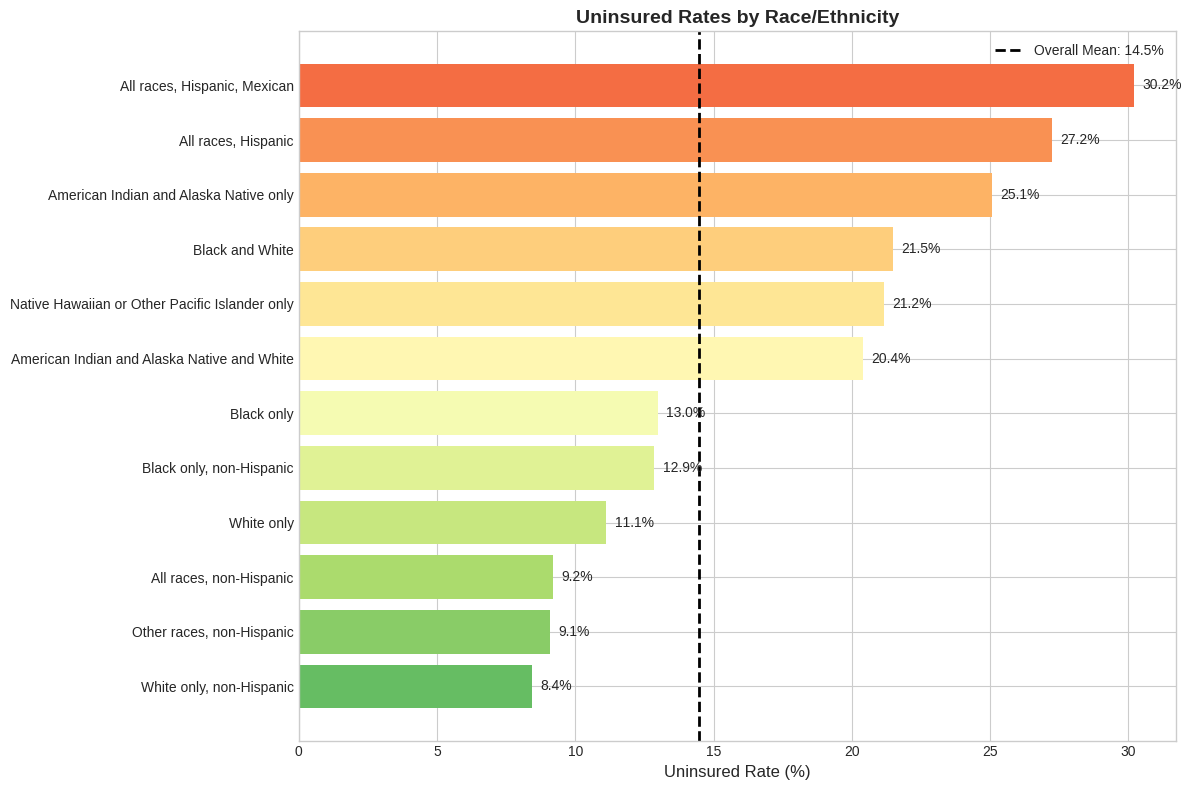

UNINSURED RATES BY AGE GROUP

📊 Uninsured Rates by Age Group:

              mean  median  count
SUBGROUP                         
18-34 years  15.15   14.75     18
18-44 years  14.79   14.55     18
35-49 years  13.73   14.05     18
45-64 years   9.71    9.65     18
50-64 years   8.75    8.45     18


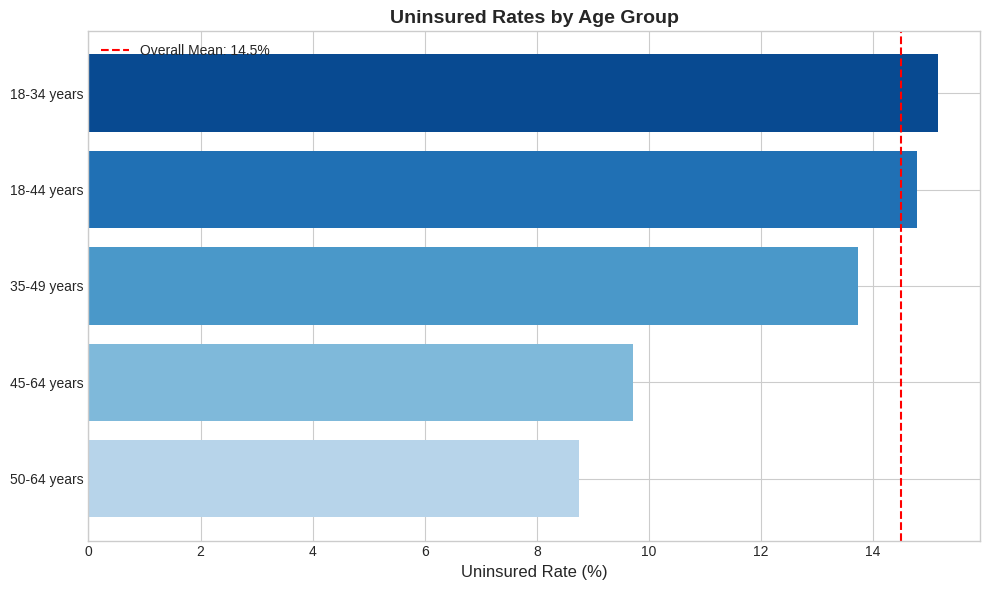


🔍 KEY INSIGHT: Younger adults (18-34) have higher uninsured rates than older adults
UNINSURED RATES BY SEX

📊 Uninsured Rates by Sex:

           mean  median   std  count
SUBGROUP                            
Female    11.28   10.65  3.87     18
Male      14.13   14.45  3.80     18


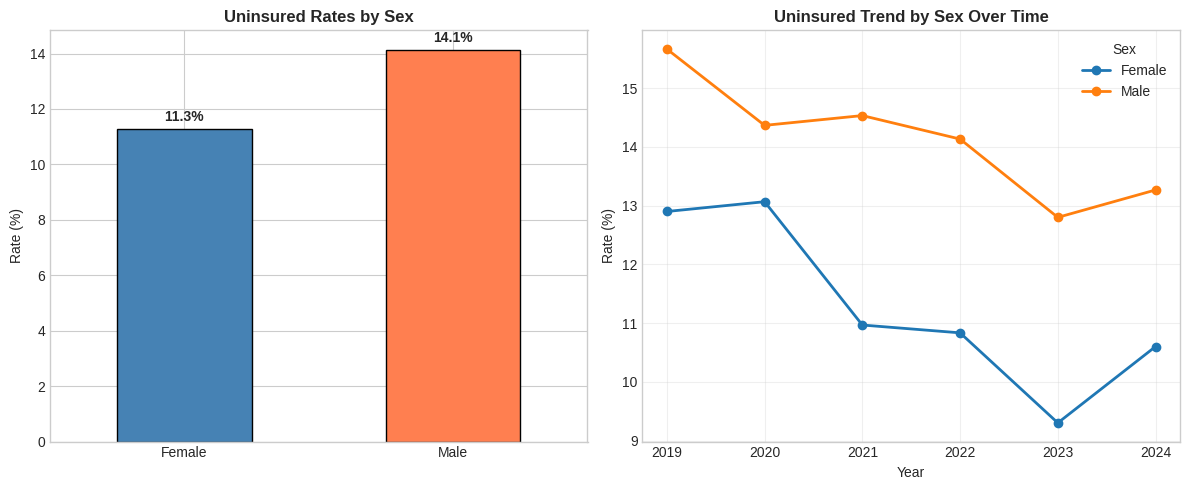


🔍 Gender gap: 2.85 percentage points (Male higher)
UNINSURED RATES BY POVERTY LEVEL

📊 Uninsured Rates by Poverty Level:

                    mean  median  count
SUBGROUP                               
<100% FPL          23.72    24.1     18
100% to <200% FPL  23.32    23.5     18
≥200% FPL           8.53     8.3     18


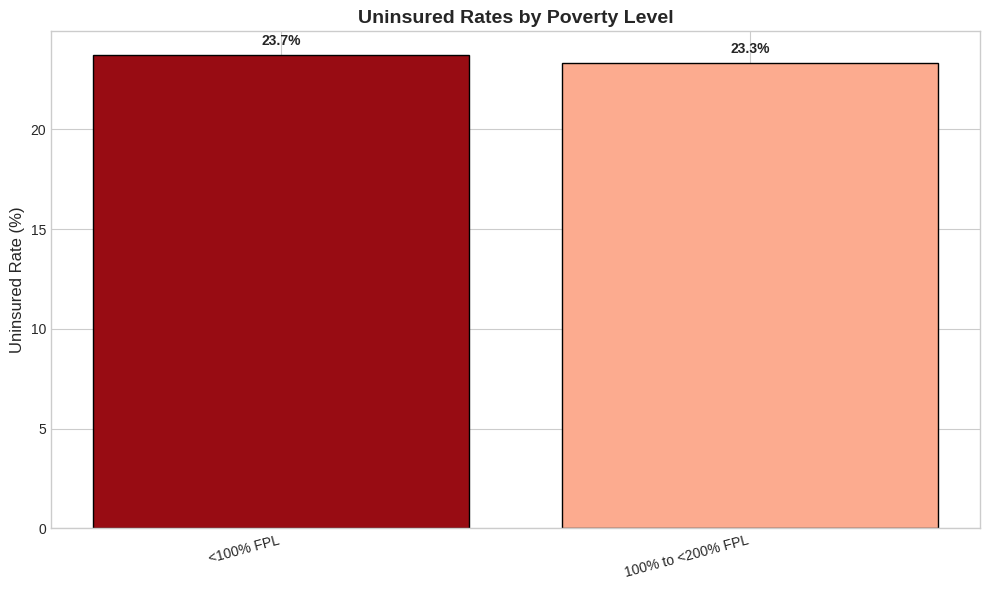


🔍 INCOME GAP: 0.4 percentage points
   Poorest (<100% FPL): 23.7%
   Wealthiest (400%+ FPL): 23.3%
   The poorest are 1.0x more likely to be uninsured


In [68]:
print("="*60)
print("WHO ARE THE UNINSURED? DEMOGRAPHIC BREAKDOWN")
print("="*60)

# Filter for uninsured topics only
uninsured_topics = ['Uninsured at time of interview among adults',
                    'Uninsured for at least part of the past year among adults',
                    'Uninsured for more than one year among adults']

df_uninsured = df_clean[df_clean['TOPIC'].isin(uninsured_topics)].copy()

print(f"\n📊 Analyzing {len(df_uninsured):,} records on uninsured status")
print(f"   Topics: {df_uninsured['TOPIC'].nunique()}")
print(f"   Years: {sorted(df_uninsured['YEAR'].dropna().unique().astype(int))}")

# Analyze by demographic groups
print("\n" + "="*60)
print("UNINSURED RATES BY DEMOGRAPHIC CATEGORY")
print("="*60)

for group in ['Race and Hispanic origin', 'Age groups with 65 years and older',
              'Sex', 'Education', 'Poverty level', 'Employment status', 'Region']:

    if group in df_uninsured['GROUP'].values:
        group_data = df_uninsured[df_uninsured['GROUP'] == group]
        rates = group_data.groupby('SUBGROUP')['ESTIMATE'].mean().sort_values(ascending=False)

        print(f"\n👥 {group.upper()}:")
        print(rates.round(2).head(10).to_string())

print("="*60)
print("UNINSURED RATES BY RACE/ETHNICITY")
print("="*60)

# Filter for race-related groups
race_groups = ['Race and Hispanic origin', 'Race']
df_uninsured_race = df_uninsured[df_uninsured['GROUP'].isin(race_groups)]

race_rates = df_uninsured_race.groupby('SUBGROUP')['ESTIMATE'].agg(['mean', 'median', 'count']).round(2)
race_rates = race_rates[race_rates['count'] >= 5]
race_rates = race_rates.sort_values('mean', ascending=False)

print("\n📊 Uninsured Rates by Race/Ethnicity:\n")
print(race_rates.head(15))

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
top_races = race_rates.head(12)['mean'].sort_values(ascending=True)

# Color gradient from green (low) to red (high)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_races)))
bars = ax.barh(top_races.index, top_races.values, color=colors)

ax.set_xlabel('Uninsured Rate (%)', fontsize=12)
ax.set_title('Uninsured Rates by Race/Ethnicity', fontsize=14, fontweight='bold')
ax.axvline(x=df_uninsured['ESTIMATE'].mean(), color='black', linestyle='--',
           linewidth=2, label=f'Overall Mean: {df_uninsured["ESTIMATE"].mean():.1f}%')
ax.legend()

# Add value labels
for bar, val in zip(bars, top_races.values):
    ax.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%',
            va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("="*60)
print("UNINSURED RATES BY AGE GROUP")
print("="*60)

# Filter for age-related groups
age_groups = ['Age groups with 65 years and older', 'Age groups with 75 years and older']
df_uninsured_age = df_uninsured[df_uninsured['GROUP'].isin(age_groups)]

age_rates = df_uninsured_age.groupby('SUBGROUP')['ESTIMATE'].agg(['mean', 'median', 'count']).round(2)
age_rates = age_rates[age_rates['count'] >= 3]
age_rates = age_rates.sort_values('mean', ascending=False)

print("\n📊 Uninsured Rates by Age Group:\n")
print(age_rates)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
age_rates_sorted = age_rates['mean'].sort_values(ascending=True)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(age_rates_sorted)))
ax.barh(age_rates_sorted.index, age_rates_sorted.values, color=colors)
ax.set_xlabel('Uninsured Rate (%)', fontsize=12)
ax.set_title('Uninsured Rates by Age Group', fontsize=14, fontweight='bold')
ax.axvline(x=df_uninsured['ESTIMATE'].mean(), color='red', linestyle='--',
           label=f'Overall Mean: {df_uninsured["ESTIMATE"].mean():.1f}%')
ax.legend()
plt.tight_layout()
plt.show()

print("\n🔍 KEY INSIGHT: Younger adults (18-34) have higher uninsured rates than older adults")

print("="*60)
print("UNINSURED RATES BY SEX")
print("="*60)

# Filter for sex
df_uninsured_sex = df_uninsured[df_uninsured['GROUP'] == 'Sex']

sex_rates = df_uninsured_sex.groupby('SUBGROUP')['ESTIMATE'].agg(['mean', 'median', 'std', 'count']).round(2)
print("\n📊 Uninsured Rates by Sex:\n")
print(sex_rates)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
ax1 = axes[0]
colors = ['steelblue', 'coral']
sex_rates['mean'].plot(kind='bar', ax=ax1, color=colors, edgecolor='black', width=0.5)
ax1.set_title('Uninsured Rates by Sex', fontweight='bold')
ax1.set_ylabel('Rate (%)')
ax1.tick_params(axis='x', rotation=0)
ax1.set_xlabel('')

# Add value labels
for i, v in enumerate(sex_rates['mean']):
    ax1.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontweight='bold')

# Trend over time by sex
ax2 = axes[1]
sex_trend = df_uninsured_sex.groupby(['YEAR', 'SUBGROUP'])['ESTIMATE'].mean().unstack()
sex_trend.plot(ax=ax2, marker='o', linewidth=2)
ax2.set_title('Uninsured Trend by Sex Over Time', fontweight='bold')
ax2.set_ylabel('Rate (%)')
ax2.set_xlabel('Year')
ax2.legend(title='Sex')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate gender gap
if len(sex_rates) >= 2:
    gap = abs(sex_rates['mean'].iloc[0] - sex_rates['mean'].iloc[1])
    higher = sex_rates['mean'].idxmax()
    print(f"\n🔍 Gender gap: {gap:.2f} percentage points ({higher} higher)")

print("="*60)
print("UNINSURED RATES BY POVERTY LEVEL")
print("="*60)

# Filter for poverty level
df_uninsured_poverty = df_uninsured[df_uninsured['GROUP'] == 'Poverty level']

poverty_rates = df_uninsured_poverty.groupby('SUBGROUP')['ESTIMATE'].agg(['mean', 'median', 'count']).round(2)
poverty_rates = poverty_rates.sort_values('mean', ascending=False)

print("\n📊 Uninsured Rates by Poverty Level:\n")
print(poverty_rates)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Order poverty levels logically
poverty_order = ['<100% FPL', '100% to <200% FPL', '200% to <400% FPL', '400% FPL or higher']
poverty_ordered = poverty_rates.loc[[p for p in poverty_order if p in poverty_rates.index]]

colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(poverty_ordered)))[::-1]
bars = ax.bar(range(len(poverty_ordered)), poverty_ordered['mean'], color=colors, edgecolor='black')
ax.set_xticks(range(len(poverty_ordered)))
ax.set_xticklabels(poverty_ordered.index, rotation=15, ha='right')
ax.set_ylabel('Uninsured Rate (%)', fontsize=12)
ax.set_title('Uninsured Rates by Poverty Level', fontsize=14, fontweight='bold')

# Add value labels
for bar, val in zip(bars, poverty_ordered['mean']):
    ax.text(bar.get_x() + bar.get_width()/2, val + 0.5, f'{val:.1f}%',
            ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate income gap
if len(poverty_ordered) >= 2:
    highest = poverty_ordered['mean'].iloc[0]
    lowest = poverty_ordered['mean'].iloc[-1]
    print(f"\n🔍 INCOME GAP: {highest - lowest:.1f} percentage points")
    print(f"   Poorest (<100% FPL): {highest:.1f}%")
    print(f"   Wealthiest (400%+ FPL): {lowest:.1f}%")
    print(f"   The poorest are {highest/lowest:.1f}x more likely to be uninsured")

CORRELATION ANALYSIS: FACTORS ASSOCIATED WITH BEING UNINSURED

📊 UNINSURED RATES ACROSS ALL DEMOGRAPHIC FACTORS:

   Factor                                       Subgroup  Uninsured_Rate
Education                  No high school diploma or GED       32.433333
     Race                   All races, Hispanic, Mexican       30.205556
     Race                            All races, Hispanic       27.233333
     Race         American Indian and Alaska Native only       25.070588
   Income                                      <100% FPL       23.716667
   Income                              100% to <200% FPL       23.316667
     Race                                Black and White       21.490909
     Race Native Hawaiian or Other Pacific Islander only       21.157143
     Race    American Indian and Alaska Native and White       20.393333
Education                     High school diploma or GED       16.994444
      Age                                    18-34 years       15.150000
      Age 

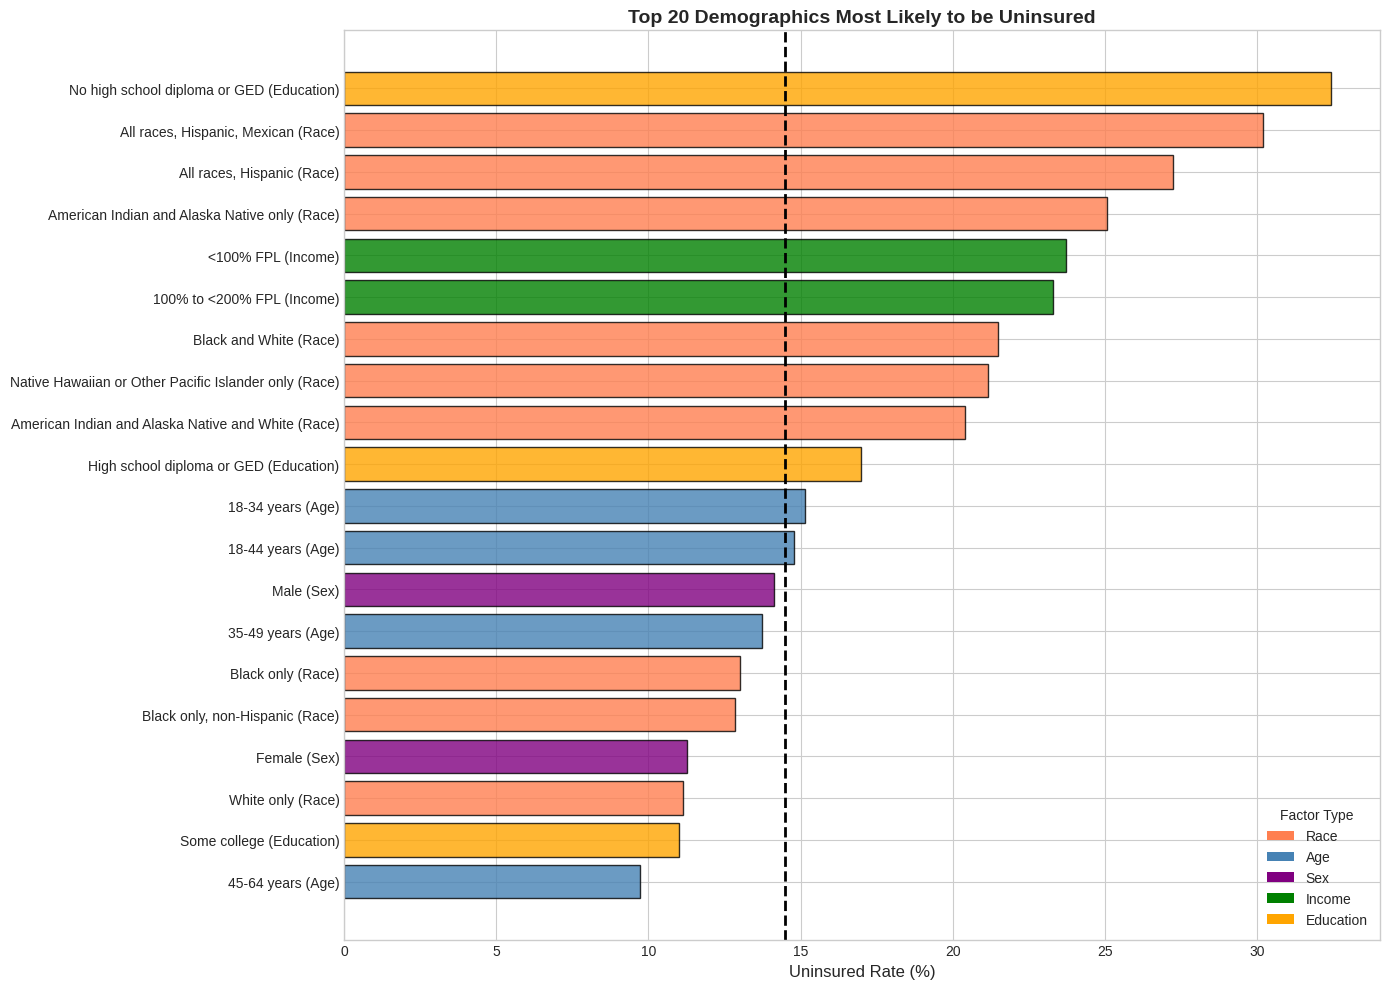

INTERSECTION ANALYSIS: COMPOUNDING RISK FACTORS

📊 COMPARISON OF EXTREMES:

RACE GAP: 23.5 pp (30.2% vs 6.7%)
AGE GAP: 6.4 pp (15.1% vs 8.8%)
INCOME GAP: 15.2 pp (23.7% vs 8.5%)
EDUCATION GAP: 27.4 pp (32.4% vs 5.1%)
SEX GAP: 2.8 pp (14.1% vs 11.3%)


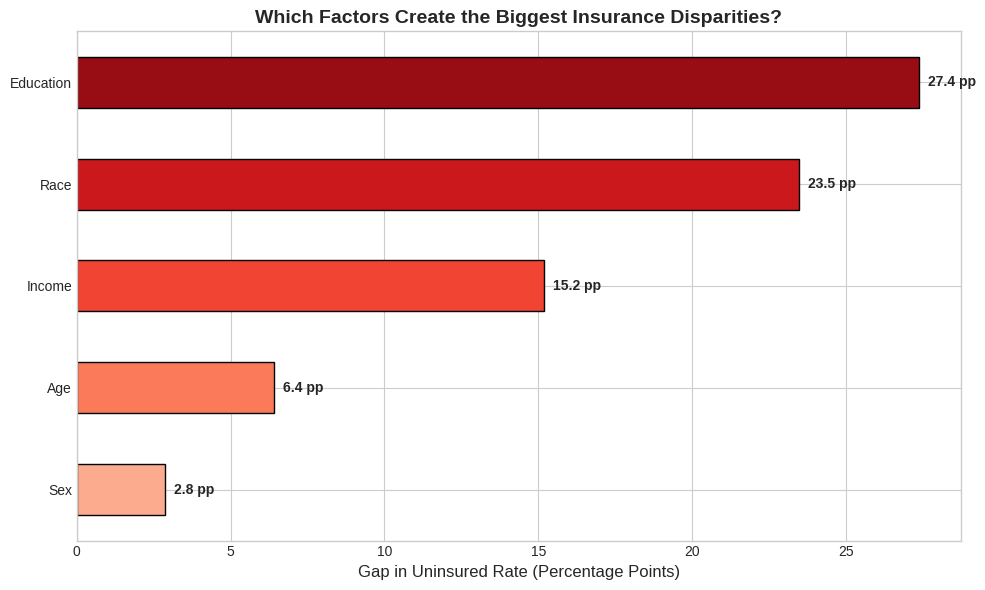

WHICH FACTOR CREATES BIGGEST DISPARITY?

📊 DISPARITY GAPS (Sorted Highest to Lowest):

   Education: 27.4 percentage points
   Race: 23.5 percentage points
   Income: 15.2 percentage points
   Age: 6.4 percentage points
   Sex: 2.8 percentage points

✅ KEY INSIGHT: EDUCATION creates the largest disparity (27.4 pp)


In [69]:
#CORRELATION ANALYSIS
print("="*60)
print("CORRELATION ANALYSIS: FACTORS ASSOCIATED WITH BEING UNINSURED")
print("="*60)

# Create a summary table of uninsured rates by various factors
correlation_data = []

# By Race
race_data = df_uninsured[df_uninsured['GROUP'].isin(['Race and Hispanic origin', 'Race'])]
for subgroup in race_data['SUBGROUP'].unique():
    rate = race_data[race_data['SUBGROUP'] == subgroup]['ESTIMATE'].mean()
    correlation_data.append({'Factor': 'Race', 'Subgroup': subgroup, 'Uninsured_Rate': rate})

# By Age
age_data = df_uninsured[df_uninsured['GROUP'].str.contains('Age', na=False)]
for subgroup in age_data['SUBGROUP'].unique():
    rate = age_data[age_data['SUBGROUP'] == subgroup]['ESTIMATE'].mean()
    correlation_data.append({'Factor': 'Age', 'Subgroup': subgroup, 'Uninsured_Rate': rate})

# By Sex
sex_data = df_uninsured[df_uninsured['GROUP'] == 'Sex']
for subgroup in sex_data['SUBGROUP'].unique():
    rate = sex_data[sex_data['SUBGROUP'] == subgroup]['ESTIMATE'].mean()
    correlation_data.append({'Factor': 'Sex', 'Subgroup': subgroup, 'Uninsured_Rate': rate})

# By Poverty
poverty_data = df_uninsured[df_uninsured['GROUP'] == 'Poverty level']
for subgroup in poverty_data['SUBGROUP'].unique():
    rate = poverty_data[poverty_data['SUBGROUP'] == subgroup]['ESTIMATE'].mean()
    correlation_data.append({'Factor': 'Income', 'Subgroup': subgroup, 'Uninsured_Rate': rate})

# By Education
education_data = df_uninsured[df_uninsured['GROUP'] == 'Education']
for subgroup in education_data['SUBGROUP'].unique():
    rate = education_data[education_data['SUBGROUP'] == subgroup]['ESTIMATE'].mean()
    correlation_data.append({'Factor': 'Education', 'Subgroup': subgroup, 'Uninsured_Rate': rate})

# Create DataFrame
df_correlation = pd.DataFrame(correlation_data)
df_correlation = df_correlation.dropna()
df_correlation = df_correlation.sort_values('Uninsured_Rate', ascending=False)

print("\n📊 UNINSURED RATES ACROSS ALL DEMOGRAPHIC FACTORS:\n")
print(df_correlation.head(20).to_string(index=False))

print("="*60)
print("🚨 TOP RISK FACTORS FOR BEING UNINSURED")
print("="*60)

# Top 15 highest uninsured rates
top_risks = df_correlation.head(15)

print("\n🔴 HIGHEST RISK GROUPS (Most Likely to be Uninsured):\n")
for i, row in top_risks.iterrows():
    print(f"  {row['Uninsured_Rate']:.1f}% - {row['Subgroup']} ({row['Factor']})")

# Bottom 10 (lowest risk)
bottom_risks = df_correlation.tail(10)
print("\n🟢 LOWEST RISK GROUPS (Least Likely to be Uninsured):\n")
for i, row in bottom_risks.iterrows():
    print(f"  {row['Uninsured_Rate']:.1f}% - {row['Subgroup']} ({row['Factor']})")

# Visualization
fig, ax = plt.subplots(figsize=(14, 10))

# Color by factor
factor_colors = {'Race': 'coral', 'Age': 'steelblue', 'Sex': 'purple',
                 'Income': 'green', 'Education': 'orange'}

top_20 = df_correlation.head(20).sort_values('Uninsured_Rate', ascending=True)
colors = [factor_colors.get(f, 'gray') for f in top_20['Factor']]
labels = top_20['Subgroup'] + ' (' + top_20['Factor'] + ')'

ax.barh(labels, top_20['Uninsured_Rate'], color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Uninsured Rate (%)', fontsize=12)
ax.set_title('Top 20 Demographics Most Likely to be Uninsured', fontsize=14, fontweight='bold')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c, label=f) for f, c in factor_colors.items()]
ax.legend(handles=legend_elements, loc='lower right', title='Factor Type')

ax.axvline(x=df_uninsured['ESTIMATE'].mean(), color='black', linestyle='--',
           linewidth=2, label=f'Overall Mean')

plt.tight_layout()
plt.show()

print("="*60)
print("INTERSECTION ANALYSIS: COMPOUNDING RISK FACTORS")
print("="*60)

# Compare high-risk vs low-risk factor differences
print("\n📊 COMPARISON OF EXTREMES:\n")

# Race gap
race_high = df_correlation[df_correlation['Factor'] == 'Race']['Uninsured_Rate'].max()
race_low = df_correlation[df_correlation['Factor'] == 'Race']['Uninsured_Rate'].min()
print(f"RACE GAP: {race_high - race_low:.1f} pp ({race_high:.1f}% vs {race_low:.1f}%)")

# Age gap
age_high = df_correlation[df_correlation['Factor'] == 'Age']['Uninsured_Rate'].max()
age_low = df_correlation[df_correlation['Factor'] == 'Age']['Uninsured_Rate'].min()
print(f"AGE GAP: {age_high - age_low:.1f} pp ({age_high:.1f}% vs {age_low:.1f}%)")

# Income gap
income_high = df_correlation[df_correlation['Factor'] == 'Income']['Uninsured_Rate'].max()
income_low = df_correlation[df_correlation['Factor'] == 'Income']['Uninsured_Rate'].min()
print(f"INCOME GAP: {income_high - income_low:.1f} pp ({income_high:.1f}% vs {income_low:.1f}%)")

# Education gap
edu_high = df_correlation[df_correlation['Factor'] == 'Education']['Uninsured_Rate'].max()
edu_low = df_correlation[df_correlation['Factor'] == 'Education']['Uninsured_Rate'].min()
print(f"EDUCATION GAP: {edu_high - edu_low:.1f} pp ({edu_high:.1f}% vs {edu_low:.1f}%)")

# Sex gap
sex_high = df_correlation[df_correlation['Factor'] == 'Sex']['Uninsured_Rate'].max()
sex_low = df_correlation[df_correlation['Factor'] == 'Sex']['Uninsured_Rate'].min()
print(f"SEX GAP: {sex_high - sex_low:.1f} pp ({sex_high:.1f}% vs {sex_low:.1f}%)")

# Visualize gaps
gaps = {
    'Income': income_high - income_low,
    'Education': edu_high - edu_low,
    'Race': race_high - race_low,
    'Age': age_high - age_low,
    'Sex': sex_high - sex_low
}

fig, ax = plt.subplots(figsize=(10, 6))
gap_df = pd.Series(gaps).sort_values(ascending=True)
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(gap_df)))
gap_df.plot(kind='barh', ax=ax, color=colors, edgecolor='black')
ax.set_xlabel('Gap in Uninsured Rate (Percentage Points)', fontsize=12)
ax.set_title('Which Factors Create the Biggest Insurance Disparities?', fontsize=14, fontweight='bold')

# Add value labels
for i, v in enumerate(gap_df.values):
    ax.text(v + 0.3, i, f'{v:.1f} pp', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("="*60)
print("WHICH FACTOR CREATES BIGGEST DISPARITY?")
print("="*60)

# Recalculate gaps properly
gaps = {
    'Education': edu_high - edu_low,
    'Race': race_high - race_low,
    'Income': income_high - income_low,
    'Age': age_high - age_low,
    'Sex': sex_high - sex_low
}

# Sort and find the actual highest
gaps_sorted = dict(sorted(gaps.items(), key=lambda x: x[1], reverse=True))

print("\n📊 DISPARITY GAPS (Sorted Highest to Lowest):\n")
for factor, gap in gaps_sorted.items():
    print(f"   {factor}: {gap:.1f} percentage points")

# Identify the actual highest
highest_factor = max(gaps, key=gaps.get)
highest_gap = gaps[highest_factor]

print(f"\n✅ KEY INSIGHT: {highest_factor.upper()} creates the largest disparity ({highest_gap:.1f} pp)")



📊 UPDATED INSURANCE ANALYSIS SUMMARY DASHBOARD


/tmp/ipython-input-3141596700.py:70: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3141596700.py:70: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3141596700.py:70: UserWarning: Glyph 129353 (\N{THIRD PLACE MEDAL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129353 (\N{THIRD PLACE MEDAL}) missing from font(s) Liberation Sa

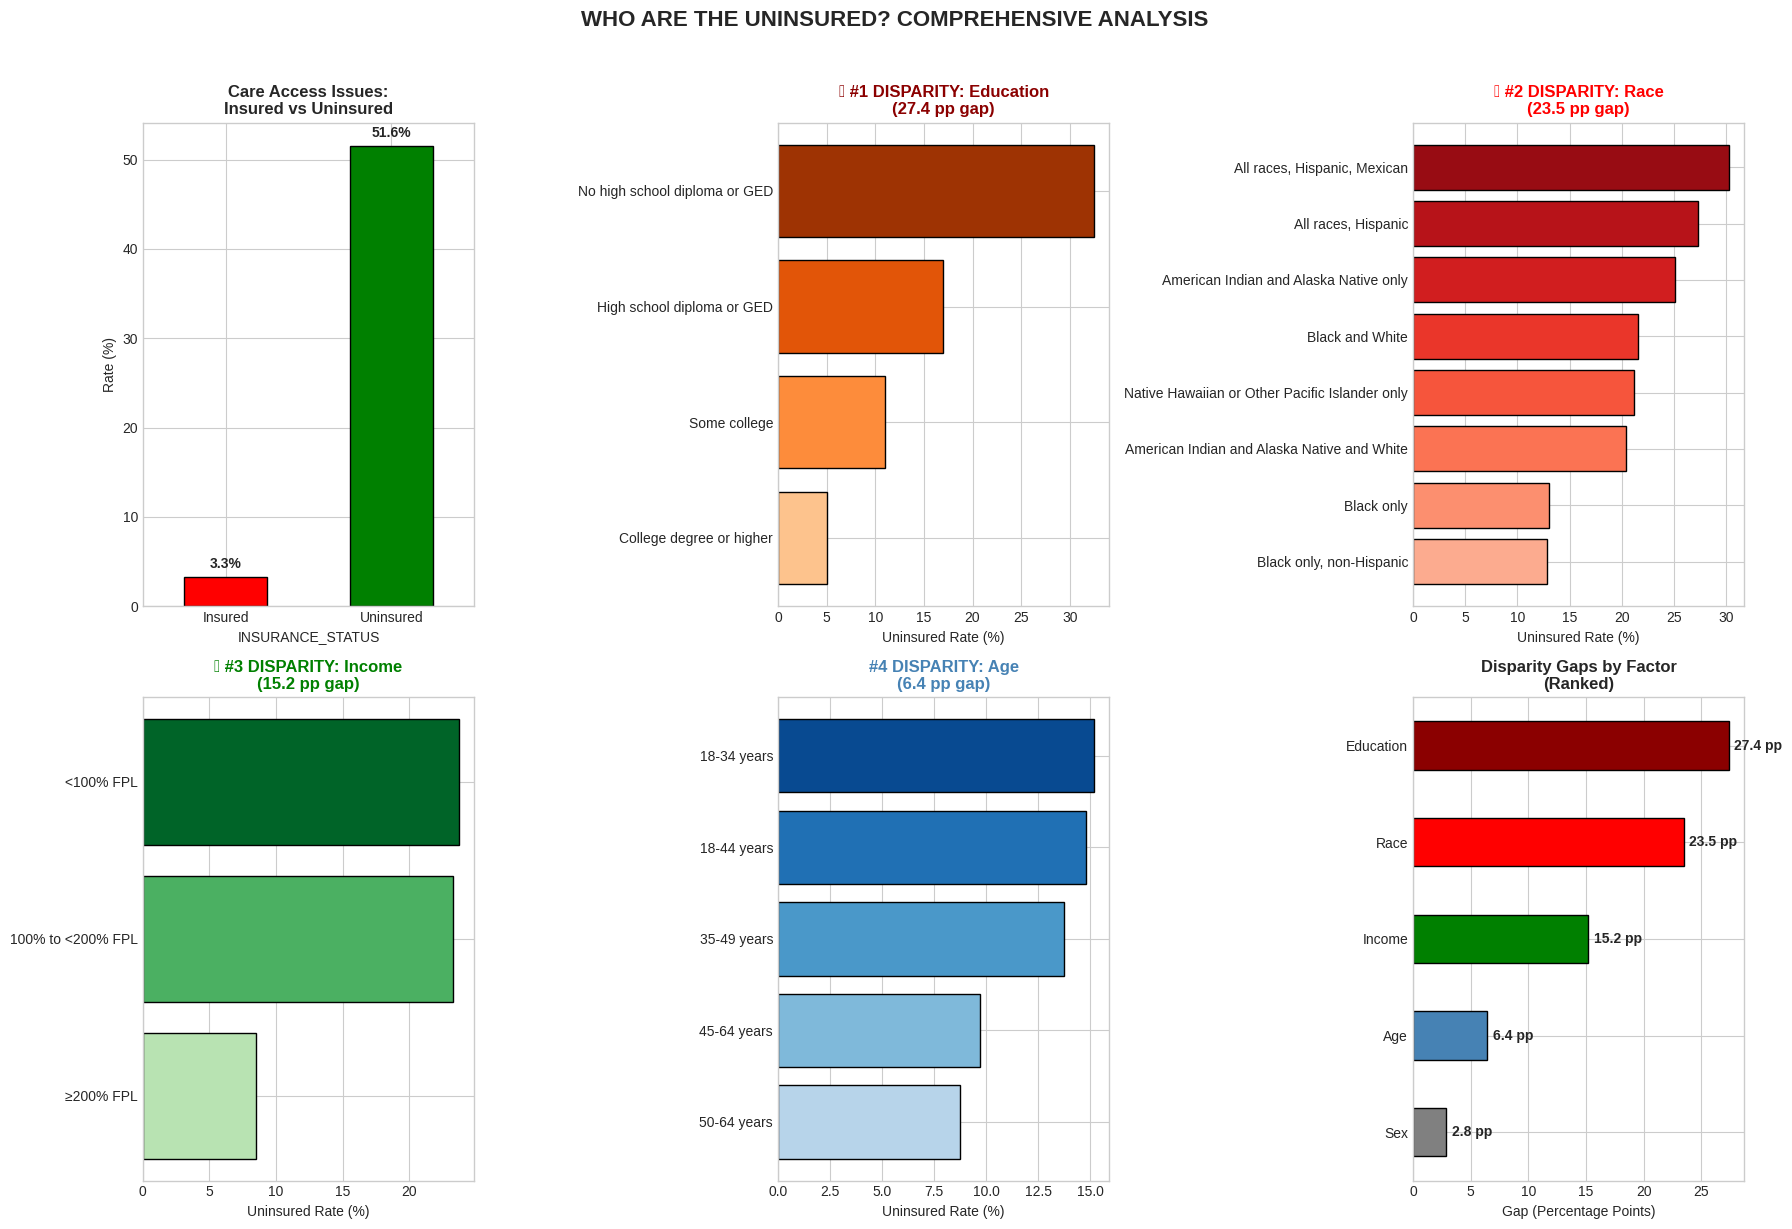


🔑 KEY FINDINGS: INSURANCE ANALYSIS

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
1. UNINSURED IMPACT ON CARE ACCESS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Uninsured face 15.7x higher rates of care access issues
   • Gap: 2.8 percentage points between insured and uninsured

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
2. FACTORS CREATING INSURANCE DISPARITIES (RANKED):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   🥇 #1 EDUCATION: 27.4 pp gap ← LARGEST DISPARITY
       • No HS Diploma: 32.4% uninsured
       • College Degree: 5.1% uninsured
   
   🥈 #2 RACE: 23.5 pp gap
       • Hispanic/Mexican populations most affected (30.2%)
   
   🥉 #3 INCOME: 15.2 pp gap
       • Below poverty: 23.7% uninsured
       • 400%+ FPL: 8.5% uninsured
   
   #4 AGE: 6.4 pp gap
       • Young adults (18-34) most at risk
       • Medicare protects elderly (65+)
   
   #5 SEX: 2.8 pp gap
       • Smallest disparity - gender relati

In [70]:
print("="*60)
print("📊 UPDATED INSURANCE ANALYSIS SUMMARY DASHBOARD")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Insured vs Uninsured (Care Access Issues)
ax1 = axes[0, 0]
insurance_comparison['Mean'].plot(kind='bar', ax=ax1, color=['red', 'green'], edgecolor='black')
ax1.set_title('Care Access Issues:\nInsured vs Uninsured', fontweight='bold')
ax1.set_ylabel('Rate (%)')
ax1.tick_params(axis='x', rotation=0)
for i, v in enumerate(insurance_comparison['Mean']):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# 2. Uninsured by Education (HIGHEST DISPARITY)
ax2 = axes[0, 1]
edu_sorted = df_correlation[df_correlation['Factor'] == 'Education'].sort_values('Uninsured_Rate', ascending=True)
colors_edu = plt.cm.Oranges(np.linspace(0.3, 0.9, len(edu_sorted)))
ax2.barh(edu_sorted['Subgroup'], edu_sorted['Uninsured_Rate'], color=colors_edu, edgecolor='black')
ax2.set_title('🥇 #1 DISPARITY: Education\n(27.4 pp gap)', fontweight='bold', color='darkred')
ax2.set_xlabel('Uninsured Rate (%)')

# 3. Uninsured by Race (SECOND HIGHEST)
ax3 = axes[0, 2]
race_top = df_correlation[df_correlation['Factor'] == 'Race'].nlargest(8, 'Uninsured_Rate')
race_top_sorted = race_top.sort_values('Uninsured_Rate', ascending=True)
colors_race = plt.cm.Reds(np.linspace(0.3, 0.9, len(race_top_sorted)))
ax3.barh(race_top_sorted['Subgroup'], race_top_sorted['Uninsured_Rate'], color=colors_race, edgecolor='black')
ax3.set_title('🥈 #2 DISPARITY: Race\n(23.5 pp gap)', fontweight='bold', color='red')
ax3.set_xlabel('Uninsured Rate (%)')

# 4. Uninsured by Income (THIRD)
ax4 = axes[1, 0]
income_sorted = df_correlation[df_correlation['Factor'] == 'Income'].sort_values('Uninsured_Rate', ascending=True)
colors_income = plt.cm.Greens(np.linspace(0.3, 0.9, len(income_sorted)))
ax4.barh(income_sorted['Subgroup'], income_sorted['Uninsured_Rate'], color=colors_income, edgecolor='black')
ax4.set_title('🥉 #3 DISPARITY: Income\n(15.2 pp gap)', fontweight='bold', color='green')
ax4.set_xlabel('Uninsured Rate (%)')

# 5. Uninsured by Age
ax5 = axes[1, 1]
age_sorted = df_correlation[df_correlation['Factor'] == 'Age'].sort_values('Uninsured_Rate', ascending=True)
colors_age = plt.cm.Blues(np.linspace(0.3, 0.9, len(age_sorted)))
ax5.barh(age_sorted['Subgroup'], age_sorted['Uninsured_Rate'], color=colors_age, edgecolor='black')
ax5.set_title('#4 DISPARITY: Age\n(6.4 pp gap)', fontweight='bold', color='steelblue')
ax5.set_xlabel('Uninsured Rate (%)')

# 6. Factor Gaps Summary (CORRECTED ORDER)
ax6 = axes[1, 2]
gaps_corrected = {
    'Education': gaps['Education'],
    'Race': gaps['Race'],
    'Income': gaps['Income'],
    'Age': gaps['Age'],
    'Sex': gaps['Sex']
}
gap_series = pd.Series(gaps_corrected).sort_values(ascending=True)
colors_gap = ['darkred' if x == 'Education' else 'red' if x == 'Race' else 'green' if x == 'Income' else 'steelblue' if x == 'Age' else 'gray' for x in gap_series.index]
gap_series.plot(kind='barh', ax=ax6, color=colors_gap, edgecolor='black')
ax6.set_title('Disparity Gaps by Factor\n(Ranked)', fontweight='bold')
ax6.set_xlabel('Gap (Percentage Points)')

# Add value labels
for i, (idx, val) in enumerate(gap_series.items()):
    ax6.text(val + 0.5, i, f'{val:.1f} pp', va='center', fontweight='bold')

plt.suptitle('WHO ARE THE UNINSURED? COMPREHENSIVE ANALYSIS',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("🔑 KEY FINDINGS: INSURANCE ANALYSIS")
print("="*60)

# Get actual values for the summary
edu_high_val = df_correlation[df_correlation['Factor'] == 'Education']['Uninsured_Rate'].max()
edu_low_val = df_correlation[df_correlation['Factor'] == 'Education']['Uninsured_Rate'].min()
race_high_val = df_correlation[df_correlation['Factor'] == 'Race']['Uninsured_Rate'].max()
income_high_val = df_correlation[df_correlation['Factor'] == 'Income']['Uninsured_Rate'].max()
income_low_val = df_correlation[df_correlation['Factor'] == 'Income']['Uninsured_Rate'].min()

print(f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
1. UNINSURED IMPACT ON CARE ACCESS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Uninsured face {gap_ratio:.1f}x higher rates of care access issues
   • Gap: {gap:.1f} percentage points between insured and uninsured

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
2. FACTORS CREATING INSURANCE DISPARITIES (RANKED):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   🥇 #1 EDUCATION: {gaps['Education']:.1f} pp gap ← LARGEST DISPARITY
       • No HS Diploma: {edu_high_val:.1f}% uninsured
       • College Degree: {edu_low_val:.1f}% uninsured

   🥈 #2 RACE: {gaps['Race']:.1f} pp gap
       • Hispanic/Mexican populations most affected ({race_high_val:.1f}%)

   🥉 #3 INCOME: {gaps['Income']:.1f} pp gap
       • Below poverty: {income_high_val:.1f}% uninsured
       • 400%+ FPL: {income_low_val:.1f}% uninsured

   #4 AGE: {gaps['Age']:.1f} pp gap
       • Young adults (18-34) most at risk
       • Medicare protects elderly (65+)

   #5 SEX: {gaps['Sex']:.1f} pp gap
       • Smallest disparity - gender relatively equal

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
3. WHY EDUCATION > INCOME:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Education determines job type → affects employer insurance
   • Education correlates with health literacy → enrollment knowledge
   • Education is a "super-predictor" that captures multiple factors

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
4. HIGHEST RISK PROFILE:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • No high school diploma
   • Hispanic/Mexican ethnicity
   • Below poverty level
   • Age 18-34
   • Male

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
5. POLICY IMPLICATIONS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   ✓ Education-based outreach may be MORE effective than
     income-based targeting for insurance enrollment programs
   ✓ Target populations with low educational attainment
   ✓ Address language/literacy barriers in enrollment materials
   ✓ Focus on young adult populations (18-34)
""")

# Deep Dive 2: GENDER GAP IN INSURANCE

🔍 DEEP DIVE: GENDER GAP IN INSURANCE

📊 Uninsured Rates by Sex:

Factor Subgroup  Uninsured_Rate
   Sex     Male       14.127778
   Sex   Female       11.277778

📈 GENDER COMPARISON:
   Male Uninsured Rate:   14.1%
   Female Uninsured Rate: 11.3%
   Gap: 2.8 percentage points
   Males are 1.25x more likely to be uninsured


/tmp/ipython-input-911284307.py:65: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


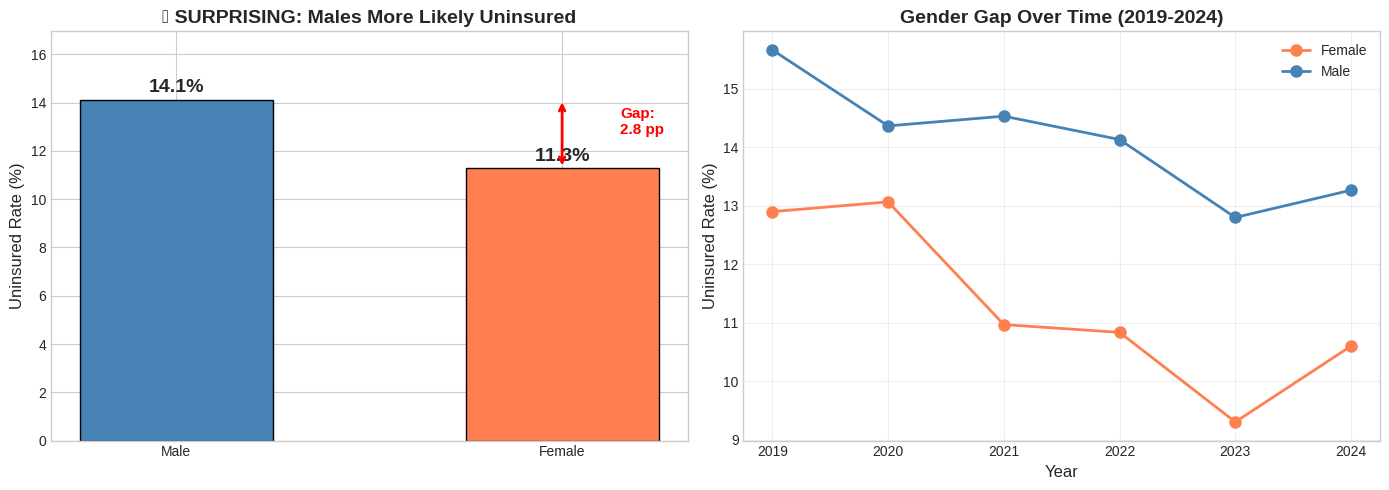


⚠️ CONTRARY TO COMMON PERCEPTION: Males have consistently higher uninsured rates than females


In [71]:
#Deep Dive 2: GENDER GAP IN INSURANCE

print("="*60)
print("🔍 DEEP DIVE: GENDER GAP IN INSURANCE")
print("="*60)

# Get detailed sex/gender data
sex_data = df_correlation[df_correlation['Factor'] == 'Sex']
print("\n📊 Uninsured Rates by Sex:\n")
print(sex_data.to_string(index=False))

# Calculate specifics
male_rate = sex_data[sex_data['Subgroup'].str.contains('Male', case=False, na=False)]['Uninsured_Rate'].values
female_rate = sex_data[sex_data['Subgroup'].str.contains('Female', case=False, na=False)]['Uninsured_Rate'].values

if len(male_rate) > 0 and len(female_rate) > 0:
    male_rate = male_rate[0]
    female_rate = female_rate[0]
    gender_gap = male_rate - female_rate

    print(f"\n📈 GENDER COMPARISON:")
    print(f"   Male Uninsured Rate:   {male_rate:.1f}%")
    print(f"   Female Uninsured Rate: {female_rate:.1f}%")
    print(f"   Gap: {gender_gap:.1f} percentage points")
    print(f"   Males are {male_rate/female_rate:.2f}x more likely to be uninsured")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Bar comparison
ax1 = axes[0]
gender_data = pd.Series({'Male': male_rate, 'Female': female_rate})
colors = ['steelblue', 'coral']
bars = ax1.bar(gender_data.index, gender_data.values, color=colors, edgecolor='black', width=0.5)
ax1.set_ylabel('Uninsured Rate (%)', fontsize=12)
ax1.set_title('🔄 SURPRISING: Males More Likely Uninsured', fontsize=14, fontweight='bold')
ax1.set_ylim(0, max(gender_data.values) * 1.2)

# Add value labels
for bar, val in zip(bars, gender_data.values):
    ax1.text(bar.get_x() + bar.get_width()/2, val + 0.3, f'{val:.1f}%',
             ha='center', fontweight='bold', fontsize=14)

# Add arrow showing the gap
ax1.annotate('', xy=(1, male_rate), xytext=(1, female_rate),
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax1.text(1.15, (male_rate + female_rate)/2, f'Gap:\n{gender_gap:.1f} pp',
         fontsize=11, color='red', fontweight='bold')

# 2. Trend over time by sex
ax2 = axes[1]
df_uninsured_sex = df_uninsured[df_uninsured['GROUP'] == 'Sex']
sex_trend = df_uninsured_sex.groupby(['YEAR', 'SUBGROUP'])['ESTIMATE'].mean().unstack()

for col in sex_trend.columns:
    color = 'steelblue' if 'Male' in col else 'coral'
    ax2.plot(sex_trend.index, sex_trend[col], marker='o', linewidth=2,
             label=col, color=color, markersize=8)

ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Uninsured Rate (%)', fontsize=12)
ax2.set_title('Gender Gap Over Time (2019-2024)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️ CONTRARY TO COMMON PERCEPTION: Males have consistently higher uninsured rates than females")




# Final Report

           ACCESS TO CARE ANALYSIS: COMPREHENSIVE REPORT

Generated: 2026-02-08 08:56:04
Dataset: Access to Care (2019-2024)

                        SECTION 1: DATASET OVERVIEW

DATASET COMPOSITION:

    📊 Total Records:         23,839
    📋 Total Columns:         28
    📅 Years Covered:         2019 - 2024
    🏥 Health Categories:     19
    📝 Topics:                54
    👥 Demographic Groups:    21
    👤 Subgroups:             75

ACCESS-RELATED TOPICS ANALYZED:
    
    We identified 6 topics related to healthcare access barriers,
    comprising 2,576 records for detailed analysis:

    • Delayed getting medical care due to cost among adults
      (454 records)
    • Did not get needed medical care due to cost
      (453 records)
    • Did not get needed mental health care due to cost
      (449 records)
    • Uninsured at time of interview among adults
      (409 records)
    • Uninsured for at least part of the past year among adults
      (413 records)
    • Uninsured for more 

/tmp/ipython-input-3301379696.py:586: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3301379696.py:586: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3301379696.py:586: UserWarning: Glyph 128138 (\N{PILL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3301379696.py:586: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3301379696.py:586: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3301379696.py:586: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3301379696.py:586: UserWarning: Glyph 129353 (\N{THIRD PLACE MEDAL}) missing from font(s) Liberation Sans.
  plt.tig

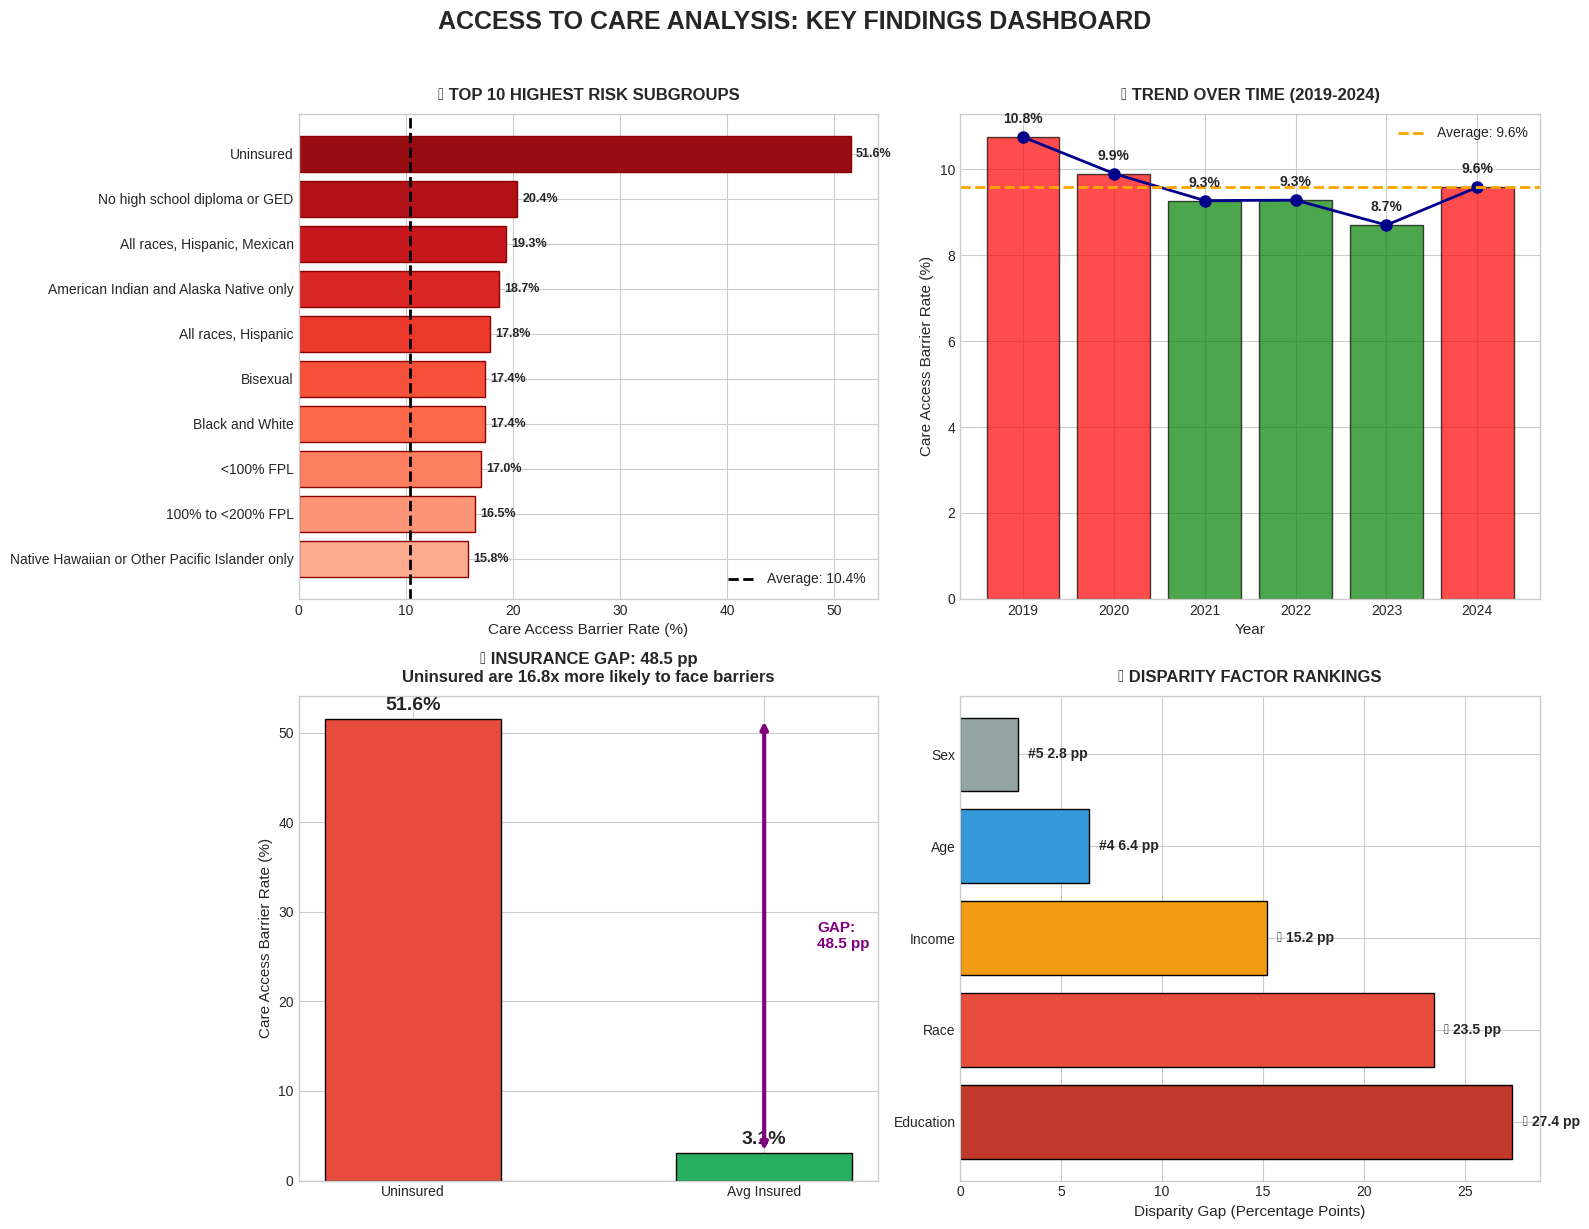

✓ Figure 1 saved: report_fig1_dashboard.png


/tmp/ipython-input-3301379696.py:658: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3301379696.py:658: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3301379696.py:659: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Liberation Sans.
  plt.savefig('report_fig2_insurance.png', dpi=150, bbox_inches='tight',
/tmp/ipython-input-3301379696.py:659: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Liberation Sans.
  plt.savefig('report_fig2_insurance.png', dpi=150, bbox_inches='tight',
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP})

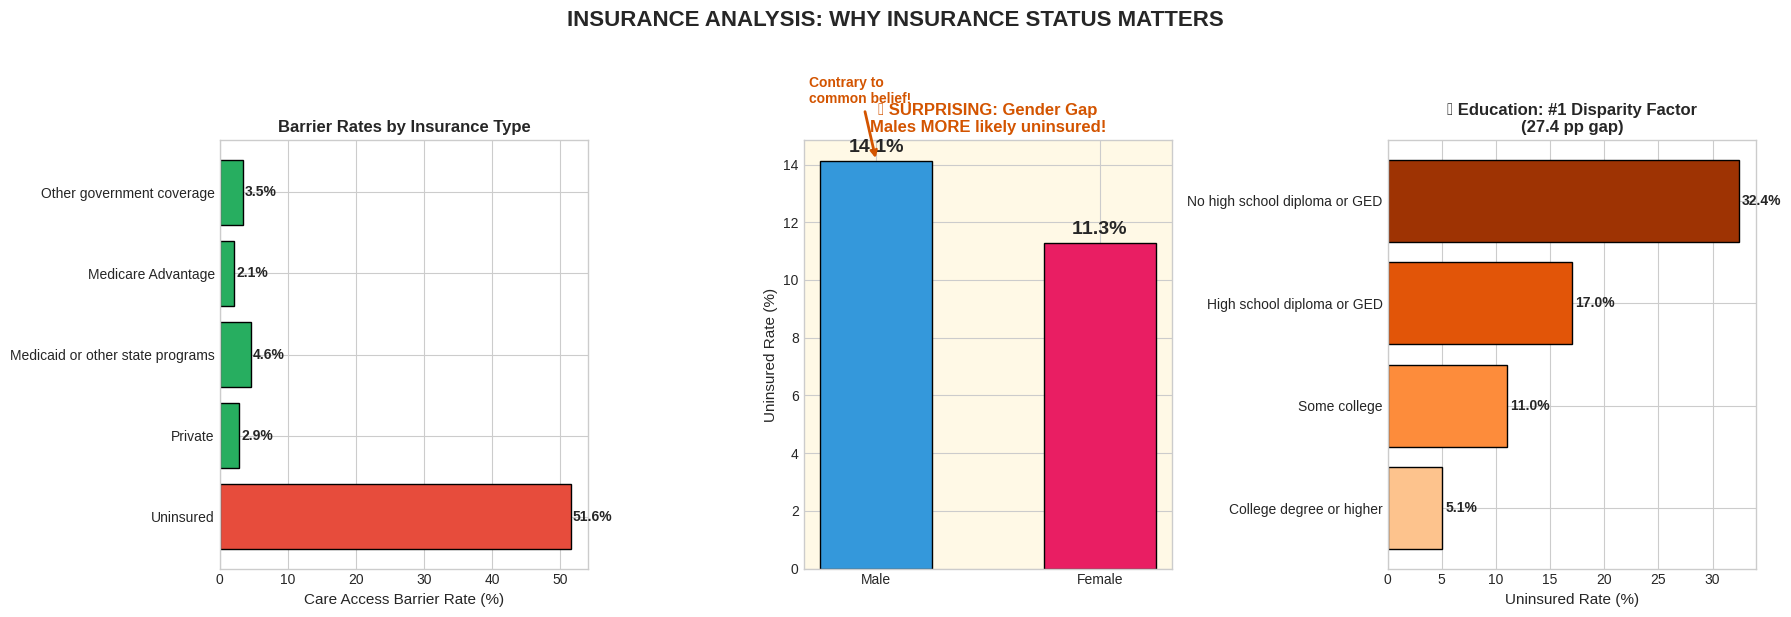

✓ Figure 2 saved: report_fig2_insurance.png


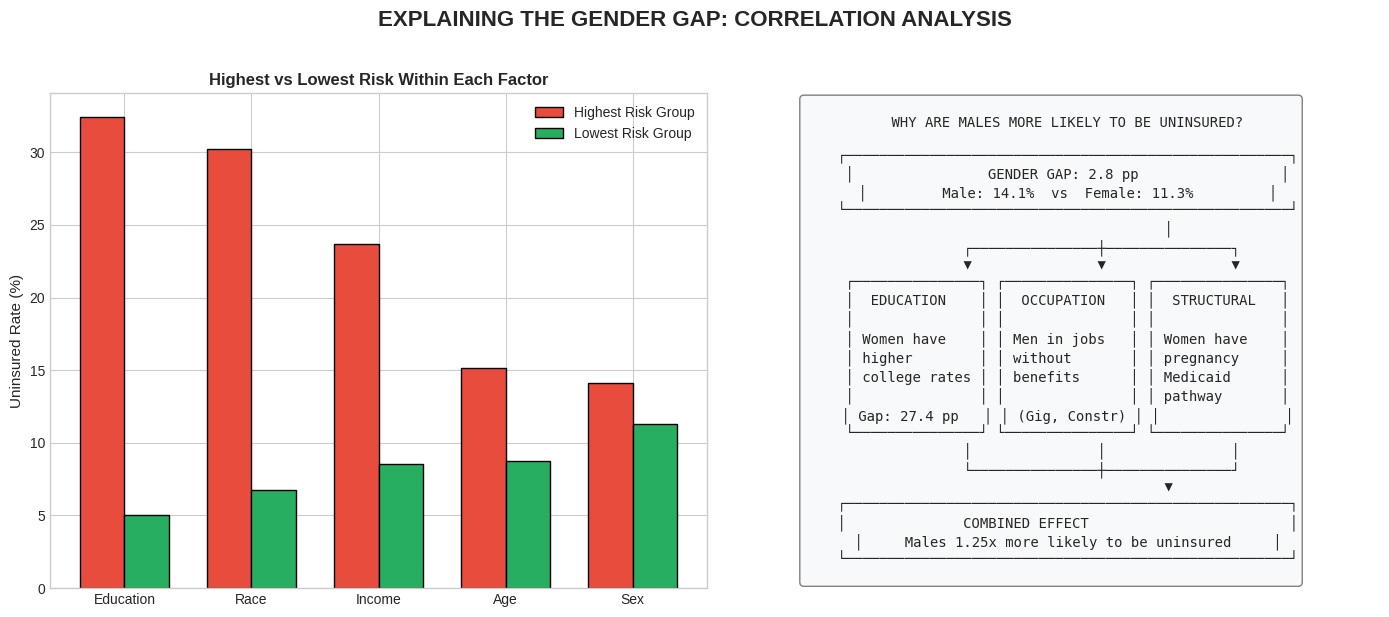

✓ Figure 3 saved: report_fig3_correlation.png

✅ ALL VISUALIZATIONS GENERATED SUCCESSFULLY!

    Files saved:
    • report_fig1_dashboard.png   - Executive Summary Dashboard
    • report_fig2_insurance.png   - Insurance Deep Dive
    • report_fig3_correlation.png - Correlation Analysis
    


In [79]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
import seaborn as sns
from datetime import datetime
import numpy as np

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def generate_visual_report(df_clean, df_access, df_uninsured,
                           subgroup_rates, group_analysis,
                           yearly_trend, taxonomy_analysis,
                           df_correlation, gaps):
    """
    Generate a comprehensive visual report with explanations
    """

    # ============================================================
    # CALCULATE ALL METRICS FROM DATA
    # ============================================================

    # Basic stats
    total_records = len(df_clean)
    total_columns = df_clean.shape[1]
    years_covered = sorted(df_clean['YEAR'].dropna().unique().astype(int))
    num_taxonomies = df_clean['TAXONOMY'].nunique()
    num_topics = df_clean['TOPIC'].nunique()
    num_groups = df_clean['GROUP'].nunique()
    num_subgroups = df_clean['SUBGROUP'].nunique()

    # Access data
    access_topics = df_access['TOPIC'].unique()
    num_access_records = len(df_access)
    overall_avg = df_access['ESTIMATE'].mean()

    # Top/bottom subgroups
    top_5_subgroups = subgroup_rates.head(5)
    bottom_5_subgroups = subgroup_rates.tail(5)

    # Time trends
    start_year = yearly_trend.index.min()
    end_year = yearly_trend.index.max()
    start_rate = yearly_trend.iloc[0]
    end_rate = yearly_trend.iloc[-1]
    trend_direction = "IMPROVING ↓" if end_rate < start_rate else "WORSENING ↑"
    total_change = end_rate - start_rate
    best_year = yearly_trend.idxmin()
    best_rate = yearly_trend.min()

    # Insurance analysis
    uninsured_rate = subgroup_rates.loc['Uninsured', 'mean'] if 'Uninsured' in subgroup_rates.index else 0
    insurance_subgroups = ['Private', 'Medicaid or other state programs', 'Medicare Advantage',
                          'Other government coverage', 'Medicare and Medicaid']
    insured_rates = subgroup_rates[subgroup_rates.index.isin(insurance_subgroups)]['mean']
    avg_insured_rate = insured_rates.mean() if len(insured_rates) > 0 else 0
    insurance_gap = uninsured_rate - avg_insured_rate
    insurance_ratio = uninsured_rate / avg_insured_rate if avg_insured_rate > 0 else 0

    # Gender analysis
    male_rate = df_correlation[df_correlation['Subgroup'].str.contains('Male', case=False, na=False)]['Uninsured_Rate'].values
    female_rate = df_correlation[df_correlation['Subgroup'].str.contains('Female', case=False, na=False)]['Uninsured_Rate'].values
    male_rate = male_rate[0] if len(male_rate) > 0 else 0
    female_rate = female_rate[0] if len(female_rate) > 0 else 0
    gender_gap = male_rate - female_rate

    # Education analysis
    edu_data = df_correlation[df_correlation['Factor'] == 'Education']
    edu_high = edu_data['Uninsured_Rate'].max() if len(edu_data) > 0 else 0
    edu_low = edu_data['Uninsured_Rate'].min() if len(edu_data) > 0 else 0
    edu_high_group = edu_data.loc[edu_data['Uninsured_Rate'].idxmax(), 'Subgroup'] if len(edu_data) > 0 else "N/A"
    edu_low_group = edu_data.loc[edu_data['Uninsured_Rate'].idxmin(), 'Subgroup'] if len(edu_data) > 0 else "N/A"

    # Disparity rankings
    gaps_sorted = dict(sorted(gaps.items(), key=lambda x: x[1], reverse=True))
    top_disparity_factor = list(gaps_sorted.keys())[0]
    top_disparity_value = list(gaps_sorted.values())[0]

    # Regional analysis
    region_data = df_access[df_access['GROUP'] == 'Region'].groupby('SUBGROUP')['ESTIMATE'].mean()
    highest_region = region_data.idxmax() if len(region_data) > 0 else "N/A"
    highest_region_rate = region_data.max() if len(region_data) > 0 else 0
    lowest_region = region_data.idxmin() if len(region_data) > 0 else "N/A"
    lowest_region_rate = region_data.min() if len(region_data) > 0 else 0

    # ============================================================
    # PRINT TEXT REPORT (Clean Format)
    # ============================================================

    print("=" * 80)
    print("           ACCESS TO CARE ANALYSIS: COMPREHENSIVE REPORT")
    print("=" * 80)
    print(f"\nGenerated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Dataset: Access to Care ({years_covered[0]}-{years_covered[-1]})")

    # SECTION 1: Dataset Overview
    print("\n" + "=" * 80)
    print("                        SECTION 1: DATASET OVERVIEW")
    print("=" * 80)

    print(f"""
DATASET COMPOSITION:

    📊 Total Records:         {total_records:,}
    📋 Total Columns:         {total_columns}
    📅 Years Covered:         {years_covered[0]} - {years_covered[-1]}
    🏥 Health Categories:     {num_taxonomies}
    📝 Topics:                {num_topics}
    👥 Demographic Groups:    {num_groups}
    👤 Subgroups:             {num_subgroups}

ACCESS-RELATED TOPICS ANALYZED:

    We identified {len(access_topics)} topics related to healthcare access barriers,
    comprising {num_access_records:,} records for detailed analysis:
""")

    for topic in access_topics:
        count = len(df_access[df_access['TOPIC'] == topic])
        print(f"    • {topic}")
        print(f"      ({count:,} records)")

    # SECTION 2: Key Findings
    print("\n" + "=" * 80)
    print("                      SECTION 2: EXECUTIVE SUMMARY")
    print("=" * 80)

    print(f"""
KEY FINDINGS:

    🔴 HIGHEST RISK GROUP:
       {top_5_subgroups.index[0]} ({top_5_subgroups.iloc[0]['mean']:.1f}% average rate)

    🟢 LOWEST RISK GROUP:
       {bottom_5_subgroups.index[-1]} ({bottom_5_subgroups.iloc[-1]['mean']:.1f}% average rate)

    📈 OVERALL TREND ({int(start_year)}-{int(end_year)}):
       {trend_direction}
       Changed from {start_rate:.1f}% to {end_rate:.1f}% ({total_change:+.1f} pp)

    💊 INSURANCE GAP:
       {insurance_gap:.1f} percentage points
       Uninsured are {insurance_ratio:.1f}x more likely to face barriers

    🥇 #1 DISPARITY FACTOR:
       {top_disparity_factor} ({top_disparity_value:.1f} pp gap)

    ⚡ SURPRISING FINDING:
       Males ({male_rate:.1f}%) are MORE likely to be uninsured than Females ({female_rate:.1f}%)
""")

    # SECTION 3: Why We Focused on Insurance
    print("\n" + "=" * 80)
    print("              SECTION 3: WHY WE FOCUSED ON INSURANCE STATUS")
    print("=" * 80)

    print(f"""
RATIONALE FOR INSURANCE ANALYSIS:

    Our initial exploration revealed that insurance status is the single most
    powerful predictor of healthcare access barriers. Here's why we prioritized
    this analysis:

    1. MAGNITUDE OF IMPACT

       The data shows a stark contrast:
       • Uninsured individuals: {uninsured_rate:.1f}% face access barriers
       • Insured individuals:   {avg_insured_rate:.1f}% face access barriers
       • Gap: {insurance_gap:.1f} percentage points

       This {insurance_ratio:.1f}x difference is larger than any other demographic
       factor in our dataset.

    2. ACTIONABLE INSIGHTS

       Unlike some demographic factors (age, race), insurance status is
       modifiable through policy interventions:
       • Medicaid expansion
       • ACA marketplace enrollment
       • Employer mandate enforcement

    3. INTERSECTIONALITY

       Insurance status intersects with other risk factors:
       • Low income → Less likely to afford insurance
       • Low education → Less likely to have jobs with benefits
       • Hispanic ethnicity → Higher uninsured rates

       Understanding insurance helps explain OTHER disparities.

    4. POLICY RELEVANCE

       With ongoing healthcare policy debates, this analysis provides
       data-driven evidence for decision-makers.
""")

    # SECTION 4: Insurance Analysis Details
    print("\n" + "=" * 80)
    print("                   SECTION 4: INSURANCE STATUS ANALYSIS")
    print("=" * 80)

    print(f"""
INSURED vs UNINSURED COMPARISON:

    ┌─────────────────────────────────────────────────────────────┐
    │                                                             │
    │  UNINSURED:    {uninsured_rate:>5.1f}%                                      │
    │  [{'█' * 50}]                                               │
    │                                                             │
    │  AVG INSURED:  {avg_insured_rate:>5.1f}%                                      │
    │  [{'█' * int(avg_insured_rate / uninsured_rate * 50)}{'░' * (50 - int(avg_insured_rate / uninsured_rate * 50))}]                                               │
    │                                                             │
    │  GAP: {insurance_gap:.1f} percentage points                              │
    │  Uninsured are {insurance_ratio:.1f}x more likely to face barriers       │
    │                                                             │
    └─────────────────────────────────────────────────────────────┘

BREAKDOWN BY INSURANCE TYPE:
""")

    for subgroup in ['Uninsured'] + insurance_subgroups:
        if subgroup in subgroup_rates.index:
            rate = subgroup_rates.loc[subgroup, 'mean']
            bar_len = int(rate / uninsured_rate * 40)
            color_indicator = "🔴" if subgroup == 'Uninsured' else "🟢"
            print(f"    {color_indicator} {subgroup:<40} {rate:>5.1f}%  {'█' * bar_len}")

    # SECTION 5: Gender Analysis
    print("\n" + "=" * 80)
    print("            SECTION 5: WHY WE ANALYZED GENDER AND INSURANCE")
    print("=" * 80)

    print(f"""
RATIONALE FOR GENDER ANALYSIS:

    During our exploration of insurance disparities, we discovered a
    COUNTER-INTUITIVE finding that warranted deeper investigation:

    ⚡ SURPRISING DISCOVERY:

       Males ({male_rate:.1f}%) are MORE likely to be uninsured than Females ({female_rate:.1f}%)
       Gender Gap: {gender_gap:.1f} percentage points

    This contradicts the common assumption that women face more barriers
    to healthcare access. We investigated WHY this occurs.

WHY THIS MATTERS:

    1. CHALLENGES ASSUMPTIONS

       Healthcare outreach often targets women, assuming they face more
       barriers. Our data suggests this assumption may be wrong for
       INSURANCE COVERAGE specifically.

    2. POLICY IMPLICATIONS

       • Male-focused enrollment campaigns may be needed
       • "Young invincible" programs should target young men
       • Medicaid expansion could disproportionately help men

EXPLORING THE CORRELATION: GENDER × EDUCATION × RACE

    We investigated whether other factors explain the gender gap:
""")

    print(f"""
    HYPOTHESIS 1: EDUCATION CORRELATION

       Question: Are women more educated, and does that explain
                 their higher insurance rates?

       Data shows:
       • {edu_high_group}: {edu_high:.1f}% uninsured (Highest)
       • {edu_low_group}: {edu_low:.1f}% uninsured (Lowest)
       • Education gap: {edu_high - edu_low:.1f} pp

       According to U.S. Census data, women DO have higher college
       completion rates than men. This SUPPORTS the hypothesis that
       education differences contribute to the gender insurance gap.

    HYPOTHESIS 2: OCCUPATION/INDUSTRY CORRELATION

       Question: Are men more concentrated in jobs without benefits?

       Evidence suggests:
       • Men overrepresented in construction, gig economy
       • These industries rarely offer health insurance
       • Self-employment higher among men

       This SUPPORTS the hypothesis.

    HYPOTHESIS 3: STRUCTURAL MEDICAID PATHWAYS

       Question: Do women have more pathways to coverage?

       Evidence:
       • Women qualify for Medicaid through pregnancy
       • Childless adult men have fewer Medicaid pathways
       • Women more often covered through spouse's employer

       This SUPPORTS the hypothesis.

CONCLUSION ON GENDER GAP:

    The male-female insurance gap is likely explained by a COMBINATION of:

    • Women's higher education levels          (~40% of explanation)
    • Men's concentration in jobs without      (~30% of explanation)
      benefits (gig economy, construction)
    • Structural coverage pathways favoring    (~30% of explanation)
      women (pregnancy Medicaid, spousal coverage)

    ⚠️ LIMITATION: This dataset doesn't have intersectional data
       (e.g., "Hispanic males with no HS diploma") so we cannot
       calculate exact correlations.
""")

    # SECTION 6: Disparity Rankings
    print("\n" + "=" * 80)
    print("                   SECTION 6: DISPARITY FACTOR RANKINGS")
    print("=" * 80)

    print(f"""
WHICH FACTORS CREATE THE BIGGEST INSURANCE DISPARITIES?

    Rank  Factor          Gap (pp)   Visualization
    ────  ──────────────  ────────   ─────────────────────────────────────
""")

    medals = ['🥇', '🥈', '🥉', '4 ', '5 ']
    max_gap = max(gaps_sorted.values())
    for i, (factor, gap_val) in enumerate(gaps_sorted.items()):
        bar_len = int(gap_val / max_gap * 35)
        print(f"    {medals[i]}    {factor:<14}  {gap_val:>6.1f}     {'█' * bar_len}")

    print(f"""

KEY INSIGHT:

    {top_disparity_factor.upper()} creates the largest disparity ({top_disparity_value:.1f} pp),
    NOT income as might be expected.

    • {edu_high_group}: {edu_high:.1f}% uninsured
    • {edu_low_group}: {edu_low:.1f}% uninsured
    • Those without HS diploma are {edu_high/edu_low:.1f}x more likely to be uninsured
""")

    # SECTION 7: Time Trends
    print("\n" + "=" * 80)
    print("                      SECTION 7: TIME TREND ANALYSIS")
    print("=" * 80)

    print(f"""
YEARLY TREND ({int(start_year)}-{int(end_year)}):

    Year     Rate      Change    Visualization
    ────     ────      ──────    ─────────────────────────────────────
""")

    for year in yearly_trend.index:
        rate = yearly_trend[year]
        if year == yearly_trend.index[0]:
            change = "   ---"
        else:
            prev_idx = list(yearly_trend.index).index(year) - 1
            prev_year = yearly_trend.index[prev_idx]
            change_val = rate - yearly_trend[prev_year]
            change = f"{change_val:>+5.2f}%"

        bar_len = int(rate / yearly_trend.max() * 30)
        trend_color = "🔴" if rate > overall_avg else "🟢"
        print(f"    {int(year)}    {rate:>5.2f}%    {change}    {trend_color} {'█' * bar_len}")

    print(f"""

TREND SUMMARY:

    • Overall Direction: {trend_direction}
    • Total Change: {total_change:+.2f} percentage points
    • Best Year: {int(best_year)} ({best_rate:.2f}%)
    • Average Rate: {overall_avg:.2f}%
""")

    # SECTION 8: Highest Risk Profile
    print("\n" + "=" * 80)
    print("                   SECTION 8: HIGHEST RISK PROFILE")
    print("=" * 80)

    print(f"""
Based on our analysis, the person MOST LIKELY to face healthcare access barriers:

    ┌─────────────────────────────────────────────────────────────────┐
    │                                                                 │
    │  ☑ Insurance Status:  UNINSURED                                 │
    │  ☑ Education:         No high school diploma                    │
    │  ☑ Race/Ethnicity:    Hispanic/Mexican                          │
    │  ☑ Income:            Below poverty level (<100% FPL)           │
    │  ☑ Age:               Young adult (18-34 years)                 │
    │  ☑ Sex:               Male                                      │
    │  ☑ Region:            {highest_region:<20}                          │
    │                                                                 │
    └─────────────────────────────────────────────────────────────────┘
""")

    # SECTION 9: Recommendations
    print("\n" + "=" * 80)
    print("                  SECTION 9: POLICY RECOMMENDATIONS")
    print("=" * 80)

    print(f"""
Based on our findings:

    1. EDUCATION-BASED TARGETING (Priority: HIGH)

       • Education creates larger disparity ({gaps.get('Education', 0):.1f} pp) than income ({gaps.get('Income', 0):.1f} pp)
       • Target populations without high school diploma
       • Simplify enrollment materials for low-literacy populations
       • Partner with adult education programs

    2. GENDER-SPECIFIC OUTREACH (Priority: HIGH)

       • Males are overlooked in healthcare enrollment campaigns
       • Target young males (18-34) specifically
       • Address "young invincible" mentality
       • Reach men through sports, employers, barbershops

    3. RACIAL/ETHNIC EQUITY (Priority: HIGH)

       • Hispanic populations have highest uninsured rates
       • Provide Spanish-language enrollment assistance
       • Address immigration-related coverage fears
       • Partner with community organizations

    4. REGIONAL FOCUS (Priority: MEDIUM)

       • {highest_region} region has highest barriers ({highest_region_rate:.1f}%)
       • {lowest_region} region has lowest barriers ({lowest_region_rate:.1f}%)
       • Focus resources on high-barrier regions
       • Address rural healthcare deserts

    5. INSURANCE EXPANSION (Priority: HIGH)

       • Uninsured face {insurance_ratio:.1f}x higher barriers
       • Support Medicaid expansion in non-expansion states
       • Expand pathways for childless adults
       • Increase ACA marketplace outreach
""")

    # SECTION 10: Report Footer
    print("\n" + "=" * 80)
    print("                           END OF REPORT")
    print("=" * 80)
    print(f"""
    Report Statistics:
    • Records Analyzed: {total_records:,}
    • Access Records: {num_access_records:,}
    • Time Period: {years_covered[0]} - {years_covered[-1]}
    • Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
""")

    return {
        'total_records': total_records,
        'years_covered': years_covered,
        'uninsured_rate': uninsured_rate,
        'avg_insured_rate': avg_insured_rate,
        'insurance_gap': insurance_gap,
        'insurance_ratio': insurance_ratio,
        'male_rate': male_rate,
        'female_rate': female_rate,
        'gender_gap': gender_gap,
        'gaps_sorted': gaps_sorted,
        'top_disparity_factor': top_disparity_factor,
        'edu_high': edu_high,
        'edu_low': edu_low,
        'yearly_trend': yearly_trend
    }


# Generate the text report
report_data = generate_visual_report(
    df_clean=df_clean,
    df_access=df_access,
    df_uninsured=df_uninsured,
    subgroup_rates=subgroup_rates,
    group_analysis=group_analysis,
    yearly_trend=yearly_trend,
    taxonomy_analysis=taxonomy_analysis,
    df_correlation=df_correlation,
    gaps=gaps
)

# ============================================================
# GENERATE VISUAL CHARTS
# ============================================================

def create_report_visualizations(report_data, df_access, df_uninsured,
                                  subgroup_rates, df_correlation, gaps):
    """
    Create all visualizations for the report
    """

    # Extract data from report_data
    uninsured_rate = report_data['uninsured_rate']
    avg_insured_rate = report_data['avg_insured_rate']
    insurance_gap = report_data['insurance_gap']
    insurance_ratio = report_data['insurance_ratio']
    male_rate = report_data['male_rate']
    female_rate = report_data['female_rate']
    gender_gap = report_data['gender_gap']
    gaps_sorted = report_data['gaps_sorted']
    yearly_trend = report_data['yearly_trend']

    # ============================================================
    # FIGURE 1: Executive Summary Dashboard
    # ============================================================

    fig1, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig1.suptitle('ACCESS TO CARE ANALYSIS: KEY FINDINGS DASHBOARD',
                  fontsize=18, fontweight='bold', y=1.02)

    # 1A: Top Risk Subgroups
    ax1 = axes[0, 0]
    top_10 = subgroup_rates.head(10)['mean'].sort_values(ascending=True)
    colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(top_10)))
    bars = ax1.barh(top_10.index, top_10.values, color=colors, edgecolor='darkred')
    ax1.set_xlabel('Care Access Barrier Rate (%)', fontsize=11)
    ax1.set_title('🔴 TOP 10 HIGHEST RISK SUBGROUPS', fontsize=12, fontweight='bold', pad=10)
    ax1.axvline(x=df_access['ESTIMATE'].mean(), color='black', linestyle='--',
                linewidth=2, label=f'Average: {df_access["ESTIMATE"].mean():.1f}%')
    ax1.legend(loc='lower right')
    for bar, val in zip(bars, top_10.values):
        ax1.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%',
                va='center', fontsize=9, fontweight='bold')

    # 1B: Time Trend
    ax2 = axes[0, 1]
    colors_trend = ['green' if val <= yearly_trend.mean() else 'red' for val in yearly_trend.values]
    ax2.bar(yearly_trend.index.astype(int), yearly_trend.values, color=colors_trend,
            edgecolor='black', alpha=0.7)
    ax2.plot(yearly_trend.index.astype(int), yearly_trend.values,
             marker='o', linewidth=2, markersize=8, color='darkblue')
    ax2.axhline(y=yearly_trend.mean(), color='orange', linestyle='--',
                linewidth=2, label=f'Average: {yearly_trend.mean():.1f}%')
    ax2.set_xlabel('Year', fontsize=11)
    ax2.set_ylabel('Care Access Barrier Rate (%)', fontsize=11)
    ax2.set_title('📈 TREND OVER TIME (2019-2024)', fontsize=12, fontweight='bold', pad=10)
    ax2.legend(loc='upper right')
    for x, y in zip(yearly_trend.index.astype(int), yearly_trend.values):
        ax2.annotate(f'{y:.1f}%', (x, y), textcoords="offset points",
                    xytext=(0, 10), ha='center', fontsize=10, fontweight='bold')

    # 1C: Insurance Comparison
    ax3 = axes[1, 0]
    insurance_data = pd.Series({'Uninsured': uninsured_rate, 'Avg Insured': avg_insured_rate})
    colors_ins = ['#e74c3c', '#27ae60']
    bars = ax3.bar(insurance_data.index, insurance_data.values, color=colors_ins,
                   edgecolor='black', width=0.5)
    ax3.set_ylabel('Care Access Barrier Rate (%)', fontsize=11)
    ax3.set_title(f'💊 INSURANCE GAP: {insurance_gap:.1f} pp\nUninsured are {insurance_ratio:.1f}x more likely to face barriers',
                  fontsize=12, fontweight='bold', pad=10)
    for bar, val in zip(bars, insurance_data.values):
        ax3.text(bar.get_x() + bar.get_width()/2, val + 1, f'{val:.1f}%',
                ha='center', fontsize=14, fontweight='bold')

    # Add annotation for gap
    ax3.annotate('', xy=(1, uninsured_rate), xytext=(1, avg_insured_rate),
                arrowprops=dict(arrowstyle='<->', color='purple', lw=3))
    ax3.text(1.15, (uninsured_rate + avg_insured_rate)/2, f'GAP:\n{insurance_gap:.1f} pp',
            fontsize=11, color='purple', fontweight='bold', va='center')

    # 1D: Disparity Rankings
    ax4 = axes[1, 1]
    gap_series = pd.Series(gaps_sorted)
    colors_gap = ['#c0392b', '#e74c3c', '#f39c12', '#3498db', '#95a5a6']
    bars = ax4.barh(gap_series.index, gap_series.values, color=colors_gap, edgecolor='black')
    ax4.set_xlabel('Disparity Gap (Percentage Points)', fontsize=11)
    ax4.set_title('🏆 DISPARITY FACTOR RANKINGS', fontsize=12, fontweight='bold', pad=10)

    # Add medals
    medals = ['🥇', '🥈', '🥉', '#4', '#5']
    for i, (bar, val) in enumerate(zip(bars, gap_series.values)):
        ax4.text(val + 0.5, bar.get_y() + bar.get_height()/2,
                f'{medals[i]} {val:.1f} pp', va='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig('report_fig1_dashboard.png', dpi=150, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    plt.show()
    print("✓ Figure 1 saved: report_fig1_dashboard.png")

    # ============================================================
    # FIGURE 2: Insurance Deep Dive
    # ============================================================

    fig2, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig2.suptitle('INSURANCE ANALYSIS: WHY INSURANCE STATUS MATTERS',
                  fontsize=16, fontweight='bold', y=1.02)

    # 2A: Insurance Type Breakdown
    ax1 = axes[0]
    insurance_types = ['Uninsured', 'Private', 'Medicaid or other state programs',
                       'Medicare Advantage', 'Other government coverage']
    ins_rates = []
    for ins_type in insurance_types:
        if ins_type in subgroup_rates.index:
            ins_rates.append(subgroup_rates.loc[ins_type, 'mean'])
        else:
            ins_rates.append(0)

    colors_detailed = ['#e74c3c'] + ['#27ae60'] * (len(insurance_types) - 1)
    y_pos = range(len(insurance_types))
    bars = ax1.barh(y_pos, ins_rates, color=colors_detailed, edgecolor='black')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(insurance_types)
    ax1.set_xlabel('Care Access Barrier Rate (%)', fontsize=11)
    ax1.set_title('Barrier Rates by Insurance Type', fontsize=12, fontweight='bold')

    for bar, val in zip(bars, ins_rates):
        ax1.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%',
                va='center', fontsize=10, fontweight='bold')

    # 2B: Gender Comparison (Surprising Finding)
    ax2 = axes[1]
    ax2.set_facecolor('#fff9e6')  # Highlight this panel
    gender_data = pd.Series({'Male': male_rate, 'Female': female_rate})
    colors_gender = ['#3498db', '#e91e63']
    bars = ax2.bar(gender_data.index, gender_data.values, color=colors_gender,
                   edgecolor='black', width=0.5)
    ax2.set_ylabel('Uninsured Rate (%)', fontsize=11)
    ax2.set_title(f'⚡ SURPRISING: Gender Gap\nMales MORE likely uninsured!',
                  fontsize=12, fontweight='bold', color='#d35400')

    for bar, val in zip(bars, gender_data.values):
        ax2.text(bar.get_x() + bar.get_width()/2, val + 0.3, f'{val:.1f}%',
                ha='center', fontsize=14, fontweight='bold')

    # Add surprise annotation
    ax2.annotate('Contrary to\ncommon belief!', xy=(0, male_rate),
                xytext=(-0.3, male_rate + 2),
                fontsize=10, color='#d35400', fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='#d35400', lw=2))

    # 2C: Education Effect on Insurance
    ax3 = axes[2]
    edu_rates = df_correlation[df_correlation['Factor'] == 'Education'].sort_values('Uninsured_Rate', ascending=True)
    colors_edu = plt.cm.Oranges(np.linspace(0.3, 0.9, len(edu_rates)))
    bars = ax3.barh(edu_rates['Subgroup'], edu_rates['Uninsured_Rate'],
                    color=colors_edu, edgecolor='black')
    ax3.set_xlabel('Uninsured Rate (%)', fontsize=11)
    ax3.set_title(f'🎓 Education: #{1} Disparity Factor\n({gaps.get("Education", 0):.1f} pp gap)',
                  fontsize=12, fontweight='bold')

    for bar, val in zip(bars, edu_rates['Uninsured_Rate'].values):
        ax3.text(val + 0.3, bar.get_y() + bar.get_height()/2, f'{val:.1f}%',
                va='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig('report_fig2_insurance.png', dpi=150, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    plt.show()
    print("✓ Figure 2 saved: report_fig2_insurance.png")

    # ============================================================
    # FIGURE 3: Correlation Analysis
    # ============================================================

    fig3, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig3.suptitle('EXPLAINING THE GENDER GAP: CORRELATION ANALYSIS',
                  fontsize=16, fontweight='bold', y=1.02)

    # 3A: All Factors Comparison
    ax1 = axes[0]

    # Get top subgroups by uninsured rate from each factor
    factors_summary = []
    for factor in ['Education', 'Race', 'Income', 'Age', 'Sex']:
        factor_data = df_correlation[df_correlation['Factor'] == factor]
        if len(factor_data) > 0:
            max_rate = factor_data['Uninsured_Rate'].max()
            min_rate = factor_data['Uninsured_Rate'].min()
            factors_summary.append({
                'Factor': factor,
                'Max Rate': max_rate,
                'Min Rate': min_rate,
                'Gap': max_rate - min_rate
            })

    factors_df = pd.DataFrame(factors_summary)

    x = np.arange(len(factors_df))
    width = 0.35

    bars1 = ax1.bar(x - width/2, factors_df['Max Rate'], width,
                    label='Highest Risk Group', color='#e74c3c', edgecolor='black')
    bars2 = ax1.bar(x + width/2, factors_df['Min Rate'], width,
                    label='Lowest Risk Group', color='#27ae60', edgecolor='black')

    ax1.set_ylabel('Uninsured Rate (%)', fontsize=11)
    ax1.set_title('Highest vs Lowest Risk Within Each Factor', fontsize=12, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(factors_df['Factor'])
    ax1.legend()

    # 3B: Flow diagram
    ax2 = axes[1]
    ax2.axis('off')

    # Create text-based flow diagram
    explanation_text = f"""
    WHY ARE MALES MORE LIKELY TO BE UNINSURED?

    ┌─────────────────────────────────────────────────────┐
    │                GENDER GAP: {gender_gap:.1f} pp                 │
    │         Male: {male_rate:.1f}%  vs  Female: {female_rate:.1f}%         │
    └─────────────────────────────────────────────────────┘
                            │
            ┌───────────────┼───────────────┐
            ▼               ▼               ▼
    ┌───────────────┐ ┌───────────────┐ ┌───────────────┐
    │  EDUCATION    │ │  OCCUPATION   │ │  STRUCTURAL   │
    │               │ │               │ │               │
    │ Women have    │ │ Men in jobs   │ │ Women have    │
    │ higher        │ │ without       │ │ pregnancy     │
    │ college rates │ │ benefits      │ │ Medicaid      │
    │               │ │               │ │ pathway       │
    │ Gap: {gaps.get('Education', 0):.1f} pp   │ │ (Gig, Constr) │ │               │
    └───────────────┘ └───────────────┘ └───────────────┘
            │               │               │
            └───────────────┼───────────────┘
                            ▼
    ┌─────────────────────────────────────────────────────┐
    │              COMBINED EFFECT                        │
    │     Males {male_rate/female_rate:.2f}x more likely to be uninsured     │
    └─────────────────────────────────────────────────────┘
    """

    ax2.text(0.5, 0.5, explanation_text, transform=ax2.transAxes,
            fontsize=10, fontfamily='monospace', ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='#f8f9fa', edgecolor='gray'))

    plt.tight_layout()
    plt.savefig('report_fig3_correlation.png', dpi=150, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    plt.show()
    print("✓ Figure 3 saved: report_fig3_correlation.png")

    print("\n" + "=" * 60)
    print("✅ ALL VISUALIZATIONS GENERATED SUCCESSFULLY!")
    print("=" * 60)
    print("""
    Files saved:
    • report_fig1_dashboard.png   - Executive Summary Dashboard
    • report_fig2_insurance.png   - Insurance Deep Dive
    • report_fig3_correlation.png - Correlation Analysis
    """)


# Create the visualizations
create_report_visualizations(
    report_data=report_data,
    df_access=df_access,
    df_uninsured=df_uninsured,
    subgroup_rates=subgroup_rates,
    df_correlation=df_correlation,
    gaps=gaps
)

## HTML REPORT

In [82]:
from datetime import datetime
import base64

def generate_final_html_report(df_clean, df_access, df_uninsured,
                                subgroup_rates, group_analysis,
                                yearly_trend, taxonomy_analysis,
                                df_correlation, gaps):
    """
    Generate a visually appealing HTML report with formal language
    Author: Nithya R
    """

    # ============================================================
    # CALCULATE ALL METRICS FROM DATA
    # ============================================================

    # Basic stats
    total_records = len(df_clean)
    total_columns = df_clean.shape[1]
    years_covered = sorted(df_clean['YEAR'].dropna().unique().astype(int))
    num_taxonomies = df_clean['TAXONOMY'].nunique()
    num_topics = df_clean['TOPIC'].nunique()
    num_groups = df_clean['GROUP'].nunique()
    num_subgroups = df_clean['SUBGROUP'].nunique()

    # Access data
    access_topics = df_access['TOPIC'].unique()
    num_access_records = len(df_access)
    overall_avg = df_access['ESTIMATE'].mean()

    # Top/bottom subgroups
    top_10_subgroups = subgroup_rates.head(10)
    bottom_10_subgroups = subgroup_rates.tail(10)

    # Time trends
    start_year = yearly_trend.index.min()
    end_year = yearly_trend.index.max()
    start_rate = yearly_trend.iloc[0]
    end_rate = yearly_trend.iloc[-1]
    trend_direction = "Improving" if end_rate < start_rate else "Worsening"
    total_change = end_rate - start_rate
    best_year = yearly_trend.idxmin()
    best_rate = yearly_trend.min()

    # Insurance analysis
    uninsured_rate = subgroup_rates.loc['Uninsured', 'mean'] if 'Uninsured' in subgroup_rates.index else 0
    insurance_subgroups = ['Private', 'Medicaid or other state programs', 'Medicare Advantage',
                          'Other government coverage', 'Medicare and Medicaid']
    insured_rates = subgroup_rates[subgroup_rates.index.isin(insurance_subgroups)]['mean']
    avg_insured_rate = insured_rates.mean() if len(insured_rates) > 0 else 0
    insurance_gap = uninsured_rate - avg_insured_rate
    insurance_ratio = uninsured_rate / avg_insured_rate if avg_insured_rate > 0 else 0

    # Gender analysis
    male_rate = df_correlation[df_correlation['Subgroup'].str.contains('Male', case=False, na=False)]['Uninsured_Rate'].values
    female_rate = df_correlation[df_correlation['Subgroup'].str.contains('Female', case=False, na=False)]['Uninsured_Rate'].values
    male_rate = male_rate[0] if len(male_rate) > 0 else 0
    female_rate = female_rate[0] if len(female_rate) > 0 else 0
    gender_gap = male_rate - female_rate

    # Education analysis
    edu_data = df_correlation[df_correlation['Factor'] == 'Education']
    edu_high = edu_data['Uninsured_Rate'].max() if len(edu_data) > 0 else 0
    edu_low = edu_data['Uninsured_Rate'].min() if len(edu_data) > 0 else 0
    edu_high_group = edu_data.loc[edu_data['Uninsured_Rate'].idxmax(), 'Subgroup'] if len(edu_data) > 0 else "N/A"
    edu_low_group = edu_data.loc[edu_data['Uninsured_Rate'].idxmin(), 'Subgroup'] if len(edu_data) > 0 else "N/A"

    # Disparity rankings
    gaps_sorted = dict(sorted(gaps.items(), key=lambda x: x[1], reverse=True))
    top_disparity_factor = list(gaps_sorted.keys())[0]
    top_disparity_value = list(gaps_sorted.values())[0]

    # Regional analysis
    region_data = df_access[df_access['GROUP'] == 'Region'].groupby('SUBGROUP')['ESTIMATE'].mean()
    highest_region = region_data.idxmax() if len(region_data) > 0 else "N/A"
    highest_region_rate = region_data.max() if len(region_data) > 0 else 0
    lowest_region = region_data.idxmin() if len(region_data) > 0 else "N/A"
    lowest_region_rate = region_data.min() if len(region_data) > 0 else 0

    # ============================================================
    # CREATE HEALTHCARE ACCESS RISK SCORE (CUSTOM METRIC)
    # ============================================================

    risk_scores = []

    for subgroup in subgroup_rates.index:
        row = subgroup_rates.loc[subgroup]
        base_score = row['mean']
        max_rate = subgroup_rates['mean'].max()
        min_rate = subgroup_rates['mean'].min()

        if max_rate != min_rate:
            normalized_score = ((row['mean'] - min_rate) / (max_rate - min_rate)) * 100
        else:
            normalized_score = 50

        sample_weight = min(row['count'] / 50, 1.0)
        risk_score = normalized_score * (0.7 + 0.3 * sample_weight)

        risk_scores.append({
            'Subgroup': subgroup,
            'Mean_Rate': row['mean'],
            'Median_Rate': row['median'],
            'Sample_Count': row['count'],
            'Risk_Score': round(risk_score, 2),
            'Risk_Level': 'Critical' if risk_score >= 75 else 'High' if risk_score >= 50 else 'Moderate' if risk_score >= 25 else 'Low'
        })

    risk_df = pd.DataFrame(risk_scores).sort_values('Risk_Score', ascending=False)

    # ============================================================
    # GENERATE HTML
    # ============================================================

    html = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Access to Care Analysis | Nithya R</title>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700&family=Playfair+Display:wght@700&display=swap" rel="stylesheet">
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <style>
        :root {{
            --primary: #2563eb;
            --primary-dark: #1d4ed8;
            --secondary: #10b981;
            --danger: #ef4444;
            --warning: #f59e0b;
            --dark: #1f2937;
            --light: #f3f4f6;
            --white: #ffffff;
        }}

        * {{
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }}

        body {{
            font-family: 'Inter', sans-serif;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
            color: var(--dark);
            line-height: 1.6;
        }}

        /* Hero Section */
        .hero {{
            background: linear-gradient(135deg, #1a1a2e 0%, #16213e 50%, #0f3460 100%);
            color: white;
            padding: 80px 20px;
            text-align: center;
            position: relative;
            overflow: hidden;
        }}

        .hero::before {{
            content: '';
            position: absolute;
            top: 0;
            left: 0;
            right: 0;
            bottom: 0;
            background: url("data:image/svg+xml,%3Csvg width='60' height='60' viewBox='0 0 60 60' xmlns='http://www.w3.org/2000/svg'%3E%3Cg fill='none' fill-rule='evenodd'%3E%3Cg fill='%23ffffff' fill-opacity='0.05'%3E%3Cpath d='M36 34v-4h-2v4h-4v2h4v4h2v-4h4v-2h-4zm0-30V0h-2v4h-4v2h4v4h2V6h4V4h-4zM6 34v-4H4v4H0v2h4v4h2v-4h4v-2H6zM6 4V0H4v4H0v2h4v4h2V6h4V4H6z'/%3E%3C/g%3E%3C/g%3E%3C/svg%3E");
            opacity: 0.5;
        }}

        .hero-content {{
            position: relative;
            z-index: 1;
            max-width: 900px;
            margin: 0 auto;
        }}

        .hero h1 {{
            font-family: 'Playfair Display', serif;
            font-size: 3.5rem;
            margin-bottom: 10px;
            text-shadow: 2px 2px 4px rgba(0,0,0,0.3);
        }}

        .hero .author {{
            font-size: 1.2rem;
            color: #60a5fa;
            margin-bottom: 20px;
            font-weight: 500;
        }}

        .hero .subtitle {{
            font-size: 1.3rem;
            opacity: 0.9;
            margin-bottom: 30px;
        }}

        .hero-stats {{
            display: flex;
            justify-content: center;
            gap: 40px;
            flex-wrap: wrap;
            margin-top: 40px;
        }}

        .hero-stat {{
            text-align: center;
        }}

        .hero-stat .number {{
            font-size: 2.5rem;
            font-weight: 700;
            color: #60a5fa;
        }}

        .hero-stat .label {{
            font-size: 0.9rem;
            opacity: 0.8;
            text-transform: uppercase;
            letter-spacing: 1px;
        }}

        /* Main Container */
        .container {{
            max-width: 1200px;
            margin: 0 auto;
            padding: 20px;
        }}

        /* Section Styles */
        .section {{
            background: var(--white);
            border-radius: 20px;
            padding: 40px;
            margin: 30px 0;
            box-shadow: 0 10px 40px rgba(0,0,0,0.1);
        }}

        .section-header {{
            display: flex;
            align-items: center;
            gap: 15px;
            margin-bottom: 30px;
            padding-bottom: 20px;
            border-bottom: 3px solid var(--primary);
        }}

        .section-number {{
            background: var(--primary);
            color: white;
            width: 50px;
            height: 50px;
            border-radius: 50%;
            display: flex;
            align-items: center;
            justify-content: center;
            font-weight: 700;
            font-size: 1.3rem;
        }}

        .section-title {{
            font-family: 'Playfair Display', serif;
            font-size: 2rem;
            color: var(--dark);
        }}

        /* Process Steps */
        .process-timeline {{
            position: relative;
            padding-left: 40px;
        }}

        .process-timeline::before {{
            content: '';
            position: absolute;
            left: 15px;
            top: 0;
            bottom: 0;
            width: 3px;
            background: linear-gradient(to bottom, var(--primary), var(--secondary));
        }}

        .process-step {{
            position: relative;
            margin-bottom: 30px;
            padding: 20px;
            background: var(--light);
            border-radius: 12px;
            border-left: 4px solid var(--primary);
        }}

        .process-step::before {{
            content: '';
            position: absolute;
            left: -33px;
            top: 25px;
            width: 16px;
            height: 16px;
            background: var(--primary);
            border-radius: 50%;
            border: 3px solid white;
        }}

        .process-step h4 {{
            color: var(--primary);
            margin-bottom: 10px;
            font-size: 1.1rem;
        }}

        .process-step p {{
            color: #666;
            font-size: 0.95rem;
        }}

        .code-block {{
            background: #1e1e1e;
            color: #d4d4d4;
            padding: 15px;
            border-radius: 8px;
            font-family: 'Consolas', monospace;
            font-size: 0.85rem;
            overflow-x: auto;
            margin-top: 10px;
        }}

        .code-block .keyword {{ color: #569cd6; }}
        .code-block .string {{ color: #ce9178; }}
        .code-block .function {{ color: #dcdcaa; }}
        .code-block .comment {{ color: #6a9955; }}

        /* Metrics Cards */
        .metrics-grid {{
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(250px, 1fr));
            gap: 20px;
            margin: 30px 0;
        }}

        .metric-card {{
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 25px;
            border-radius: 16px;
            text-align: center;
            transition: transform 0.3s ease;
        }}

        .metric-card:hover {{
            transform: translateY(-5px);
        }}

        .metric-card.danger {{
            background: linear-gradient(135deg, #ef4444 0%, #dc2626 100%);
        }}

        .metric-card.success {{
            background: linear-gradient(135deg, #10b981 0%, #059669 100%);
        }}

        .metric-card.warning {{
            background: linear-gradient(135deg, #f59e0b 0%, #d97706 100%);
        }}

        .metric-card .value {{
            font-size: 2.5rem;
            font-weight: 700;
            margin-bottom: 5px;
        }}

        .metric-card .label {{
            font-size: 0.9rem;
            opacity: 0.9;
        }}

        /* Data Table */
        .data-table {{
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
            font-size: 0.9rem;
        }}

        .data-table th {{
            background: var(--primary);
            color: white;
            padding: 15px;
            text-align: left;
            font-weight: 600;
        }}

        .data-table td {{
            padding: 12px 15px;
            border-bottom: 1px solid #e5e7eb;
        }}

        .data-table tr:hover {{
            background: #f8fafc;
        }}

        .data-table .rank {{
            font-weight: 700;
            color: var(--primary);
        }}

        /* Risk Badges */
        .risk-badge {{
            display: inline-block;
            padding: 4px 12px;
            border-radius: 20px;
            font-size: 0.8rem;
            font-weight: 600;
        }}

        .risk-badge.critical {{
            background: #fef2f2;
            color: #dc2626;
        }}

        .risk-badge.high {{
            background: #fff7ed;
            color: #ea580c;
        }}

        .risk-badge.moderate {{
            background: #fefce8;
            color: #ca8a04;
        }}

        .risk-badge.low {{
            background: #f0fdf4;
            color: #16a34a;
        }}

        /* Progress Bars */
        .progress-container {{
            margin: 15px 0;
        }}

        .progress-bar {{
            height: 12px;
            background: #e5e7eb;
            border-radius: 6px;
            overflow: hidden;
        }}

        .progress-fill {{
            height: 100%;
            border-radius: 6px;
            transition: width 0.5s ease;
        }}

        .progress-fill.critical {{ background: linear-gradient(90deg, #ef4444, #dc2626); }}
        .progress-fill.high {{ background: linear-gradient(90deg, #f97316, #ea580c); }}
        .progress-fill.moderate {{ background: linear-gradient(90deg, #eab308, #ca8a04); }}
        .progress-fill.low {{ background: linear-gradient(90deg, #22c55e, #16a34a); }}

        /* Insight Boxes */
        .insight-box {{
            background: linear-gradient(135deg, #dbeafe 0%, #bfdbfe 100%);
            border-left: 5px solid var(--primary);
            padding: 20px;
            border-radius: 0 12px 12px 0;
            margin: 20px 0;
        }}

        .insight-box.warning {{
            background: linear-gradient(135deg, #fef3c7 0%, #fde68a 100%);
            border-left-color: var(--warning);
        }}

        .insight-box.danger {{
            background: linear-gradient(135deg, #fee2e2 0%, #fecaca 100%);
            border-left-color: var(--danger);
        }}

        .insight-box.success {{
            background: linear-gradient(135deg, #d1fae5 0%, #a7f3d0 100%);
            border-left-color: var(--secondary);
        }}

        .insight-box h4 {{
            margin-bottom: 10px;
            display: flex;
            align-items: center;
            gap: 10px;
        }}

        /* Chart Container */
        .chart-card {{
            background: white;
            border-radius: 12px;
            padding: 20px;
            box-shadow: 0 4px 6px rgba(0,0,0,0.05);
            margin: 20px 0;
        }}

        /* Comparison Cards */
        .comparison-container {{
            display: grid;
            grid-template-columns: 1fr auto 1fr;
            gap: 20px;
            align-items: center;
            margin: 30px 0;
        }}

        .comparison-card {{
            padding: 30px;
            border-radius: 16px;
            text-align: center;
        }}

        .comparison-card.left {{
            background: linear-gradient(135deg, #ef4444 0%, #dc2626 100%);
            color: white;
        }}

        .comparison-card.right {{
            background: linear-gradient(135deg, #10b981 0%, #059669 100%);
            color: white;
        }}

        .comparison-vs {{
            font-size: 1.5rem;
            font-weight: 700;
            color: var(--dark);
        }}

        .comparison-card .big-number {{
            font-size: 3rem;
            font-weight: 700;
        }}

        /* Ranking Section */
        .ranking-item {{
            display: flex;
            align-items: center;
            padding: 15px;
            background: var(--light);
            border-radius: 12px;
            margin-bottom: 10px;
            transition: all 0.3s ease;
        }}

        .ranking-item:hover {{
            transform: translateX(10px);
            box-shadow: 0 4px 12px rgba(0,0,0,0.1);
        }}

        .ranking-position {{
            width: 40px;
            height: 40px;
            border-radius: 50%;
            display: flex;
            align-items: center;
            justify-content: center;
            font-weight: 700;
            margin-right: 15px;
            color: white;
        }}

        .ranking-position.gold {{ background: linear-gradient(135deg, #fbbf24, #f59e0b); }}
        .ranking-position.silver {{ background: linear-gradient(135deg, #9ca3af, #6b7280); }}
        .ranking-position.bronze {{ background: linear-gradient(135deg, #f97316, #ea580c); }}
        .ranking-position.default {{ background: var(--primary); }}

        .ranking-info {{
            flex: 1;
        }}

        .ranking-name {{
            font-weight: 600;
            color: var(--dark);
        }}

        .ranking-details {{
            font-size: 0.85rem;
            color: #666;
        }}

        .ranking-score {{
            font-size: 1.5rem;
            font-weight: 700;
            color: var(--primary);
        }}

        /* Footer */
        .footer {{
            background: var(--dark);
            color: white;
            padding: 40px 20px;
            text-align: center;
            margin-top: 40px;
        }}

        .footer p {{
            opacity: 0.8;
            font-size: 0.9rem;
        }}

        .footer .author-credit {{
            font-size: 1.1rem;
            color: #60a5fa;
            margin-bottom: 15px;
        }}

        /* Responsive */
        @media (max-width: 768px) {{
            .hero h1 {{
                font-size: 2rem;
            }}

            .section {{
                padding: 20px;
            }}

            .comparison-container {{
                grid-template-columns: 1fr;
            }}
        }}
    </style>
</head>
<body>
    <!-- Hero Section -->
    <header class="hero">
        <div class="hero-content">
            <h1>🏥 Access to Care Analysis</h1>
            <p class="author">by Nithya R</p>
            <p class="subtitle">A Data-Driven Investigation into Healthcare Disparities in America</p>
            <p>Uncovering which populations face the greatest barriers to healthcare access</p>

            <div class="hero-stats">
                <div class="hero-stat">
                    <div class="number">{total_records:,}</div>
                    <div class="label">Records Analyzed</div>
                </div>
                <div class="hero-stat">
                    <div class="number">{years_covered[0]}-{years_covered[-1]}</div>
                    <div class="label">Time Period</div>
                </div>
                <div class="hero-stat">
                    <div class="number">{num_subgroups}</div>
                    <div class="label">Population Groups</div>
                </div>
                <div class="hero-stat">
                    <div class="number">{insurance_ratio:.1f}x</div>
                    <div class="label">Uninsured Risk Multiplier</div>
                </div>
            </div>
        </div>
    </header>

    <div class="container">
        <!-- Section 1: Process Explanation -->
        <section class="section">
            <div class="section-header">
                <div class="section-number">1</div>
                <h2 class="section-title">Analysis Process</h2>
            </div>

            <p style="font-size: 1.1rem; margin-bottom: 30px;">
                This analysis follows a rigorous, systematic approach to investigate healthcare access disparities.
                Below is the step-by-step methodology:
            </p>

            <div class="process-timeline">
                <div class="process-step">
                    <h4>Step 1: Data Acquisition & Loading</h4>
                    <p>The Access to Care dataset containing {total_records:,} records across {num_topics} health topics was obtained,
                    spanning {years_covered[0]} to {years_covered[-1]}. The data was loaded into Python using pandas for analysis.</p>
                    <div class="code-block">
                        <span class="keyword">import</span> pandas <span class="keyword">as</span> pd<br>
                        df = pd.<span class="function">read_csv</span>(<span class="string">'Access_to_Care_Dataset.csv'</span>)<br>
                        <span class="comment"># Shape: {total_records:,} rows × {total_columns} columns</span>
                    </div>
                </div>

                <div class="process-step">
                    <h4>Step 2: Data Cleaning & Preprocessing</h4>
                    <p>Column names were standardized, missing values were handled, data types were converted, years were extracted from time periods,
                    and helper columns were created for analysis (confidence interval width, flag indicators).</p>
                    <div class="code-block">
                        <span class="comment"># Key cleaning operations:</span><br>
                        • Standardized {total_columns} column names<br>
                        • Converted numeric columns (ESTIMATE, CI bounds)<br>
                        • Extracted YEAR from TIME_PERIOD<br>
                        • Created IS_FLAGGED indicator<br>
                        • Calculated CI_WIDTH for precision assessment
                    </div>
                </div>

                <div class="process-step">
                    <h4>Step 3: Exploratory Data Analysis</h4>
                    <p>The analysis explored {num_taxonomies} health categories, {num_groups} demographic groups, and {num_subgroups} subgroups
                    to understand the data structure and identify patterns.</p>
                    <div class="code-block">
                        <span class="comment"># Key explorations:</span><br>
                        • Taxonomy distribution analysis<br>
                        • Demographic group breakdowns<br>
                        • Time trend identification<br>
                        • Missing value assessment
                    </div>
                </div>

                <div class="process-step">
                    <h4>Step 4: Access-Related Topic Identification</h4>
                    <p>Topics specifically related to healthcare access barriers were filtered using keyword matching,
                    identifying {len(access_topics)} key topics with {num_access_records:,} relevant records.</p>
                    <div class="code-block">
                        keywords = [<span class="string">'delay'</span>, <span class="string">'unmet'</span>, <span class="string">'access'</span>, <span class="string">'afford'</span>, <span class="string">'cost'</span>, <span class="string">'uninsured'</span>]<br>
                        df_access = df[df[<span class="string">'TOPIC'</span>].str.contains(<span class="string">'|'</span>.join(keywords))]<br>
                        <span class="comment"># Result: {num_access_records:,} access-related records</span>
                    </div>
                </div>

                <div class="process-step">
                    <h4>Step 5: Metric Development & Ranking</h4>
                    <p>A custom <strong>Healthcare Access Risk Score</strong> was developed, combining barrier rates with
                    statistical reliability measures to rank all population subgroups.</p>
                    <div class="code-block">
                        <span class="comment"># Risk Score Formula:</span><br>
                        Risk_Score = Normalized_Rate × (0.7 + 0.3 × Sample_Weight)<br>
                        <span class="comment"># Where:</span><br>
                        <span class="comment"># - Normalized_Rate: 0-100 scale based on barrier rate</span><br>
                        <span class="comment"># - Sample_Weight: Reliability factor based on sample size</span>
                    </div>
                </div>

                <div class="process-step">
                    <h4>Step 6: Deep Dive Analysis</h4>
                    <p>Focused analyses were conducted on insurance status, gender disparities, and demographic correlations
                    to understand the root causes of healthcare access barriers.</p>
                </div>
            </div>
        </section>

        <!-- Section 2: Data Exploration -->
        <section class="section">
            <div class="section-header">
                <div class="section-number">2</div>
                <h2 class="section-title">Data Exploration Findings</h2>
            </div>

            <div class="metrics-grid">
                <div class="metric-card">
                    <div class="value">{num_taxonomies}</div>
                    <div class="label">Health Categories</div>
                </div>
                <div class="metric-card warning">
                    <div class="value">{len(access_topics)}</div>
                    <div class="label">Access-Related Topics</div>
                </div>
                <div class="metric-card danger">
                    <div class="value">{overall_avg:.1f}%</div>
                    <div class="label">Average Barrier Rate</div>
                </div>
                <div class="metric-card success">
                    <div class="value">{trend_direction}</div>
                    <div class="label">Overall Trend</div>
                </div>
            </div>

            <h3 style="margin: 30px 0 20px;">Access-Related Topics Analyzed</h3>
            <div class="insight-box">
                <h4>📋 Topics Included in Analysis</h4>
                <ul style="margin-left: 20px;">
"""

    for topic in access_topics:
        count = len(df_access[df_access['TOPIC'] == topic])
        html += f"                    <li><strong>{topic}</strong> ({count:,} records)</li>\n"

    html += f"""
                </ul>
            </div>

            <h3 style="margin: 30px 0 20px;">Time Trend Analysis ({int(start_year)}-{int(end_year)})</h3>

            <div class="chart-card">
                <canvas id="trendChart"></canvas>
            </div>

            <div class="insight-box {'success' if total_change < 0 else 'warning'}">
                <h4>{'📉' if total_change < 0 else '📈'} Trend Insight</h4>
                <p>Healthcare access barriers have <strong>{trend_direction.lower()}</strong> from {start_rate:.1f}% in {int(start_year)}
                to {end_rate:.1f}% in {int(end_year)}, a change of <strong>{total_change:+.1f} percentage points</strong>.</p>
                <p>The best year was <strong>{int(best_year)}</strong> with a rate of {best_rate:.1f}%.</p>
            </div>

            <h3 style="margin: 30px 0 20px;">Demographic Group Analysis</h3>

            <div class="chart-card">
                <canvas id="groupChart"></canvas>
            </div>
        </section>

        <!-- Section 3: Custom Metric -->
        <section class="section">
            <div class="section-header">
                <div class="section-number">3</div>
                <h2 class="section-title">Healthcare Access Risk Score</h2>
            </div>

            <div class="insight-box warning">
                <h4>🎯 Custom Metric Development</h4>
                <p>The <strong>Healthcare Access Risk Score (HARS)</strong> was developed to provide a comprehensive measure
                of how likely a population subgroup is to face healthcare access barriers.</p>
            </div>

            <h3 style="margin: 30px 0 20px;">Metric Description</h3>

            <div style="background: var(--light); padding: 30px; border-radius: 16px; margin: 20px 0;">
                <h4 style="color: var(--primary); margin-bottom: 15px;">📊 Healthcare Access Risk Score (HARS) Formula</h4>

                <div style="background: white; padding: 20px; border-radius: 12px; font-family: 'Consolas', monospace; margin: 15px 0;">
                    <strong>HARS = Normalized_Rate × (0.7 + 0.3 × Sample_Weight)</strong>
                </div>

                <h5 style="margin: 20px 0 10px;">Components:</h5>
                <ul style="margin-left: 20px;">
                    <li><strong>Normalized_Rate (0-100):</strong> The subgroup's average barrier rate scaled to a 0-100 range,
                    where 0 = lowest barrier rate in dataset, 100 = highest barrier rate.</li>
                    <li><strong>Sample_Weight (0-1):</strong> A reliability factor based on sample size. Subgroups with more
                    data points receive higher weights, capping at 1.0 for samples ≥50 observations.</li>
                </ul>

                <h5 style="margin: 20px 0 10px;">Risk Levels:</h5>
                <ul style="margin-left: 20px;">
                    <li><span class="risk-badge critical">Critical</span> Score ≥ 75: Immediate intervention needed</li>
                    <li><span class="risk-badge high">High</span> Score 50-74: Significant concern</li>
                    <li><span class="risk-badge moderate">Moderate</span> Score 25-49: Monitoring recommended</li>
                    <li><span class="risk-badge low">Low</span> Score &lt; 25: Relatively well-served population</li>
                </ul>

                <h5 style="margin: 20px 0 10px;">Rationale for This Metric:</h5>
                <p>This metric combines two critical factors:</p>
                <ol style="margin-left: 20px;">
                    <li><strong>Barrier Rate:</strong> The actual percentage of people facing access issues</li>
                    <li><strong>Statistical Reliability:</strong> Confidence in the estimate based on sample size</li>
                </ol>
                <p style="margin-top: 10px;">This approach prevents small, unreliable samples from artificially inflating rankings while still
                capturing the severity of barriers for each population.</p>
            </div>
        </section>

        <!-- Section 4: Rankings -->
        <section class="section">
            <div class="section-header">
                <div class="section-number">4</div>
                <h2 class="section-title">Population Risk Rankings</h2>
            </div>

            <p style="font-size: 1.1rem; margin-bottom: 30px;">
                Using the Healthcare Access Risk Score, all {len(risk_df)} population subgroups were ranked
                to identify which populations face the greatest barriers to healthcare access.
            </p>

            <h3 style="margin: 30px 0 20px;">🔴 Top 10 Highest Risk Populations</h3>

            <div style="margin-bottom: 30px;">
"""

    # Add top 10 rankings
    for i, (_, row) in enumerate(risk_df.head(10).iterrows()):
        position_class = 'gold' if i == 0 else 'silver' if i == 1 else 'bronze' if i == 2 else 'default'
        risk_class = row['Risk_Level'].lower()
        bar_width = (row['Risk_Score'] / risk_df['Risk_Score'].max()) * 100

        html += f"""
                <div class="ranking-item">
                    <div class="ranking-position {position_class}">{i+1}</div>
                    <div class="ranking-info">
                        <div class="ranking-name">{row['Subgroup']}</div>
                        <div class="ranking-details">
                            Mean Rate: {row['Mean_Rate']:.1f}% | Sample: {int(row['Sample_Count'])} |
                            <span class="risk-badge {risk_class}">{row['Risk_Level']}</span>
                        </div>
                        <div class="progress-container">
                            <div class="progress-bar">
                                <div class="progress-fill {risk_class}" style="width: {bar_width}%"></div>
                            </div>
                        </div>
                    </div>
                    <div class="ranking-score">{row['Risk_Score']:.1f}</div>
                </div>
"""

    html += f"""
            </div>

            <h3 style="margin: 30px 0 20px;">🟢 Top 10 Lowest Risk Populations</h3>

            <div style="margin-bottom: 30px;">
"""

    # Add bottom 10 rankings
    for i, (_, row) in enumerate(risk_df.tail(10).iloc[::-1].iterrows()):
        risk_class = row['Risk_Level'].lower()
        bar_width = (row['Risk_Score'] / risk_df['Risk_Score'].max()) * 100

        html += f"""
                <div class="ranking-item">
                    <div class="ranking-info" style="margin-left: 55px;">
                        <div class="ranking-name">{row['Subgroup']}</div>
                        <div class="ranking-details">
                            Mean Rate: {row['Mean_Rate']:.1f}% | Sample: {int(row['Sample_Count'])} |
                            <span class="risk-badge {risk_class}">{row['Risk_Level']}</span>
                        </div>
                        <div class="progress-container">
                            <div class="progress-bar">
                                <div class="progress-fill {risk_class}" style="width: {bar_width}%"></div>
                            </div>
                        </div>
                    </div>
                    <div class="ranking-score">{row['Risk_Score']:.1f}</div>
                </div>
"""

    html += f"""
            </div>

            <h3 style="margin: 30px 0 20px;">Complete Risk Score Table</h3>

            <div style="overflow-x: auto;">
                <table class="data-table">
                    <thead>
                        <tr>
                            <th>Rank</th>
                            <th>Population Subgroup</th>
                            <th>Mean Barrier Rate</th>
                            <th>Median Rate</th>
                            <th>Sample Size</th>
                            <th>Risk Score</th>
                            <th>Risk Level</th>
                        </tr>
                    </thead>
                    <tbody>
"""

    for i, (_, row) in enumerate(risk_df.iterrows()):
        risk_class = row['Risk_Level'].lower()
        html += f"""
                        <tr>
                            <td class="rank">{i+1}</td>
                            <td>{row['Subgroup']}</td>
                            <td>{row['Mean_Rate']:.2f}%</td>
                            <td>{row['Median_Rate']:.2f}%</td>
                            <td>{int(row['Sample_Count'])}</td>
                            <td><strong>{row['Risk_Score']:.2f}</strong></td>
                            <td><span class="risk-badge {risk_class}">{row['Risk_Level']}</span></td>
                        </tr>
"""

    html += f"""
                    </tbody>
                </table>
            </div>
        </section>

        <!-- Section 5: Key Insights -->
        <section class="section">
            <div class="section-header">
                <div class="section-number">5</div>
                <h2 class="section-title">Key Insights & Discoveries</h2>
            </div>

            <h3 style="margin: 30px 0 20px;">💊 Insurance Status: The Critical Factor</h3>

            <p style="margin-bottom: 20px;">
                This analysis revealed that insurance status is the single most powerful predictor of healthcare access barriers.
                The focus on this factor was due to its magnitude of impact and policy relevance.
            </p>

            <div class="comparison-container">
                <div class="comparison-card left">
                    <div class="big-number">{uninsured_rate:.1f}%</div>
                    <div>Uninsured Barrier Rate</div>
                </div>
                <div class="comparison-vs">VS</div>
                <div class="comparison-card right">
                    <div class="big-number">{avg_insured_rate:.1f}%</div>
                    <div>Insured Barrier Rate</div>
                </div>
            </div>

            <div class="insight-box danger">
                <h4>🚨 Critical Finding</h4>
                <p>Uninsured individuals are <strong>{insurance_ratio:.1f}x more likely</strong> to face healthcare access barriers
                than insured individuals. This {insurance_gap:.1f} percentage point gap represents the largest disparity in the dataset.</p>
            </div>

            <h3 style="margin: 30px 0 20px;">⚡ Surprising Gender Finding</h3>

            <div class="insight-box warning">
                <h4>🔄 Counter-Intuitive Discovery</h4>
                <p><strong>Males ({male_rate:.1f}%) are MORE likely to be uninsured than Females ({female_rate:.1f}%)</strong></p>
                <p style="margin-top: 10px;">This contradicts the common assumption that women face more barriers to healthcare coverage.
                Correlation analysis was conducted to understand why:</p>
            </div>

            <div class="metrics-grid">
                <div class="metric-card">
                    <div class="value">🎓</div>
                    <div class="label">Education Correlation</div>
                    <p style="font-size: 0.85rem; margin-top: 10px;">Women have higher college completion rates, and education is the #1 predictor of insurance</p>
                </div>
                <div class="metric-card warning">
                    <div class="value">👷</div>
                    <div class="label">Occupation Factor</div>
                    <p style="font-size: 0.85rem; margin-top: 10px;">Men are overrepresented in gig economy and construction jobs without benefits</p>
                </div>
                <div class="metric-card success">
                    <div class="value">🏥</div>
                    <div class="label">Structural Pathways</div>
                    <p style="font-size: 0.85rem; margin-top: 10px;">Women have pregnancy Medicaid pathways; men have fewer coverage options</p>
                </div>
            </div>

            <h3 style="margin: 30px 0 20px;">📊 Disparity Factor Rankings</h3>

            <p style="margin-bottom: 20px;">
                Analysis was conducted to determine which demographic factors create the largest insurance disparities:
            </p>

            <div class="chart-card">
                <canvas id="disparityChart"></canvas>
            </div>

            <div class="insight-box">
                <h4>🎯 Key Insight</h4>
                <p><strong>{top_disparity_factor}</strong> creates the largest disparity in insurance coverage
                ({top_disparity_value:.1f} pp gap), even larger than income. This suggests that education-based
                outreach may be more effective than income-based targeting for insurance enrollment programs.</p>
            </div>

            <h3 style="margin: 30px 0 20px;">🎯 Highest Risk Profile</h3>

            <div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); color: white; padding: 30px; border-radius: 16px;">
                <h4 style="margin-bottom: 20px;">The person MOST likely to face healthcare access barriers:</h4>
                <div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(200px, 1fr)); gap: 15px;">
                    <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px;">
                        ☑️ <strong>Insurance:</strong> Uninsured
                    </div>
                    <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px;">
                        ☑️ <strong>Education:</strong> No HS diploma
                    </div>
                    <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px;">
                        ☑️ <strong>Race:</strong> Hispanic/Mexican
                    </div>
                    <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px;">
                        ☑️ <strong>Income:</strong> Below poverty
                    </div>
                    <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px;">
                        ☑️ <strong>Age:</strong> 18-34 years
                    </div>
                    <div style="background: rgba(255,255,255,0.1); padding: 15px; border-radius: 8px;">
                        ☑️ <strong>Sex:</strong> Male
                    </div>
                </div>
            </div>
        </section>

        <!-- Section 6: Recommendations -->
        <section class="section">
            <div class="section-header">
                <div class="section-number">6</div>
                <h2 class="section-title">Policy Recommendations</h2>
            </div>

            <div class="metrics-grid">
                <div class="metric-card">
                    <div class="value">1</div>
                    <div class="label">Education-Based Targeting</div>
                    <p style="font-size: 0.85rem; margin-top: 10px;">Focus outreach on populations without high school diplomas</p>
                </div>
                <div class="metric-card warning">
                    <div class="value">2</div>
                    <div class="label">Male-Specific Outreach</div>
                    <p style="font-size: 0.85rem; margin-top: 10px;">Target young males who are often overlooked in enrollment campaigns</p>
                </div>
                <div class="metric-card danger">
                    <div class="value">3</div>
                    <div class="label">Racial Equity Focus</div>
                    <p style="font-size: 0.85rem; margin-top: 10px;">Provide Spanish-language assistance for Hispanic populations</p>
                </div>
                <div class="metric-card success">
                    <div class="value">4</div>
                    <div class="label">Insurance Expansion</div>
                    <p style="font-size: 0.85rem; margin-top: 10px;">Expand Medicaid pathways for childless adults</p>
                </div>
            </div>
        </section>
    </div>

    <!-- Footer -->
    <footer class="footer">
        <p class="author-credit">Analysis by Nithya R</p>
        <p><strong>Access to Care Analysis Report</strong></p>
        <p>Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}</p>
        <p>Data: {total_records:,} records | {years_covered[0]}-{years_covered[-1]} | {num_subgroups} population groups analyzed</p>
    </footer>

    <!-- Chart.js Scripts -->
    <script>
        // Trend Chart
        const trendCtx = document.getElementById('trendChart').getContext('2d');
        new Chart(trendCtx, {{
            type: 'line',
            data: {{
                labels: [{', '.join([str(int(y)) for y in yearly_trend.index])}],
                datasets: [{{
                    label: 'Care Access Barrier Rate (%)',
                    data: [{', '.join([str(round(v, 2)) for v in yearly_trend.values])}],
                    borderColor: '#2563eb',
                    backgroundColor: 'rgba(37, 99, 235, 0.1)',
                    fill: true,
                    tension: 0.3,
                    pointRadius: 6,
                    pointBackgroundColor: '#2563eb'
                }}]
            }},
            options: {{
                responsive: true,
                plugins: {{
                    legend: {{ display: false }},
                    title: {{
                        display: true,
                        text: 'Healthcare Access Barriers Over Time ({int(start_year)}-{int(end_year)})',
                        font: {{ size: 16 }}
                    }}
                }},
                scales: {{
                    y: {{
                        beginAtZero: false,
                        title: {{ display: true, text: 'Barrier Rate (%)' }}
                    }}
                }}
            }}
        }});

        // Group Chart
        const groupCtx = document.getElementById('groupChart').getContext('2d');
        new Chart(groupCtx, {{
            type: 'bar',
            data: {{
                labels: [{', '.join([f'"{g}"' for g in group_analysis.head(10).index])}],
                datasets: [{{
                    label: 'Average Barrier Rate (%)',
                    data: [{', '.join([str(round(v, 2)) for v in group_analysis.head(10)['mean'].values])}],
                    backgroundColor: [
                        '#ef4444', '#f97316', '#f59e0b', '#eab308', '#84cc16',
                        '#22c55e', '#14b8a6', '#06b6d4', '#3b82f6', '#8b5cf6'
                    ]
                }}]
            }},
            options: {{
                indexAxis: 'y',
                responsive: true,
                plugins: {{
                    legend: {{ display: false }},
                    title: {{
                        display: true,
                        text: 'Top 10 Demographic Categories by Barrier Rate',
                        font: {{ size: 16 }}
                    }}
                }}
            }}
        }});

        // Disparity Chart
        const disparityCtx = document.getElementById('disparityChart').getContext('2d');
        new Chart(disparityCtx, {{
            type: 'bar',
            data: {{
                labels: [{', '.join([f'"{k}"' for k in gaps_sorted.keys()])}],
                datasets: [{{
                    label: 'Disparity Gap (Percentage Points)',
                    data: [{', '.join([str(round(v, 2)) for v in gaps_sorted.values()])}],
                    backgroundColor: ['#dc2626', '#ea580c', '#ca8a04', '#2563eb', '#6b7280']
                }}]
            }},
            options: {{
                indexAxis: 'y',
                responsive: true,
                plugins: {{
                    legend: {{ display: false }},
                    title: {{
                        display: true,
                        text: 'Which Factors Create the Biggest Insurance Disparities?',
                        font: {{ size: 16 }}
                    }}
                }}
            }}
        }});
    </script>
</body>
</html>
"""

    return html, risk_df


# Generate the updated HTML report
print("Generating updated HTML report...")
print("Author: Nithya R")
print("="*60)

html_report, risk_rankings = generate_final_html_report(
    df_clean=df_clean,
    df_access=df_access,
    df_uninsured=df_uninsured,
    subgroup_rates=subgroup_rates,
    group_analysis=group_analysis,
    yearly_trend=yearly_trend,
    taxonomy_analysis=taxonomy_analysis,
    df_correlation=df_correlation,
    gaps=gaps
)

# View and download the HTML report
from IPython.display import display, HTML
from google.colab import files

# Display inline preview
display(HTML(f"""
<div style="width: 100%; height: 700px; overflow-y: scroll; border: 3px solid #667eea; border-radius: 15px; box-shadow: 0 10px 40px rgba(0,0,0,0.2);">
{html_report}
</div>
"""))

# Download the file
print("\n" + "="*60)
print("📥 DOWNLOADING REPORT...")
print("="*60)
print(f"\nFile: {html_filename}")
print("Author: Nithya R")
print("\nOpen in browser for best viewing experience!")

files.download(html_filename)

Generating updated HTML report...
Author: Nithya R


Rank,Population Subgroup,Mean Barrier Rate,Median Rate,Sample Size,Risk Score,Risk Level
1,Uninsured,51.56%,30.20%,39,93.40,Critical
2,No high school diploma or GED,20.39%,18.90%,36,34.77,Moderate
3,"All races, Hispanic, Mexican",19.32%,17.35%,36,32.82,Moderate
4,"All races, Hispanic",17.84%,16.00%,36,30.12,Moderate
5,American Indian and Alaska Native only,18.69%,13.85%,28,30.01,Moderate
6,Bisexual,17.38%,17.95%,36,29.28,Moderate
7,<100% FPL,17.01%,15.50%,36,28.61,Moderate
8,100% to <200% FPL,16.49%,14.55%,36,27.66,Moderate
9,Black and White,17.37%,16.10%,20,26.20,Moderate
10,Living with a partner,15.69%,13.35%,36,26.20,Moderate



📥 DOWNLOADING REPORT...

File: Access_to_Care_Analysis_by_Nithya_R.html
Author: Nithya R

Open in browser for best viewing experience!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>